<h1 style="text-align: center;"> Subject: Depression detection based on motor activity data</h1>
<h3 style="text-align: center;"> Group D: Aiman Alam, Niloufar Shokri</h3>

## Table of Contents
* [1. Introduction](#section_1)
* [2. Data Collection](#section_2)
    * [2.1. Dataset Structure](#section_2_1)
        * [2.1.1. Condition and Control folders](#sub_section_2_1_1)
        * [2.1.2. Score Dataset](#sub_section_2_1_2)
* [3. Functions](#section_3)
* [4. Data Pre-Processing](#section_4)
    * [4.1. Checking for missing values](#section_4_1)
        * [4.1.1. Timeseries](#sub_section_4_1_1)
        * [4.1.2. Score Dataset](#sub_section_4_1_2)
    * [4.2. Fourier Transformation](#section_4_2)
    * [4.3. Completing the Score Dataset](#section_4_3)
        * [4.2.1. Transforming the categorical variables](#sub_section_4_2_1)
* [5. Data Visualization](#section_5)
    * [5.1. Plots for each timeseries](#section_5_1)
    * [5.2. Comparision between Condition and Control group](#section_5_2)
    * [5.3. Linear Correlation](#section_5_3)
* [6. Feature Extraction using tsfresh Library](#section_6)
* [7. Modeling](#section_7)
    * [7.1. Feature Selection](#section_7_1)
    * [7.2. Model Selection](#section_7_2)


---
title: "Data Science Lab Project"
author:
  - Niloufar Shokri
  - Aiman Alam

date: 2023-05-31

abstract: " "

format: 
  html:  
    code-fold: true
    standalone: true
    embed-resources: true
    number-sections: true # numbering the header
    toc: true
    toc-depth: 4
---



## 1. Introduction <a class="anchor" id="section_1"></a>
<p style="text-align: justify;">
The use of on body sensors to monitor personal health has become quite normal these days. This data holds a lot of potential besides measuring the quantity of daily steps or calories burned, since continuous recordings of heart rate and activity levels usually are collected. There is an increasing awareness in the field of psychiatry on how these activity data relates to various mental health related issues such as changes in mood, personality, inability to cope with daily problems or stress and withdrawal from friends.
Depression is number one of the most frequent disorders and the current trend is indicating that the prevalence will increase even more in the coming years. Dealing with depression can be demanding since it can create physically, economically and emotionally problems often leading to problems with work and sick leaves [Garcia-Ceja et. al.].

In our study, we want to detect depression using the depression dataset, which contains sensor data collected from patients. We want to extract features from the data sets and use them as inputs of our machine learning classification algorithms. We will use feature extraction packages and also extract features manually, such as the activity patterns in different days of the week and different hours of the day so that we can compare the condition and control groups and use these features as our prediction model input. 
</p>

## 2. Data Collection <a class="anchor" id="section_2"></a>
<p style="text-align: justify;"> 
Actigraphy is a quantitative method both to measure gross motor activity, and to examine diurnal variations in motor activity. <b>Motor activity</b> refers to any voluntary or involuntary movement of the body that is generated by the contraction of skeletal muscles and includes a wide range of activities such as walking, running, jumping, writing, typing, and even simple movements such as blinking and breathing. For collecting the data, motor activity was monitored with an actigraph worn at the right wrist of the chosen participents (Actiwatch, Cambridge Neurotechnology Ltd, England, model AW4). The sampling frequency is 32Hz and movements over 0.05 g are recorded. "g" refers to the acceleration due to gravity, so a movement of 0.05 g would be a small acceleration. This means that only relatively strong movements or vibrations are being recorded, while smaller or less significant movements are being ignored. A <b>corresponding voltage</b> is produced and is stored as an activity count in the memory unit of the actigraph watch. The number of counts is proportional to the intensity of the movement. Total activity counts were recorded for one minute intervals for a continuous period of two weeks. Both patients and controls were instructed to wear their actigraphs at all times except when taking a shower [Berle et al.].

The dataset contains motor activity recordings of 23 unipolar and bipolar depressed patients and 32 healthy controls. Five subjects were hospitalized during their data collection period, and 18 were outpatients. 
The severity of the patients’ depressive state was labeled using ratings done by medical experts on the Montgomery-Asberg Depression Rating Scale (MADRS) at the begining and conclusion of the recordings. The MADRS scoring instructions indicate that a total score ranging from 0 to 6 indicates that the patient is in the normal range (no depression), a score ranging from 7 to 19 indicates “mild depression,” 20 to 34 indicates “moderate depression,” a score of 35 and greater indicates “severe depression,” and a total score of 60 or greater indicates “very severe depression. 
</p>

### 2.1. Dataset Structure <a class="anchor" id="section_2_1"></a>
<p style="text-align: justify;">
The dataset contains 2 folders of condition and control and a scores.csv file. For each patient, a csv file containing the actigraph data collected over time is provided. 
</p>

#### 2.1.1. Condition and Control Folder <a class="anchor" id="sub_section_2_1_1"></a>
<p style="text-align: justify;">
In these folders, we have 55 csv files in total. Each csv file has three columns of: 

timestamp (one minute intervals),

date (date of measurement),

activity (activity measurement from the actigraph watch).

</p>

#### 2.1.2. Score Dataset <a class="anchor" id="sub_section_2_1_2"></a>
<p style="text-align: justify;">
The scores.csv file contains the following columns:

number (patient identifier), 

days (number of days of measurements), 

gender (1 or 2 for female or male), 

age (age in age groups), 

afftype (1: bipolar II, 2: unipolar depressive, 3: bipolar I), 

melanch (1: melancholia, 2: no melancholia), 

inpatient (1: inpatient, 2: outpatient), 

edu (education grouped in years), 

marriage (1: married or cohabiting, 2: single), 

work (1: working or studying, 2: unemployed/sick leave/pension), 

madrs1 (MADRS score when measurement started), 

madrs2 (MADRS when measurement stopped).

</p>

## 3. Functions <a class="anchor" id="section_3"></a>
<p style="text-align: justify;">
To perform our tasks easier, we will define several functions. A short description for each function is as follows: 

|Function|Description|Input|
|--------|-----------|-----|
|read_raw|This function reads each csv file of timeseries, drops the <b> date</b> variable and changes the  <b> timestamp </b> variable into datetime and puts it as the index of the dataframe.|File path|
|read_filled|This function has the same process of <b>read_raw</b> function, but it checks if there is any timegap between the indexes and fills out the gaps by taking the average of activities of 1 hour before and 1 hour after the timegap.|File path|
|smoothed_series|This function smoothes the timeseris data in a given window and creates a new dataframe|Dataframe, A number for the window|
|reduced_series|This function reduces the size of dataframe by taking the average of the activity in a defined time intervals|Dataframe, Interval|
|fft|This function takes the timeseries and performs the Fourier Transformation on it |Dataframe|
|compare_plot|This function creates 5 plots for each dataset: 1. count of activity in each minute (raw data); 2. Count of activity in a smoothed data, we replace the raw data with the mean value of a selected windows; 3. Histogram of the raw data; 4. Average of activities in week days and; 5. Count of the activities in a selected interval. |Dataframe, A number for window, Interval, Title|
</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import seaborn as sns
import matplotlib.mlab as mlab
from numpy.fft import fft, fftfreq

# import tsfresh
# from tsfresh.utilities.dataframe_functions import impute
# from tsfresh.feature_extraction import ComprehensiveFCParameters
# from tsfresh import select_features


In [2]:
def read_raw(file_path):
    '''
    We define this function to read each csv file, change the timestamp and date data type into datetime and create
    time and weekday column. 
    '''
    series = pd.read_csv(file_path).drop('date',axis=1)
    series['timestamp'] =  pd.to_datetime(series['timestamp'])
    series = series.set_index('timestamp')
    return series

In [3]:
def smoothed_series(series,window):
    '''
    We define this function to smooth the timeseris data in a given window and creates a new dataframe.
    '''
    rolling_avg = pd.DataFrame(series['activity'].rolling(window).mean())
    return rolling_avg

In [4]:
def reduced_series(series,interval):
    '''
    We define this function to reduce the size of dataframe by converting the activity per defined time intervals into activity per hour.
    '''
    hourlist= ['H','2H','3H','4H','6H','8H','12H','24H']
    minutelist = ['1T','15T','30T']
    daylist = ['D']
    if interval in hourlist:
        series = series.groupby(pd.Grouper(freq=interval)).mean().reset_index()
        series['time'] = series['timestamp'].dt.hour
    elif interval in minutelist:
        series = series.groupby(pd.Grouper(freq=interval)).mean().reset_index()
    else:
        series = series.groupby(pd.Grouper(freq=interval)).mean().reset_index()
        series['weekday'] = series['timestamp'].dt.day_name()
    return series

In [5]:
def fft(df):
    '''
    We define this function to read each csv file, change the timestamp and date data type into datetime and create
    time and weekday column. 
    '''
    df = df.reset_index()
    # df['fft'] = np.fft.fft(df['activity'].to_numpy())
    # df['freq'] = np.fft.fftfreq(len(df), (df['timestamp'][1] - df['timestamp'][0]).total_seconds())
    df['fft'] = np.abs(np.fft.fft(df['activity'].to_numpy()))
    df['freq'] = np.fft.fftfreq(df.shape[0])
    df = df.set_index(keys='timestamp')
    return df

## 4. Data Pre-Processing <a class="anchor" id="section_4"></a>

### 4.1. Checking for missing values <a class="anchor" id="section_4_1"></a>
#### 4.1.1. Timeseries <a class="anchor" id="sub_section_4_1_1"></a>
<p style="text-align: justify;">
For checking missing values, we read each dataset using <b>read_raw()</b> function and check the missing values using <b>isna()</b> function. We first did the process for the raw data and the result showed that we don't have missing values for the activity variable. But when we reduced the size of the dataset after using <b>reduced_series()</b> function and taking the average of each hour, the result showed that there were 5 datasets which contained missing values. Based on the data collection, we knewed that data is collected in 1 minute intervals. By calculating the time differences between each row of our datasets, we come to the point that there are time gaps in the datasets which created missing values after using reduced_series function.
</p>

In [6]:
# In this chunk of code, We read all the files in condition and control folders and check the missing values.
dfs = {}
missing = []
directory_path = 'data'
directory_list = os.listdir(directory_path)
for subdir in directory_list:
    subdir_path = os.path.join(directory_path,subdir)
    if os.path.isdir(subdir_path):
        for file in os.listdir(subdir_path):
            file_path = os.path.join(subdir_path,file)
            name = os.path.splitext(os.path.basename(file))[0]
            df = read_raw(file_path)
            df.insert(0, 'number', name)
            dfs[name] = df
            df_missing = df['activity'].isna().sum()
            missing.append(df_missing)
print('Number of missing values in raw datasets: ',sum(missing))

Number of missing values in raw datasets:  0


In [7]:
# We reduce the size of each dataset by taking the average of activities per hourand then check the missing values
reduced_dfs = {}
reduced_missing = []
directory_path = 'data'
directory_list = os.listdir(directory_path)
for subdir in directory_list:
    subdir_path = os.path.join(directory_path,subdir)
    if os.path.isdir(subdir_path):
        for file in os.listdir(subdir_path):
            file_path = os.path.join(subdir_path,file)
            name = os.path.splitext(os.path.basename(file))[0]
            df = read_raw(file_path)
            df = reduced_series(df,interval='H')
            df.insert(0, 'number', name)
            df['time_diff'] = df.index.to_series().diff()
            reduced_dfs[name] = df
            df_missing = df['activity'].isna().sum()
            reduced_missing.append(df_missing)
print('Number of missing values after reducing the size of raw datasets: ',sum(reduced_missing))

Number of missing values after reducing the size of raw datasets:  5


<p style="text-align: justify;">
The time gaps for all of these datasets were at the same date and same hour (30 March 2003, 2 a.m. to 3 a.m.).The list of the datasets with time gap are listed below:

['control_1', 'control_31', 'control_32', 'control_6', 'control_7']

We solved this problem by using <b>read_filled()</b> function. We created new rows and took the average of activities for one hour before and one hour after the time gap an put them as our activity values in our new rows. 
Finally we read all of our csv files using this new function and check the missing values again. The new result showed no missing values. So we stored the datasets it in a dictionary named <b>filled_dfs</b>. The keys in the dictionary are the name of each dataset and the vsalues are the data of the datasets read from the csv files.

</p>

In [8]:
# Here we detect which datasets have time gaps
unique = {}
directory_path = 'data'
directory_list = os.listdir(directory_path)
for subdir in directory_list:
    subdir_path = os.path.join(directory_path,subdir)
    if os.path.isdir(subdir_path):
        for file in os.listdir(subdir_path):
            file_path = os.path.join(subdir_path,file)
            name = os.path.splitext(os.path.basename(file))[0]
            df = read_raw(file_path)
            df.insert(0, 'number', name)
            df['time_diff'] = df.index.to_series().diff()
            unique[name] = len(df['time_diff'].unique())
gap = [key for key, value in unique.items() if value > 2]
print('Datasets which contain timegap: ',gap)

Datasets which contain timegap:  ['control_1', 'control_31', 'control_32', 'control_6', 'control_7']


In [9]:
dfs['control_1']['time_diff']=dfs['control_1'].index.to_series().diff()
dfs['control_1'].loc[dfs['control_1']['time_diff']>pd.Timedelta(seconds=60)]

number  activity       time_diff
timestamp                                               
2003-03-30 03:00:00  control_1       512 0 days 01:01:00

In [10]:
dfs['control_31']['time_diff']=dfs['control_31'].index.to_series().diff()
dfs['control_31'].loc[dfs['control_31']['time_diff']>pd.Timedelta(seconds=60)]

number  activity       time_diff
timestamp                                                
2003-03-30 03:00:00  control_31         0 0 days 01:01:00

In [11]:
dfs['control_32']['time_diff']=dfs['control_32'].index.to_series().diff()
dfs['control_32'].loc[dfs['control_32']['time_diff']>pd.Timedelta(seconds=60)]

number  activity       time_diff
timestamp                                                
2003-03-30 03:00:00  control_32       132 0 days 01:01:00

In [12]:
dfs['control_7']['time_diff']=dfs['control_7'].index.to_series().diff()
dfs['control_7'].loc[dfs['control_7']['time_diff']>pd.Timedelta(seconds=60)]

number  activity       time_diff
timestamp                                               
2003-03-30 03:00:00  control_7      1894 0 days 01:01:00

In [13]:
def read_filled(file_path):
    '''
    We define this function to read each csv file, check if there is any timegap between the indexes
    and fill them out by taking the average of activities of 1 hour before and 1 hour after the time gap. 
    '''
    series = pd.read_csv(file_path)
    series.drop('date',axis=1,inplace = True)
    series = series.set_index('timestamp')
    series.index = pd.to_datetime(series.index)
    gap_threshold = pd.Timedelta(minutes=1)

    new_rows = []
    new_index = pd.DatetimeIndex([])  # define new_index outside the loop

    for i in range(1, len(series)):
        time_diff = series.index[i] - series.index[i-1]
    
        if time_diff > gap_threshold:
            start1 = series.index[i-1] - pd.Timedelta(minutes=60)
            end1 = series.index[i-1]
            start2 = series.index[i] 
            end2 = series.index[i] + pd.Timedelta(minutes=60)
        
            before_activity = series.loc[start1:end1]['activity'].mean()
            after_activity = series.loc[start2:end2]['activity'].mean()
            value = (before_activity+after_activity)/2
        
            new_index = pd.date_range(start=series.index[i-1]+pd.Timedelta(minutes=1), end=series.index[i]-pd.Timedelta(minutes=1), freq='min')
        
            for j in range(len(new_index)):
                new_row = {'activity': value}
                new_rows.append(new_row)
        
    new_series = pd.DataFrame(new_rows, index=new_index)
    new_series.index.name = 'timestamp'
    series = pd.concat([series, new_series], axis=0)
    series = series.sort_index()
    return series


In [14]:
# We check again the missing values of reduced datasets after using the read_filled() function
dfs = {}
reduced_missing = []
directory_path = 'data'
directory_list = os.listdir(directory_path)
for subdir in directory_list:
    subdir_path = os.path.join(directory_path,subdir)
    if os.path.isdir(subdir_path):
        for file in os.listdir(subdir_path):
            file_path = os.path.join(subdir_path,file)
            name = os.path.splitext(os.path.basename(file))[0]
            df = read_filled(file_path)
            df = reduced_series(df,interval='6H')
            df.insert(0, 'number', name)
            dfs[name] = df
            df_missing = df['activity'].isna().sum()
            reduced_missing.append(df_missing)
print('Number of missing values after filling out the timegap and reducing the size of datasets: ',sum(reduced_missing))

Number of missing values after filling out the timegap and reducing the size of datasets:  0


In [15]:
# We read all of our datasets using read_filled function and store them in a dictionary.
filled_dfs = {}
directory_path = 'data'
directory_list = os.listdir(directory_path)
for subdir in directory_list:
    subdir_path = os.path.join(directory_path,subdir)
    if os.path.isdir(subdir_path):
        for file in os.listdir(subdir_path):
            file_path = os.path.join(subdir_path,file)
            name = os.path.splitext(os.path.basename(file))[0]
            df = read_filled(file_path)
            df.insert(0,'number', name)
            df.reset_index()
            filled_dfs[name] = df        

#### 4.1.2. Score Dataset <a class="anchor" id="sub_section_4_1_2"></a>

<p style="text-align: justify;">
The Score Dataset is a dataset with the shape of (55*12). It contains 55 rows which are the data for 32 control and 23 condition groups. The number of columns are 12 which are mostly filled out for condition group and we only have the data of number (which is the id of each condition and control patient, the same as the csv file names), days, gender and age for the control group. We will remove the other columns with missing values.

</p>

In [16]:
main_path = 'data'
score = pd.read_csv(os.path.join(main_path,'scores.csv'))
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   number     55 non-null     object 
 1   days       55 non-null     int64  
 2   gender     55 non-null     int64  
 3   age        55 non-null     object 
 4   afftype    23 non-null     float64
 5   melanch    20 non-null     float64
 6   inpatient  23 non-null     float64
 7   edu        53 non-null     object 
 8   marriage   23 non-null     float64
 9   work       23 non-null     float64
 10  madrs1     23 non-null     float64
 11  madrs2     23 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 5.3+ KB


In [17]:
score.isnull().sum()

number        0
days          0
gender        0
age           0
afftype      32
melanch      35
inpatient    32
edu           2
marriage     32
work         32
madrs1       32
madrs2       32
dtype: int64

In [18]:
score.head()

number  days  gender    age  afftype  melanch  inpatient    edu  \
0  condition_1    11       2  35-39      2.0      2.0        2.0   6-10   
1  condition_2    18       2  40-44      1.0      2.0        2.0   6-10   
2  condition_3    13       1  45-49      2.0      2.0        2.0   6-10   
3  condition_4    13       2  25-29      2.0      2.0        2.0  11-15   
4  condition_5    13       2  50-54      2.0      2.0        2.0  11-15   

   marriage  work  madrs1  madrs2  
0       1.0   2.0    19.0    19.0  
1       2.0   2.0    24.0    11.0  
2       2.0   2.0    24.0    25.0  
3       1.0   1.0    20.0    16.0  
4       2.0   2.0    26.0    26.0

In [19]:
# Dropping columns with missing values
score = score.dropna(axis=1)
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   number  55 non-null     object
 1   days    55 non-null     int64 
 2   gender  55 non-null     int64 
 3   age     55 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.8+ KB


##### Creating Target Variable

<p style="text-align:justify;">
In this project, We want to use a classifier to decide which case is depressed. So we need to create our label variable. We know each case is depressed or not, based on their number, which is condition and control. So we create our new column called "depressed" at the beginning (index 0) of the "score" dataset. The values of this new column are determined by a set of conditions based on the values in the "number" column. Valye 0 refers to non depressed case and value 1 refers to depressed case.

</p>

In [20]:
score.insert(0,'depressed',pd.to_numeric(np.where((score['number'].str.contains('control')) ,'0',
                np.where((score['number'].str.contains('condition')),'1',score['number']))))
score.head()

depressed       number  days  gender    age
0          1  condition_1    11       2  35-39
1          1  condition_2    18       2  40-44
2          1  condition_3    13       1  45-49
3          1  condition_4    13       2  25-29
4          1  condition_5    13       2  50-54

##### Transforming the age variabele

<p style="text-alignu:justify;">
As we can see in the information of the score dataset, the age variable contains "object" values which is a range of numbers. In order to use these data in our machine learning algorithms, we need to transform them into numbers. Each range contained 5 numbers, so we created a new column called "age_numeric" and we decide the middle number of each age range as the representative of them. At the end, we removed the "age" column.

</p>

In [21]:
# Changing the age variable into numeric
age_interval_midpoints = {'20-24':22 , '25-29':27 , '30-34':32, '35-39':37 , '40-44':42 ,
                        '45-49':47 , '50-54':52 , '55-59':57 , '60-64':62 , '65-69':67}
score.insert(3,'age_numeric',score['age'].map(age_interval_midpoints))
score.drop(['age'],axis=1, inplace= True)
score.head()  

depressed       number  days  age_numeric  gender
0          1  condition_1    11           37       2
1          1  condition_2    18           42       2
2          1  condition_3    13           47       1
3          1  condition_4    13           27       2
4          1  condition_5    13           52       2

##### Validating the days variable in the dataset

<p style="text-alignu:justify;">

We have a day column in the score dataset. This is the number of days that a case was under study. In this part of the project we want to make sure if the number of days are equal to the duration of the study for each case. The duration can be calculated in 2 ways. 
* First, the difference of start date and end date. 

* Second, the length of the dataset for each case.

We calculated the duration with bothe methods and compared them. There was no diffetende between this two methods. This will prove that we do not have any time gaps in our data.

After that, we compare this duration with the day data in the score dataset. this comparison shows that these 2 values are different from each other.
This feature does not provide a meaningful data and we remove it from our score dataset.

</p>

In [22]:
# Duration of data collection for each case
durationlist1 = {}
for i,name in enumerate(list(filled_dfs.keys())):
    df = filled_dfs[list(filled_dfs.keys())[i]]
    start = df.reset_index().iloc[0,0]
    end = df.reset_index().iloc[-1,0]
    duration = pd.Timedelta(end - start)
    duration = duration.total_seconds() / (24 * 60 * 60)  # convert to float
    durationlist1[name] = duration
durationlist1 = pd.DataFrame(durationlist1.items(), columns=['number', 'duration1'])
durationlist1.head()

number  duration1
0   condition_1  16.140972
1  condition_10  14.968056
2  condition_11  15.964583
3  condition_12  15.379167
4  condition_13  17.992361

In [23]:
# Extracting the duration based on the length of each dataset
durationlist2 = {}
for i,name in enumerate(list(filled_dfs.keys())):
    df = filled_dfs[list(filled_dfs.keys())[i]]
    len = df.shape[0]
    durationlist2[name] = len/(24*60)
durationlist2 = pd.DataFrame(durationlist2.items(), columns=['number', 'duration2'])
durationlist2.head()

number  duration2
0   condition_1  16.141667
1  condition_10  14.968750
2  condition_11  15.965278
3  condition_12  15.379861
4  condition_13  17.993056

In [24]:
# Combining the 2 computed durations
dur_comp = pd.merge(durationlist1 , durationlist2 , on='number')
dur_comp['diff'] = dur_comp['duration2']-dur_comp['duration1']
dur_comp.loc[dur_comp['diff'] < 0.000695, 'diff'] = 0
dur_comp.head()

number  duration1  duration2  diff
0   condition_1  16.140972  16.141667   0.0
1  condition_10  14.968056  14.968750   0.0
2  condition_11  15.964583  15.965278   0.0
3  condition_12  15.379167  15.379861   0.0
4  condition_13  17.992361  17.993056   0.0

In [25]:
dur_comp_score = pd.merge(score , durationlist1 , on='number')

In [26]:
#|include: False
dur_comp_score['diff'] = dur_comp_score['duration1']-dur_comp_score['days']
columns= ['number','days','duration1','diff','age_numeric','gender','depressed']
dur_comp_score[columns].head()

number  days  duration1      diff  age_numeric  gender  depressed
0  condition_1    11  16.140972  5.140972           37       2          1
1  condition_2    18  27.031250  9.031250           42       2          1
2  condition_3    13  15.032639  2.032639           47       1          1
3  condition_4    13  14.968750  1.968750           27       2          1
4  condition_5    13  14.925000  1.925000           52       2          1

In [27]:
# Removing days column
score.drop('days', axis = 1, inplace= True)

### 4.2. Fourier Transformation  <a class="anchor" id="section_4_2"></a>

<p style="text-align: justify;">
The Fast Fourier Transform (FFT) is a mathematical algorithm that takes a time-domain signal and converts it into the frequency-domain. It represents the dominant frequency component in the input signal. The peak in the FFT data represents the frequency at which the input signal has the most energy or the highest amplitude. We use these transformed data later in plot perform a Fourier transformation on our signal data and then we plot the transformed data.

If we want to use the FFT data, Iwe need to have the data for the same duration for each case. The signal data for each case has different start date, end date and duration. Therefore, we have to slice the data for a specific duration of time. The smallest duration among the datasets is less than 2 weeks, so the slice of one week from 00:00:00 Monday to 23:59:00 Sunday is selected. As a result, we will have an equal size dataset for each case and we use the FT data in Machine Learning algorithms.
After slicing our dataset, we transform the data using the <b>fft</b> function which we had defined before.

<p>

In [28]:
sliced = {}
for i,name in enumerate(list(filled_dfs.keys())):
    df = filled_dfs[list(filled_dfs.keys())[i]]
    monday = df.loc[(df.index.weekday == 0) & (df.index.time == pd.to_datetime('00:00:00').time())].iloc[0].name
    sunday = monday + pd.Timedelta(days=7)
    df = df.loc[(df.index < sunday) & (df.index >= monday)]
    sliced[name] = df 


In [29]:
FFTlist = {}
for i,name in enumerate(list(sliced.keys())):
    df = sliced[list(sliced.keys())[i]]
    df = fft(df) # Fourier Transformation on signals
    FFTlist[name] = df 

In [30]:
FFTlist_plot = {}
for i,name in enumerate(list(filled_dfs.keys())):
    df = filled_dfs[list(filled_dfs.keys())[i]]
    df = fft(df) # Fourier Transformation on signals
    FFTlist_plot[name] = df 

In [31]:
#| include: False
filled_dfs = FFTlist_plot.copy()
filled_dfs['condition_1'].head()


number  activity           fft      freq
timestamp                                                         
2003-05-07 12:00:00  condition_1         0  3.415660e+06  0.000000
2003-05-07 12:01:00  condition_1       143  3.855046e+05  0.000043
2003-05-07 12:02:00  condition_1         0  1.452331e+05  0.000086
2003-05-07 12:03:00  condition_1        20  7.635725e+04  0.000129
2003-05-07 12:04:00  condition_1       166  5.235350e+05  0.000172

### 4.3. Completing the Score Dataset  <a class="anchor" id="section_4_3"></a>
<p style="text-align: justify;">
Now that we cleaned our datasets, we complete the score dataset for each case by adding new features that we extract from timeseries.
We use these features to train our machine learning model and perform our classification.
We create 3 groups of features. 

* The first group of features is the weekday activity of case patient which measures the average activity in each day of the week.

* The second group of features is the hourly activity of each case which measures the average activity in each of 24 hours of the day.

* For the third group of features, we devided 24 hours into 6-hour intervals and for each interval, we calculated the average of each of the 4 intervals.

Then we add these features to our score dataset.
<p>

In [32]:
# In this chunk of code, We read all the datasets, extract the weekday information and store all of them in a new list.

daily_df = {}
daily_list = []
for i,name in enumerate(list(filled_dfs.keys())):
    df = filled_dfs[list(filled_dfs.keys())[i]]
    df = smoothed_series(df,15)
    df = reduced_series(df,interval='D')
    df = pd.DataFrame(df.groupby('weekday')['activity'].mean()).reset_index()
    df.insert(0, 'number', name)
    df = df.pivot(index='number',columns='weekday', values='activity')
    df = df.reset_index()
    df.columns.name = None
    daily_df[name] = df
    daily_list.append(df)

In [33]:
daily_list[1].head()

number      Friday      Monday    Saturday      Sunday    Thursday  \
0  condition_10  292.727616  292.349444  279.819167  292.047431  328.700833   

      Tuesday   Wednesday  
0  244.607813  250.774379

In [34]:
# createing a new dataframe. In each row, we have the average daily activity of each patient.
daily = pd.concat(daily_list, ignore_index=True)
daily.head()

number      Friday      Monday    Saturday      Sunday    Thursday  \
0   condition_1  105.494029  242.641250  156.362685   98.647130  132.780756   
1  condition_10  292.727616  292.349444  279.819167  292.047431  328.700833   
2  condition_11  226.258727   85.462894  207.396690   67.148032  102.905920   
3  condition_12  187.223449  146.757708  162.476019  154.920718  213.908681   
4  condition_13  246.279290  190.132153  146.002176  122.714074  313.480427   

      Tuesday   Wednesday  
0  109.855370  177.003700  
1  244.607813  250.774379  
2  108.547338  114.653627  
3  166.098590   82.418418  
4  279.041250  258.287014

In [35]:
# In this chunk of code, We read all the datasets, extract the hourly information and store all of them in a new list.

hourly_df = {}
hourly_list = []
for i,name in enumerate(list(filled_dfs.keys())):
    df = filled_dfs[list(filled_dfs.keys())[i]]
    df = smoothed_series(df,15)
    df = reduced_series(df,interval='H')
    df = pd.DataFrame(df.groupby('time')['activity'].mean()).reset_index()
    df.insert(0, 'number', name)
    df = df.pivot(index='number',columns='time', values='activity')
    df = df.reset_index()
    df.columns.name = None
    hourly_df[name] = df
    hourly_list.append(df)

In [36]:
houlry = pd.concat(hourly_list, ignore_index=True)
houlry.head()

number           0          1          2          3          4  \
0   condition_1   42.086042  20.226597   9.259028   4.861389   9.888681   
1  condition_10   42.706889  14.649185  15.338519  13.145926  19.789037   
2  condition_11  111.790208  91.855000  49.472778  48.009028  25.939444   
3  condition_12   85.665630  54.714222  34.178074  16.487778   6.432074   
4  condition_13  254.395432  93.984877  56.657469  37.393827  17.543951   

           5          6           7           8  ...          14          15  \
0   6.521806   8.576319   25.630764   69.876111  ...  306.673333  216.300131   
1  19.951037  24.188000  127.535037  338.498815  ...  457.443926  491.997778   
2  18.243333  36.318472   16.816736    6.296979  ...  196.813889  292.270556   
3   8.334741  13.157481   56.270741   50.886000  ...  330.788958  285.370208   
4  27.203704  48.000062  120.273333  204.789593  ...  327.427531  262.953765   

           16          17          18          19          20          21  \
0  230.481250  315.454792  310.892708  218.033472  133.973889   90.446597   
1  505.219259  456.817852  540.238296  438.787481  369.095556  389.519259   
2  226.607292  247.377917  183.520625  199.177708  189.526042  175.289167   
3  206.966458  222.992153  238.125139  266.312014  194.519778  220.884667   
4  282.146358  337.656790  335.691790  260.620370  277.899938  214.983457   

           22          23  
0   69.544861   67.261319  
1  343.079852  105.994963  
2  179.143194  144.132222  
3  165.916296  141.379481  
4  226.812346  172.403025  

[5 rows x 25 columns]

In [37]:
# In this chunk of code, We read all the datasets, extract the Interval information and store all of them in a new list.

interval_df = {}
interval_list = []
for i,name in enumerate(list(filled_dfs.keys())):
    df = filled_dfs[list(filled_dfs.keys())[i]]
    df = smoothed_series(df,15)
    df = reduced_series(df,interval='6H')
    df = pd.DataFrame(df.groupby('time')['activity'].mean()).reset_index()
    df.insert(0, 'number', name)
    df = df.pivot(index='number',columns='time', values='activity')
    df = df.reset_index()
    df.columns.name = None
    interval_df[name] = df
    interval_list.append(df)

In [38]:
interval = pd.concat(interval_list, ignore_index=True)
interval = interval.rename(columns = {0:'0-5', 6 : '6-11', 12 : '12-17', 18 : '18-23'})
interval.head()


number        0-5        6-11       12-17       18-23
0   condition_1  15.473924  123.541921  288.133050  148.358808
1  condition_10  20.930099  277.135245  481.925864  364.452568
2  condition_11  57.551632   55.483275  235.164873  178.464826
3  condition_12  34.302086  101.890748  267.132234  196.993214
4  condition_13  81.196543  242.878076  316.043282  248.068488

In [39]:
# now we merge our score dataset with daily
merged_score = pd.merge(score, daily, on='number').merge(houlry,on='number').merge(interval, on='number')
merged_score.head()

depressed       number  age_numeric  gender      Friday      Monday  \
0          1  condition_1           37       2  105.494029  242.641250   
1          1  condition_2           42       2  202.063437  127.565104   
2          1  condition_3           47       1  332.303032  217.750541   
3          1  condition_4           27       2  363.742338  356.325810   
4          1  condition_5           52       2  118.540284  193.691644   

     Saturday      Sunday    Thursday     Tuesday  ...          18  \
0  156.362685   98.647130  132.780756  109.855370  ...  310.892708   
1  121.399491   79.149780  236.484537  141.071023  ...   85.823210   
2  290.184491  336.884884  208.149074  190.160179  ...  423.790444   
3  197.312894  237.813449  287.071736  201.662511  ...  386.071407   
4  222.639398  150.166505  124.373599  174.109815  ...  142.097037   

           19          20          21          22          23        0-5  \
0  218.033472  133.973889   90.446597   69.544861   67.261319  15.473924   
1   49.972305   37.916584   35.281111   27.866091   17.148313  31.372805   
2  345.197333  341.871630  370.340889  251.144370  245.465185  90.859519   
3  364.061852  434.668741  456.369481  322.053481  240.010519  93.753951   
4  213.357556  231.114815  208.187481  157.570074  122.747778  48.140543   

         6-11       12-17       18-23  
0  123.541921  288.133050  148.358808  
1  326.989067  210.366153   42.334602  
2  126.614210  486.080241  329.634975  
3  198.832596  437.736806  367.205914  
4   86.690588  348.279358  179.179123  

[5 rows x 39 columns]

## 5. Data Visualisation <a class="anchor" id="section_5"></a>
<p style="text-align: justify;">
Now that the data set is clean and we have converted the variables into numeric, we can use visualisation to better understand the data.

### 5.1. Plots for each timeseries <a class="anchor" id="section_5_1"></a>
In the following plots, we created 5 plots for each datasets, to have an overview of them. We want to find or create features and ultimately, train our machine learning model using these feature.
We use compare_plot() that creates a figure with 5 subplots to compare different visualizations of a given time series dataset.
* The first subplot shows a line plot of the raw data of the time series.
* The second subplot shows a line plot of the smoothed data using a specified window size (window). The smoothed_series() function is called to generate the smoothed data.
* The third subplot shows a histogram of the raw data using a specified number of bins.
* The fourth subplot shows a line plot of the average activity per weekday of the time series data, calculated using the reduced_series() function with a frequency of one day ('D').
* The fifth subplot shows a line plot of the average activity per time interval of the time series data, calculated using the reduced_series() function with a specified interval size (interval).
* Overall, the purpose of this function is to provide an easy way to compare different visualizations of time series data with different smoothing, reduction, and interval parameters.

</p>

In [40]:
def compare_plot(df,window,interval,title):
    '''
    We define this function to create 4 plots for each dataset.
    '''
    
    fig, axs = plt.subplots(1, 6, figsize=(20, 4))
    # Raw data
    axs[0].plot(df['activity'])
    axs[0].set_title('Time Series Plot')

    # Smoothed data    
    axs[1].plot(smoothed_series(df,window)['activity'],"b-")
    axs[1].set_title(f'{window} Minutes Smoothed Time Series')

    # FFtransformed data
    axs[2].plot(df['freq'],df['fft'])
    axs[2].set_title('FFT')

    # Raw data histogram
    axs[3].hist(np.array(df['activity']) , density=True , bins=20, edgecolor='black' ,facecolor='green', alpha=0.75)
    axs[3].set_title('Histogram')

    # Data per weekday
    week = reduced_series(df,'D')
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    week['weekday'] = pd.Categorical(week['weekday'], categories=weekday_order, ordered=True)
    activity_count = week.groupby('weekday')['activity'].mean()
    axs[4].plot(activity_count.index, activity_count.values,"r-")
    axs[4].set_title('Weekday Plot')

    # Reduced data into intervals
    activity_count = pd.DataFrame(reduced_series(df,interval).groupby('time')['activity'].mean())
    axs[5].plot(activity_count,"k-")
    axs[5].set_title(f'Time Series with {interval} Interval')


    for ax in axs:
        ax.set_xticks(ax.get_xticks()[::])
        ax.tick_params(axis='x', labelrotation=90)
        
    fig.suptitle(title,fontsize=12, y=1.02)
    plt.show()   

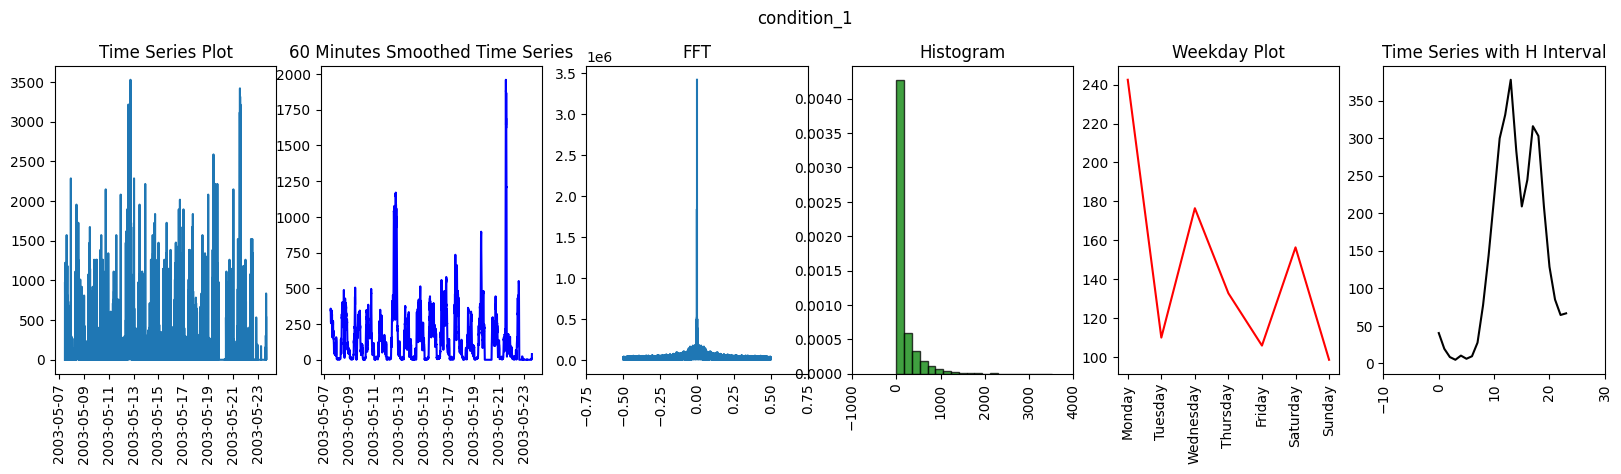

<Figure size 640x480 with 0 Axes>

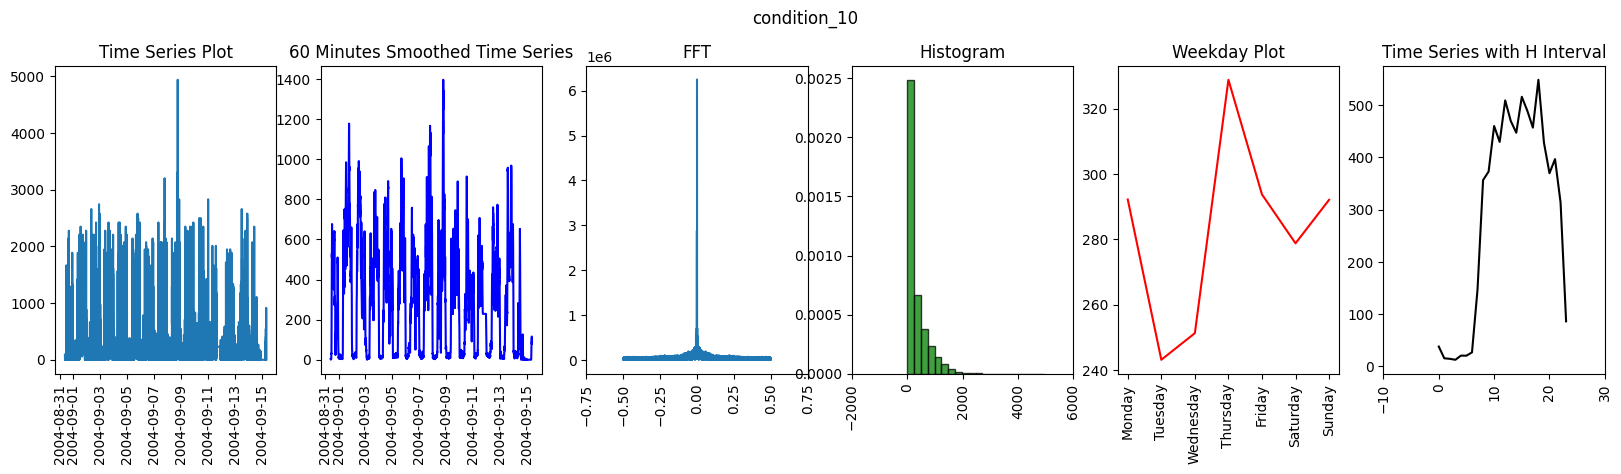

<Figure size 640x480 with 0 Axes>

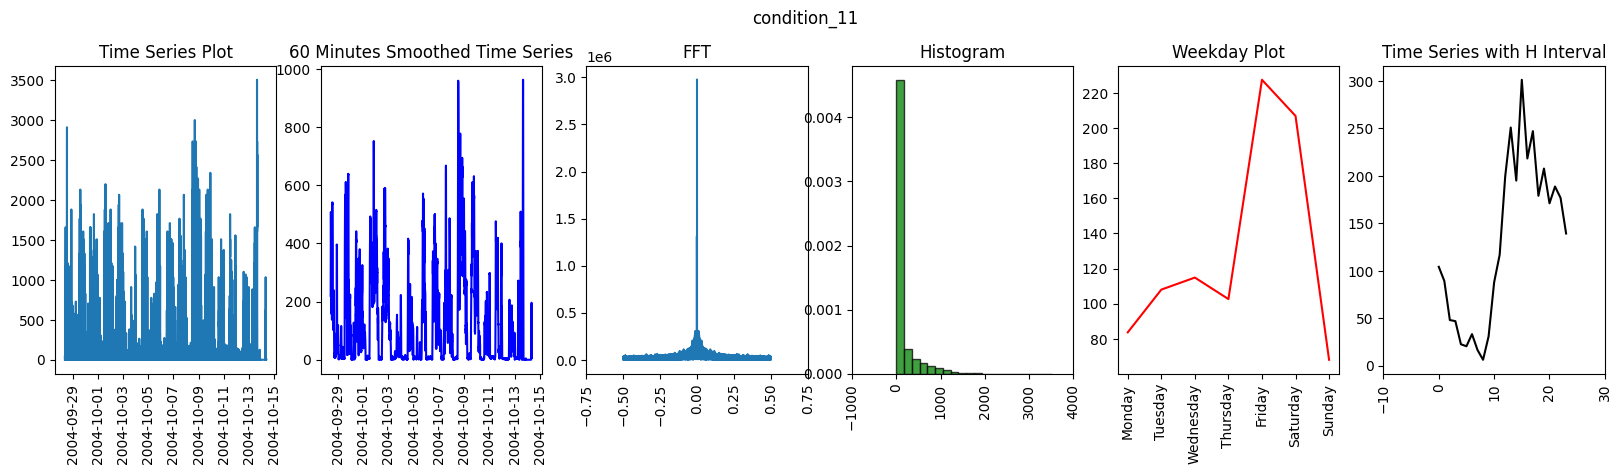

<Figure size 640x480 with 0 Axes>

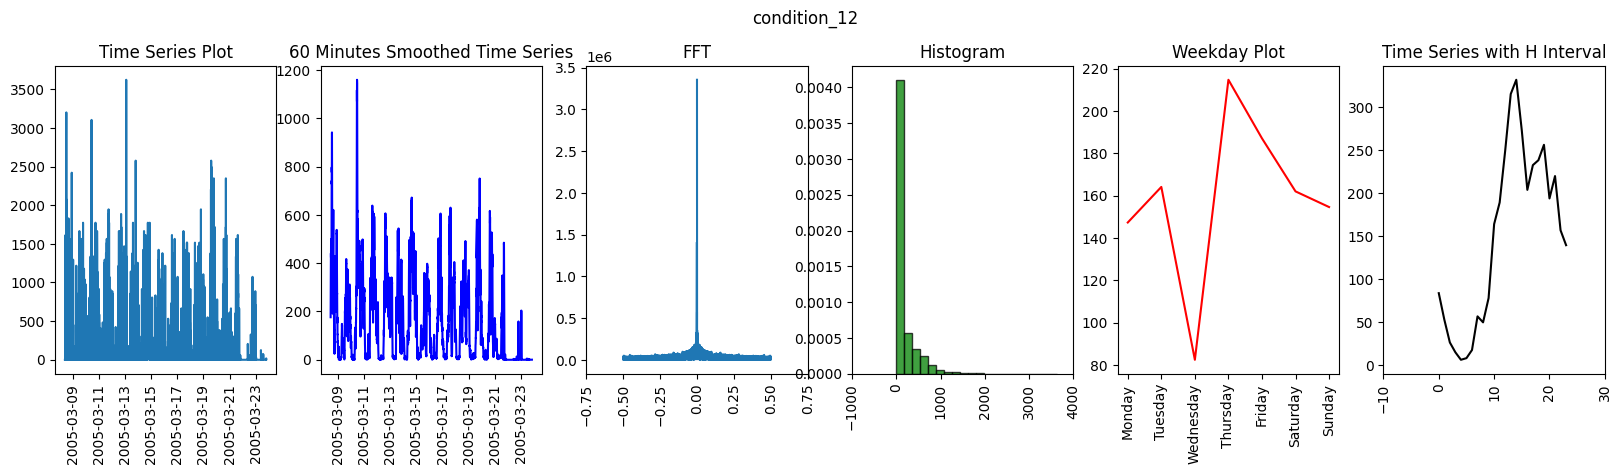

<Figure size 640x480 with 0 Axes>

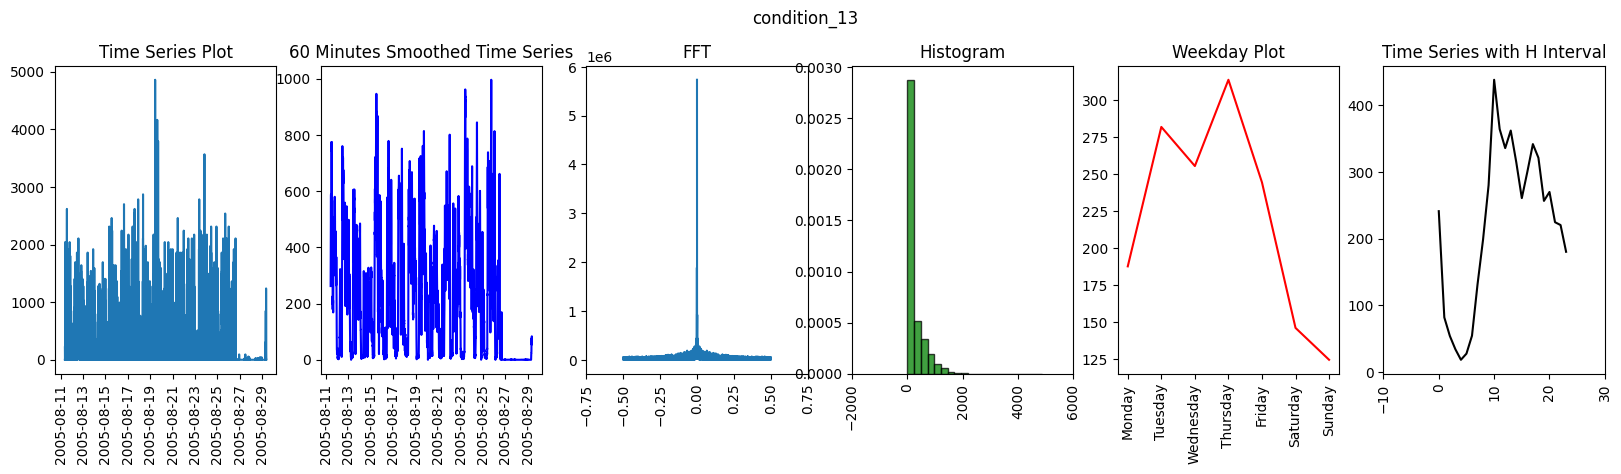

<Figure size 640x480 with 0 Axes>

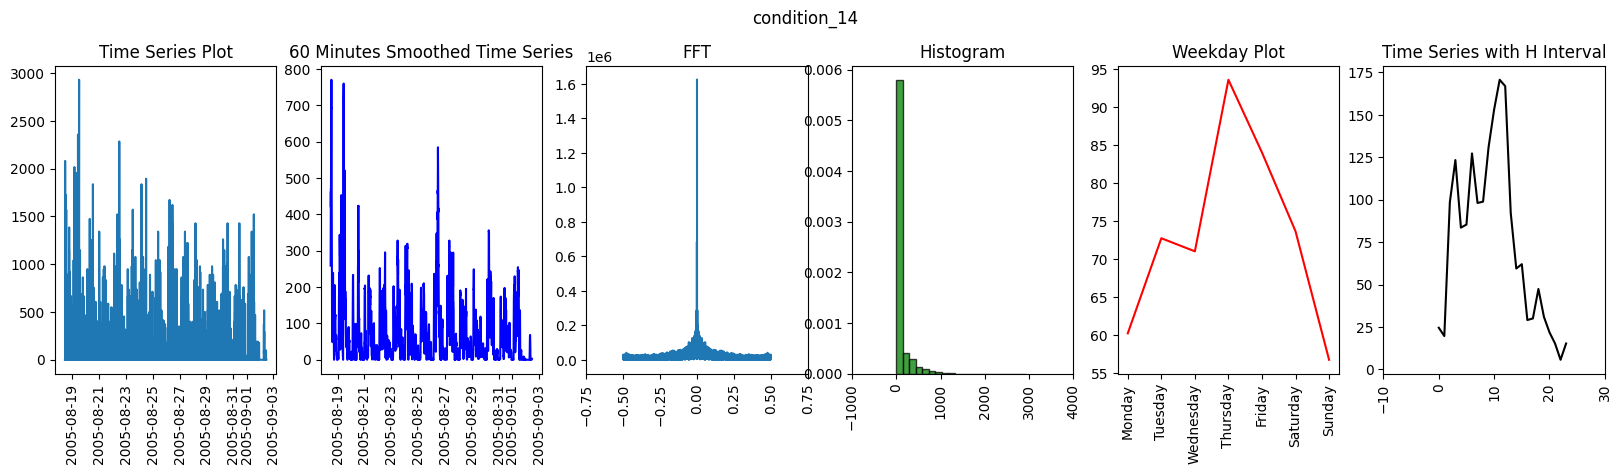

<Figure size 640x480 with 0 Axes>

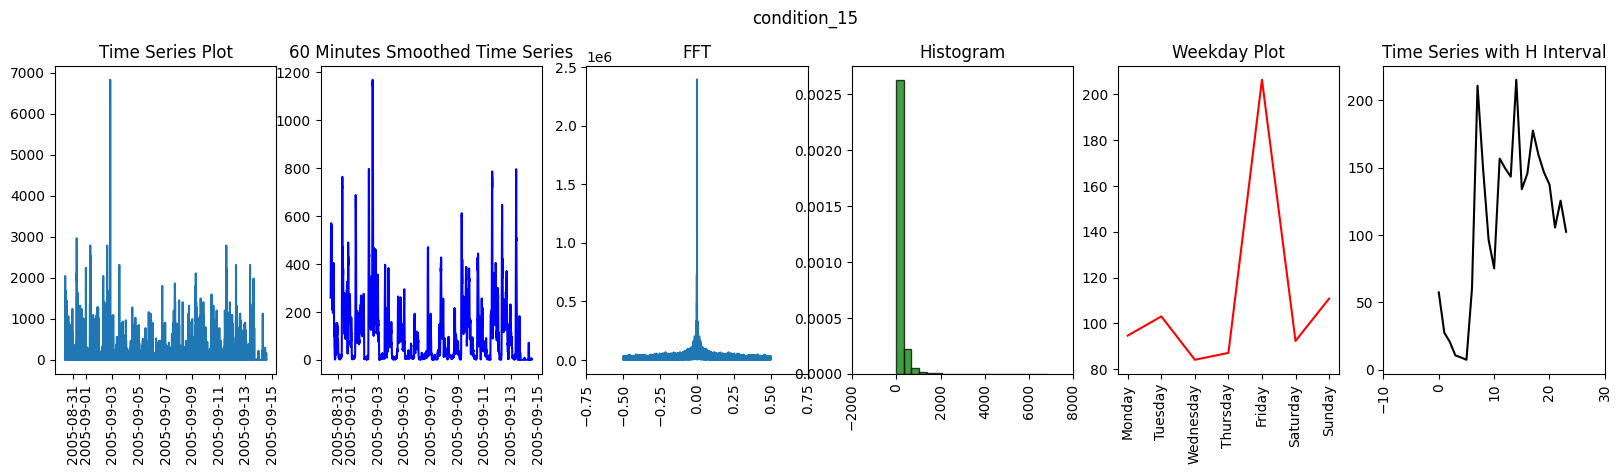

<Figure size 640x480 with 0 Axes>

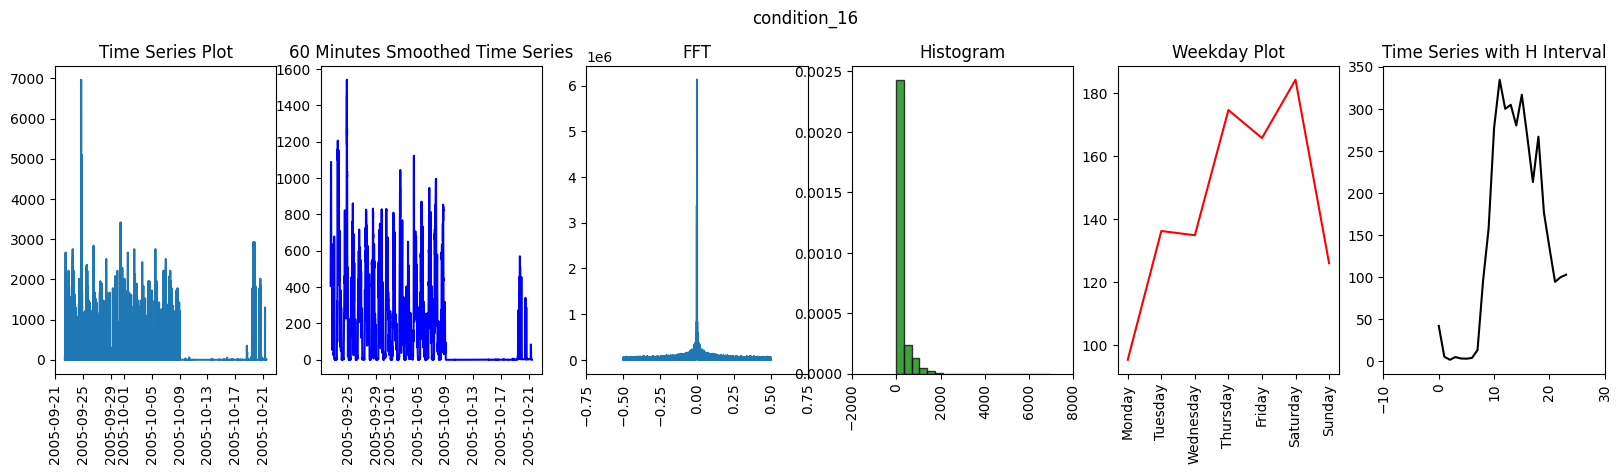

<Figure size 640x480 with 0 Axes>

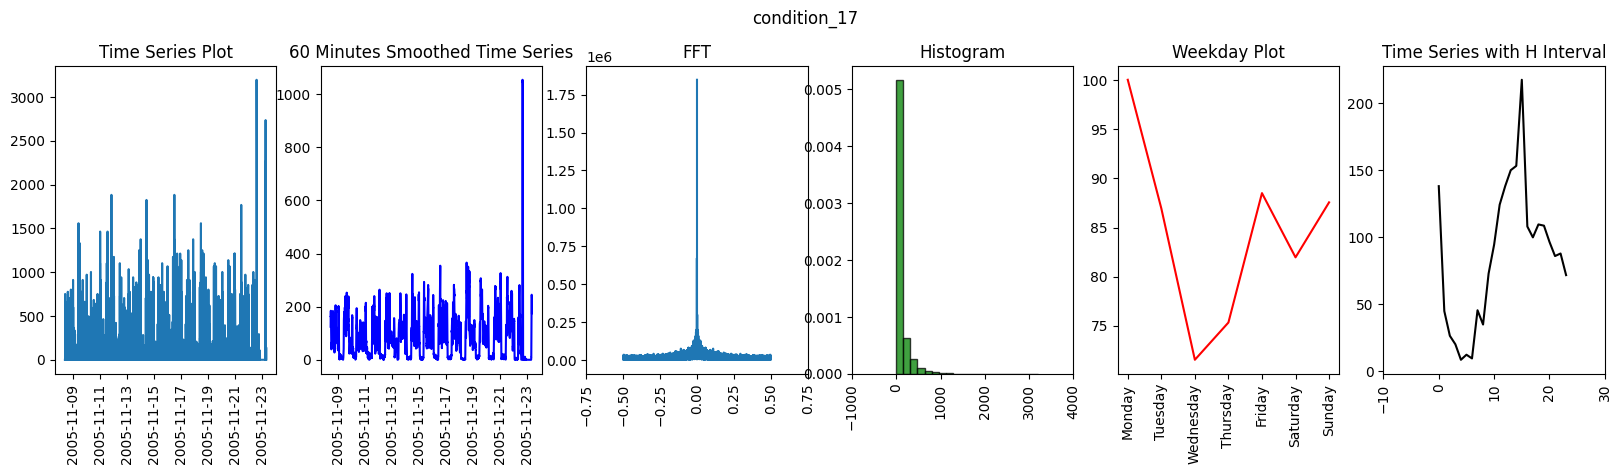

<Figure size 640x480 with 0 Axes>

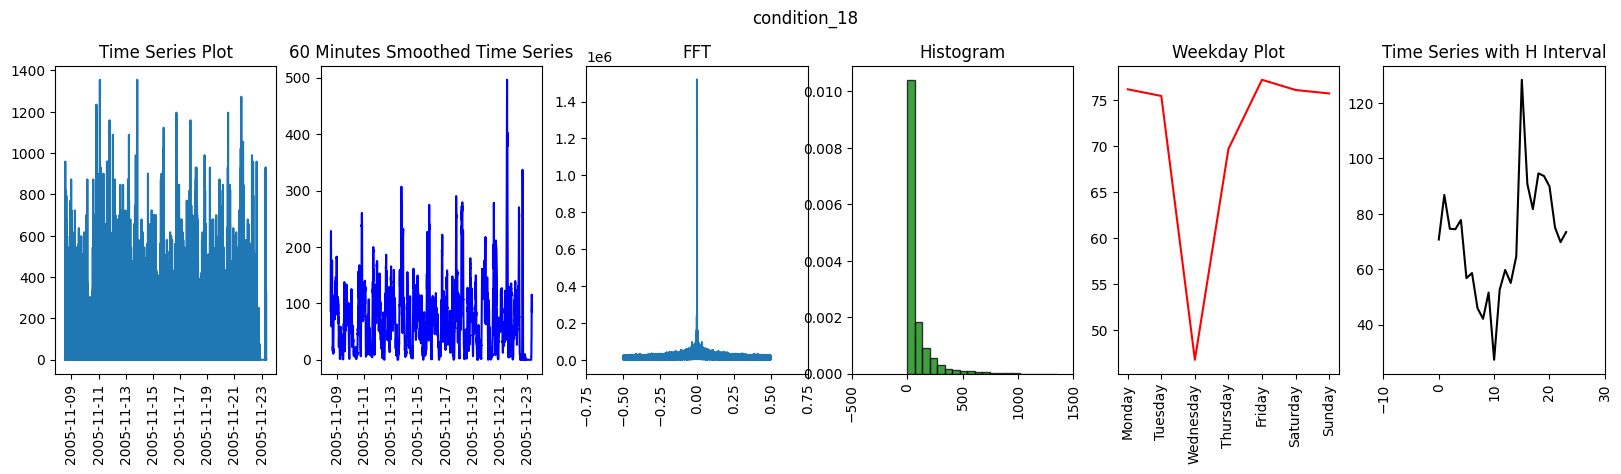

<Figure size 640x480 with 0 Axes>

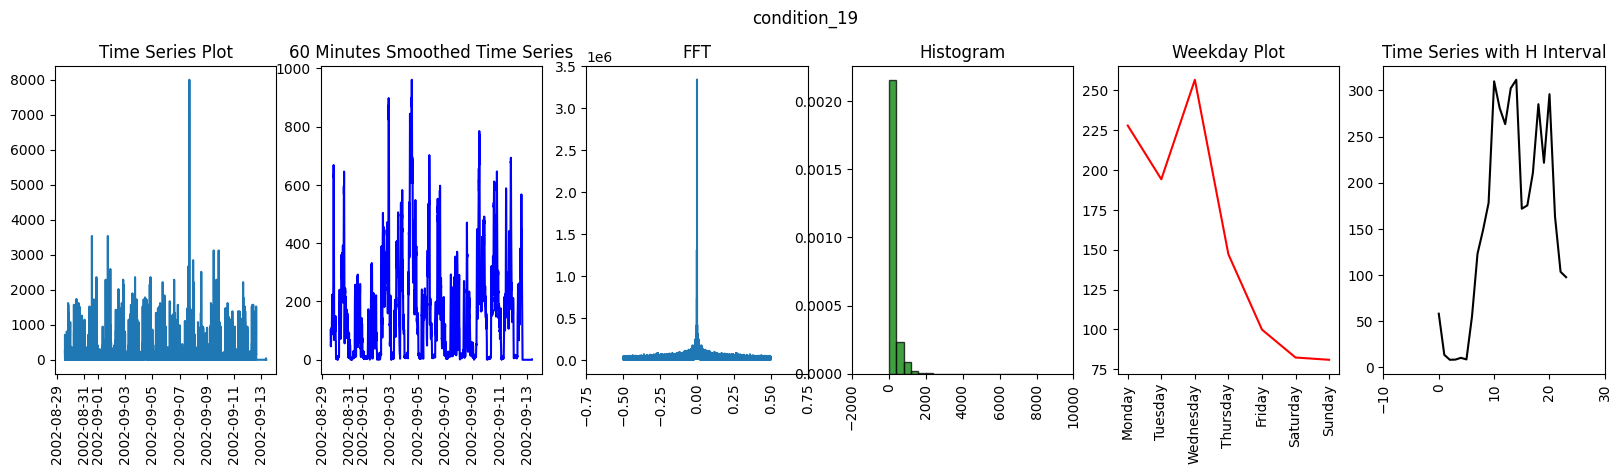

<Figure size 640x480 with 0 Axes>

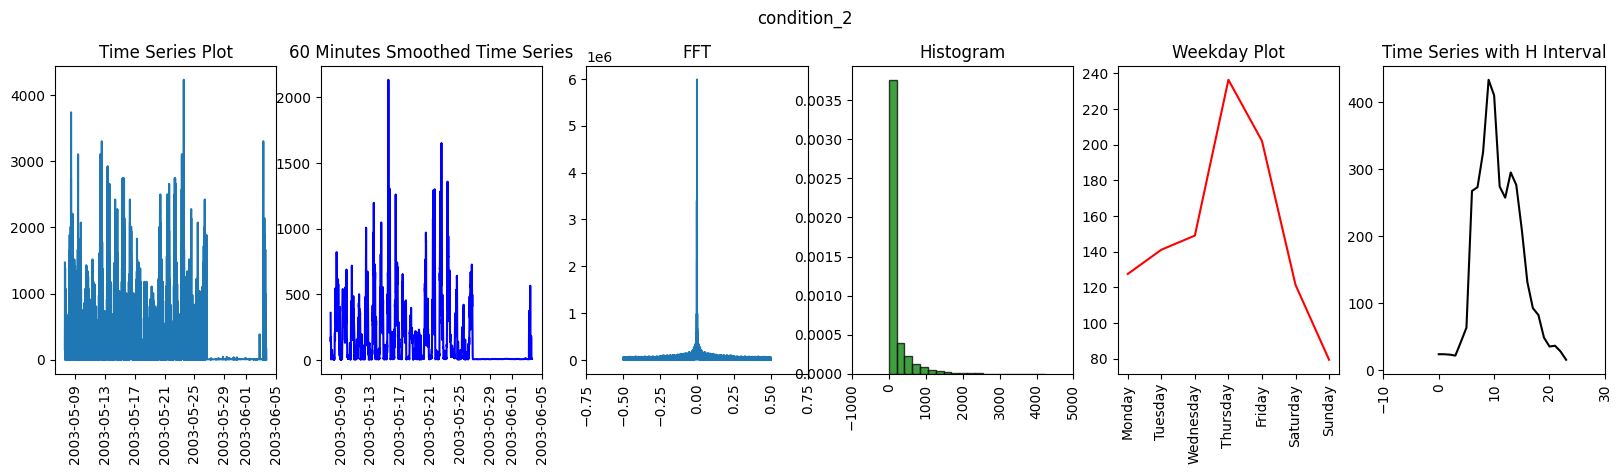

<Figure size 640x480 with 0 Axes>

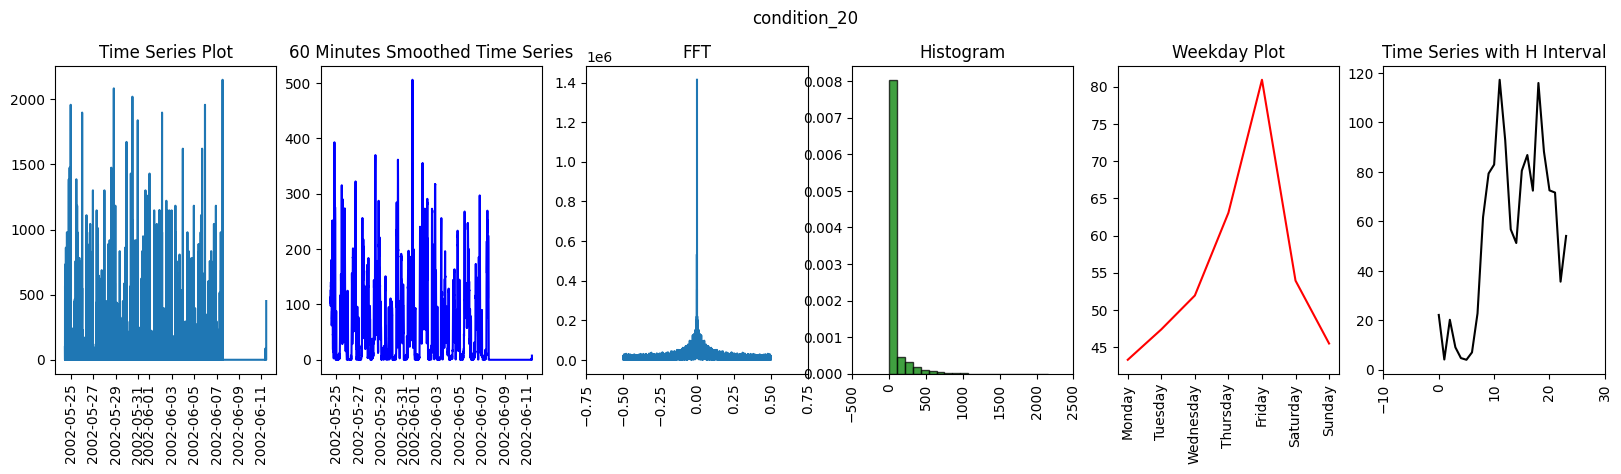

<Figure size 640x480 with 0 Axes>

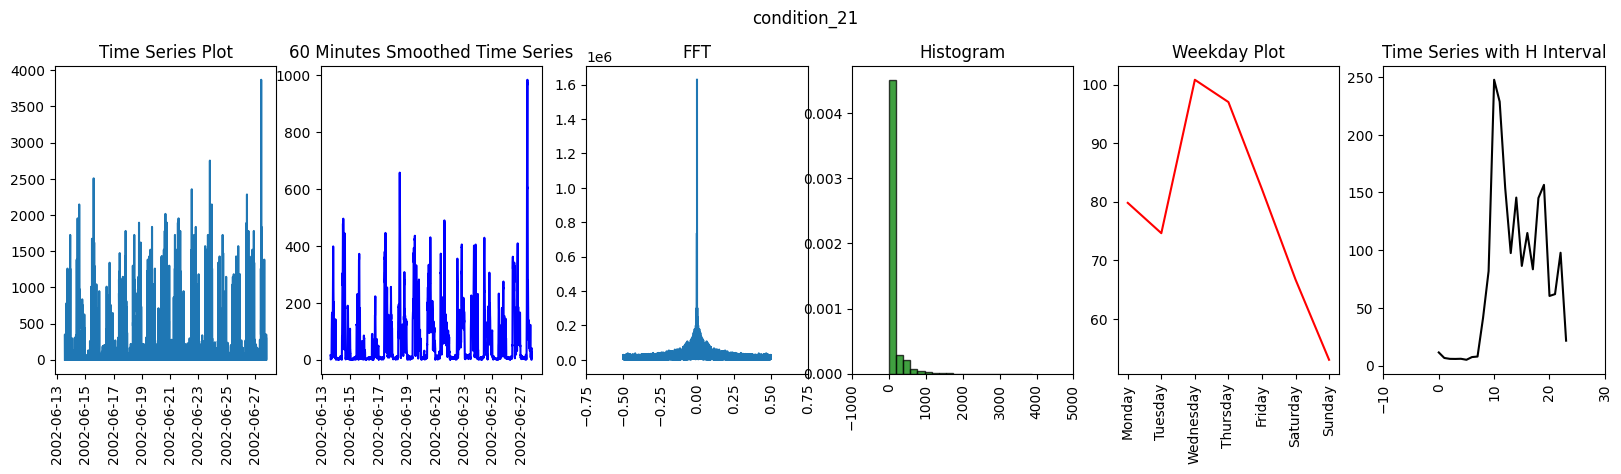

<Figure size 640x480 with 0 Axes>

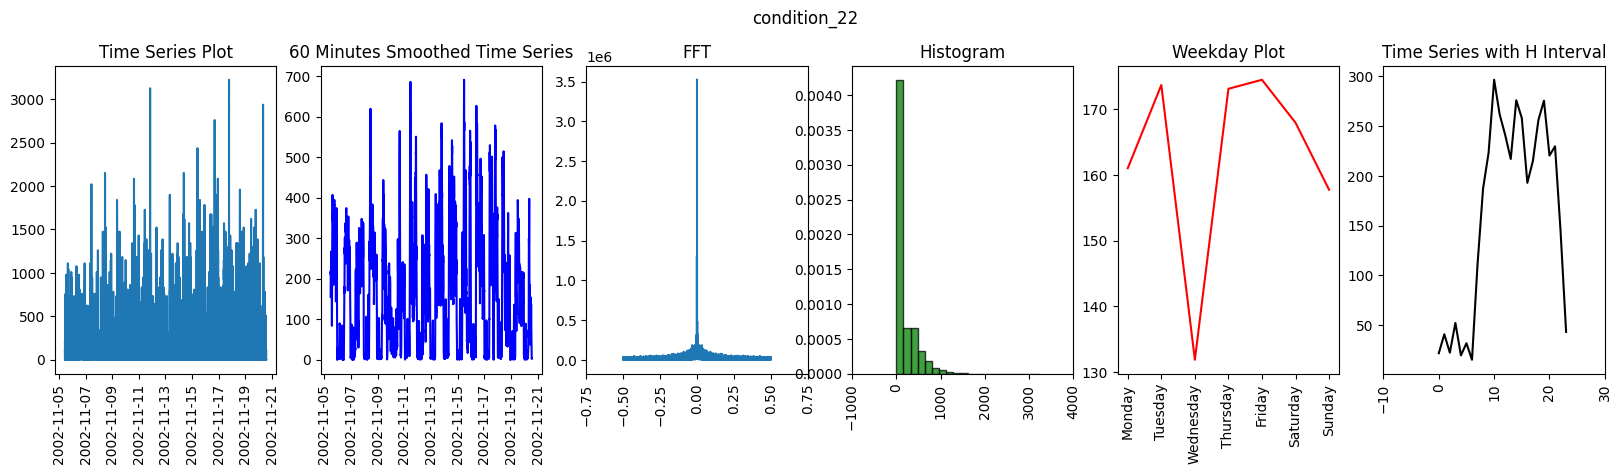

<Figure size 640x480 with 0 Axes>

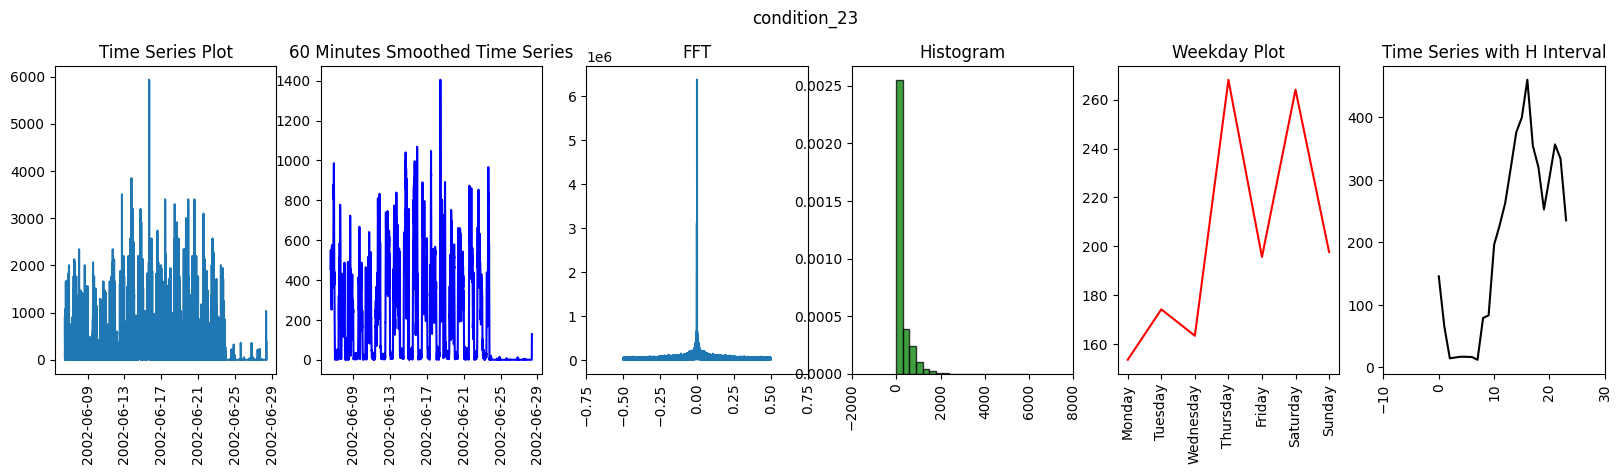

<Figure size 640x480 with 0 Axes>

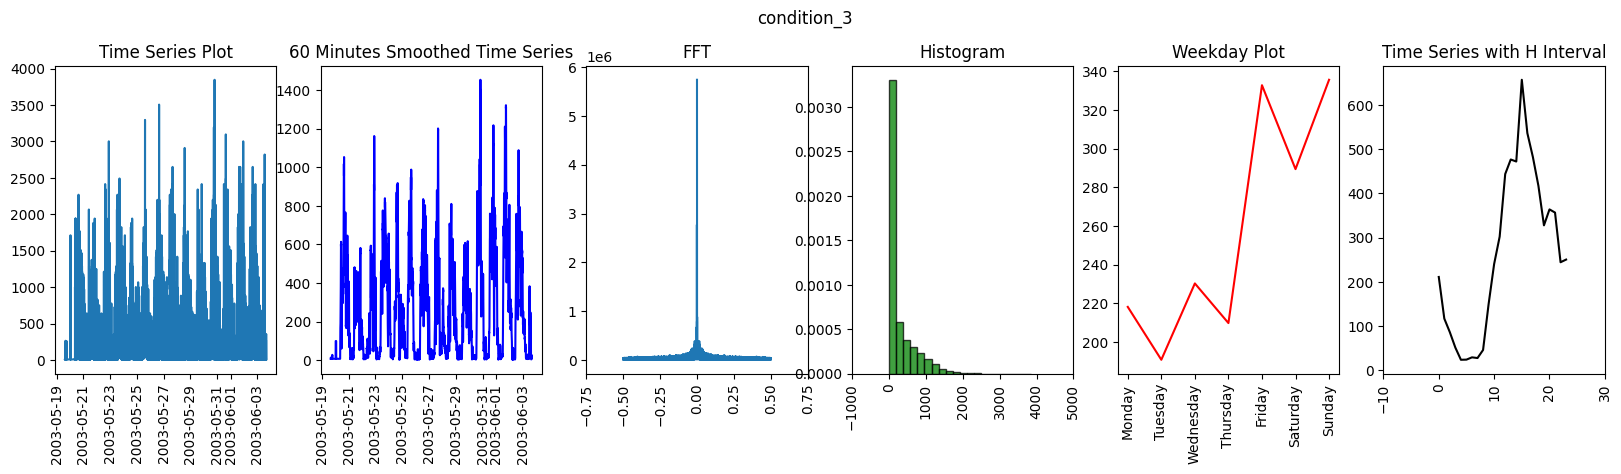

<Figure size 640x480 with 0 Axes>

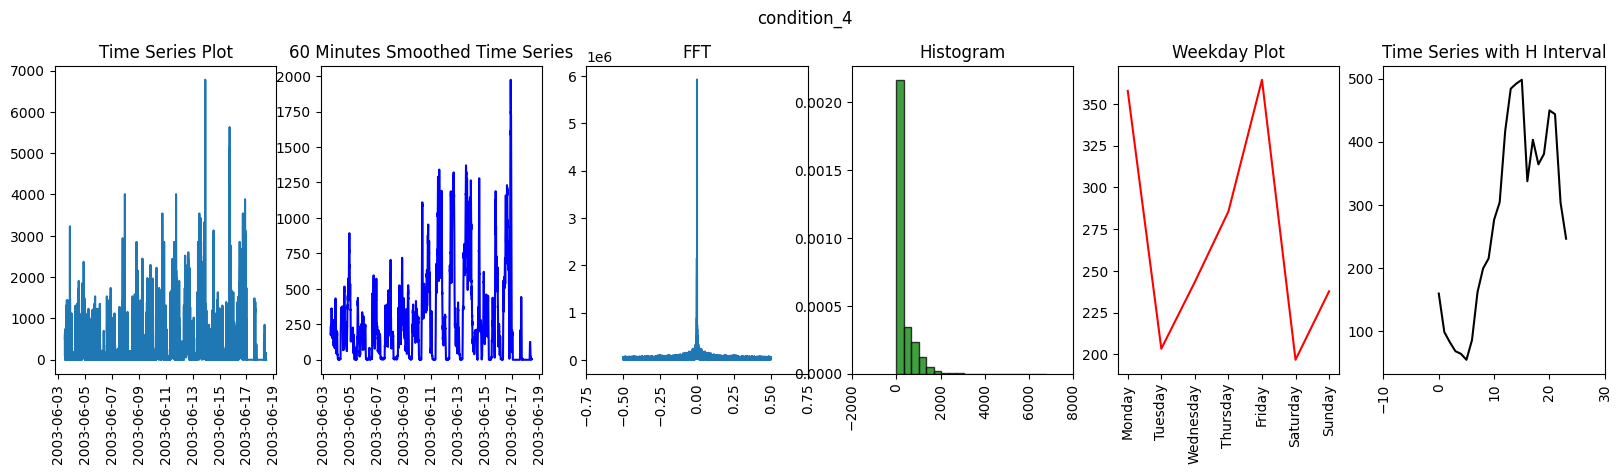

<Figure size 640x480 with 0 Axes>

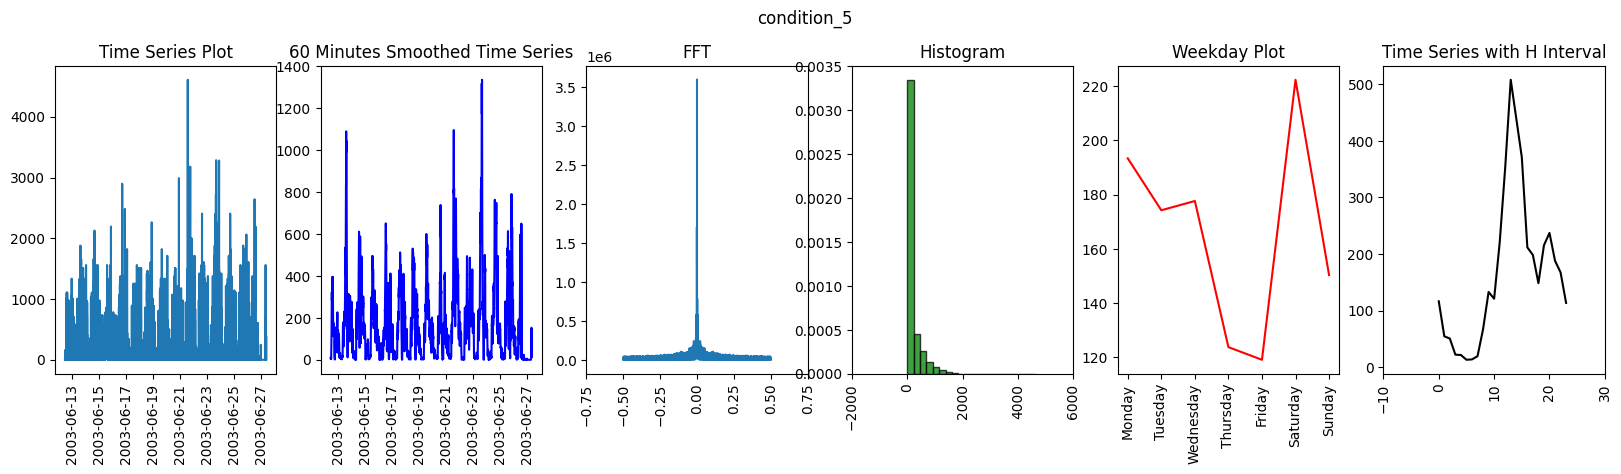

<Figure size 640x480 with 0 Axes>

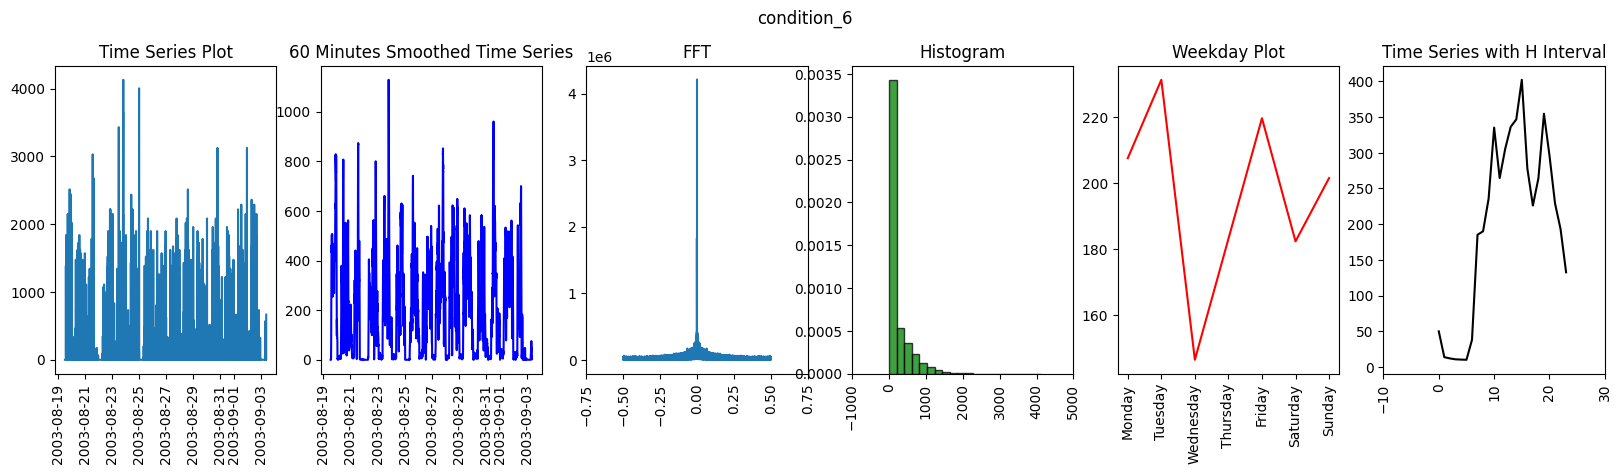

<Figure size 640x480 with 0 Axes>

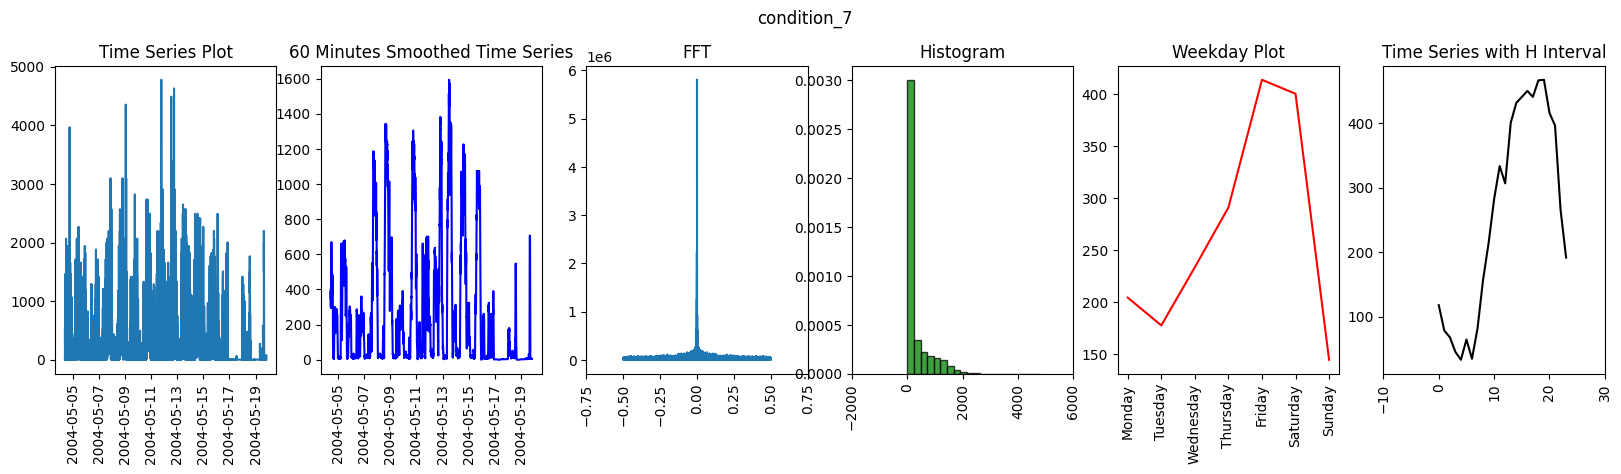

<Figure size 640x480 with 0 Axes>

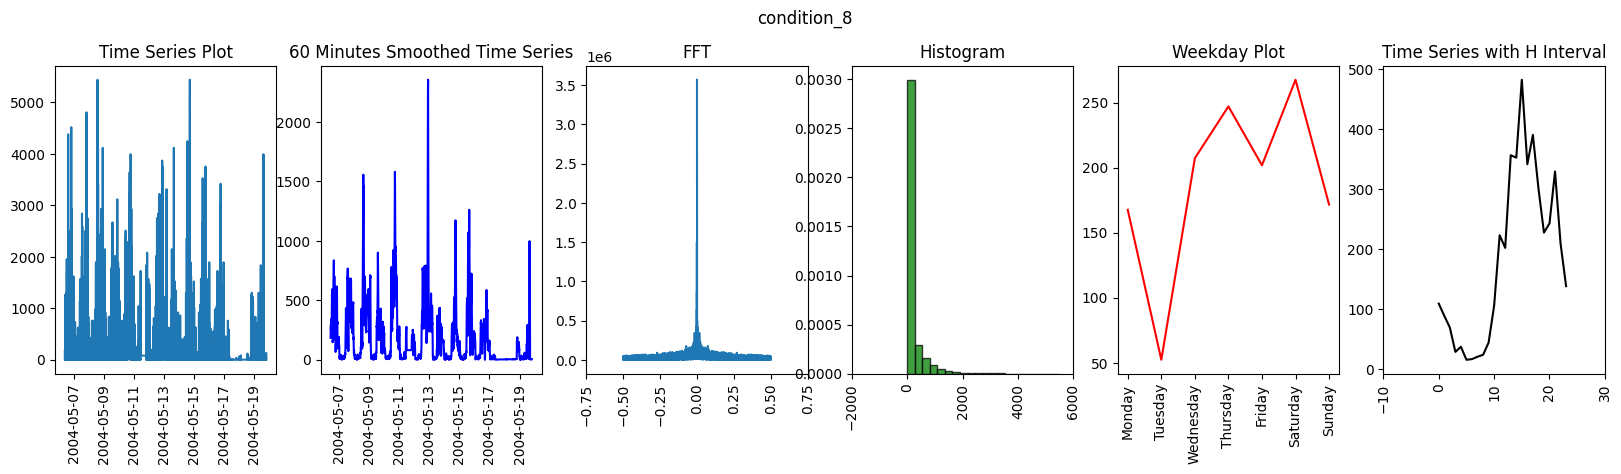

<Figure size 640x480 with 0 Axes>

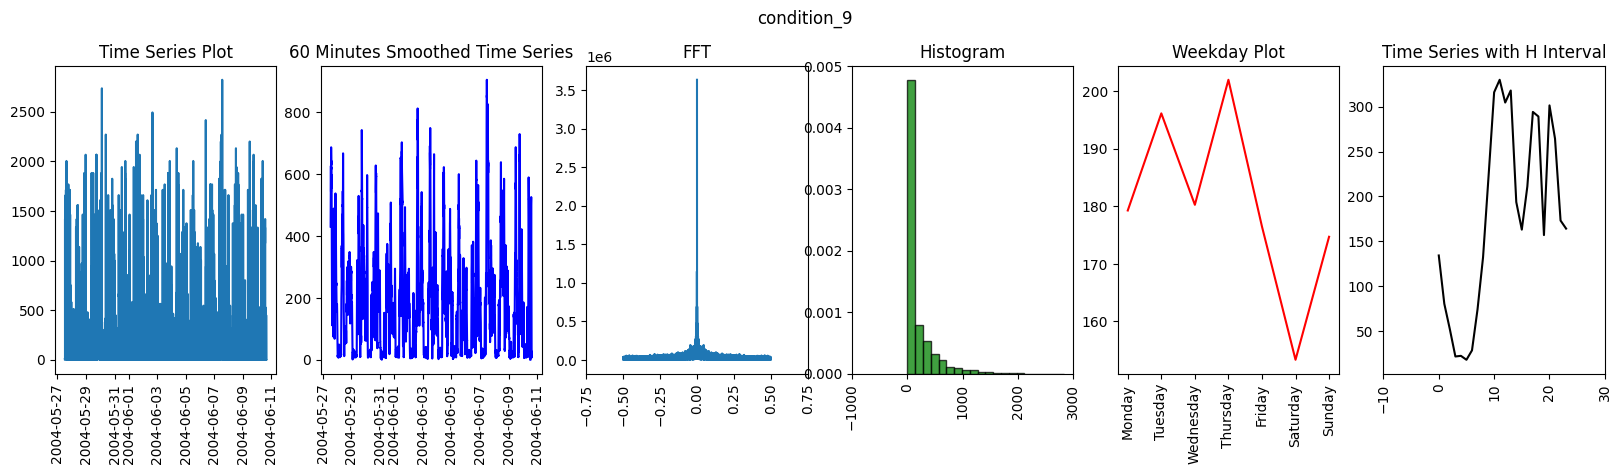

<Figure size 640x480 with 0 Axes>

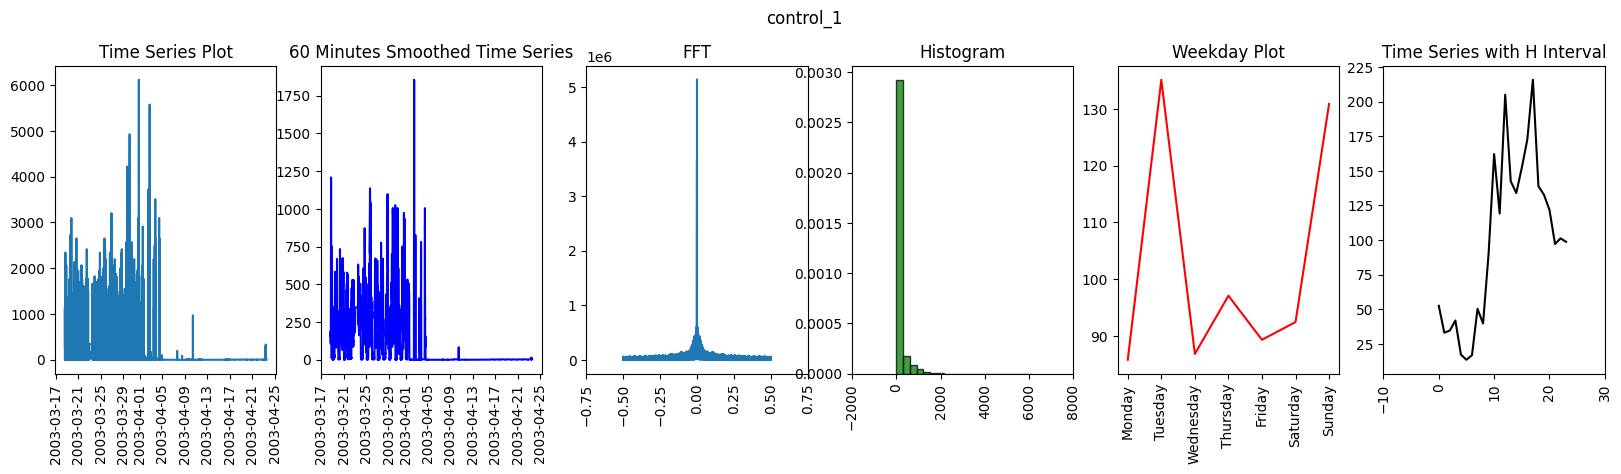

<Figure size 640x480 with 0 Axes>

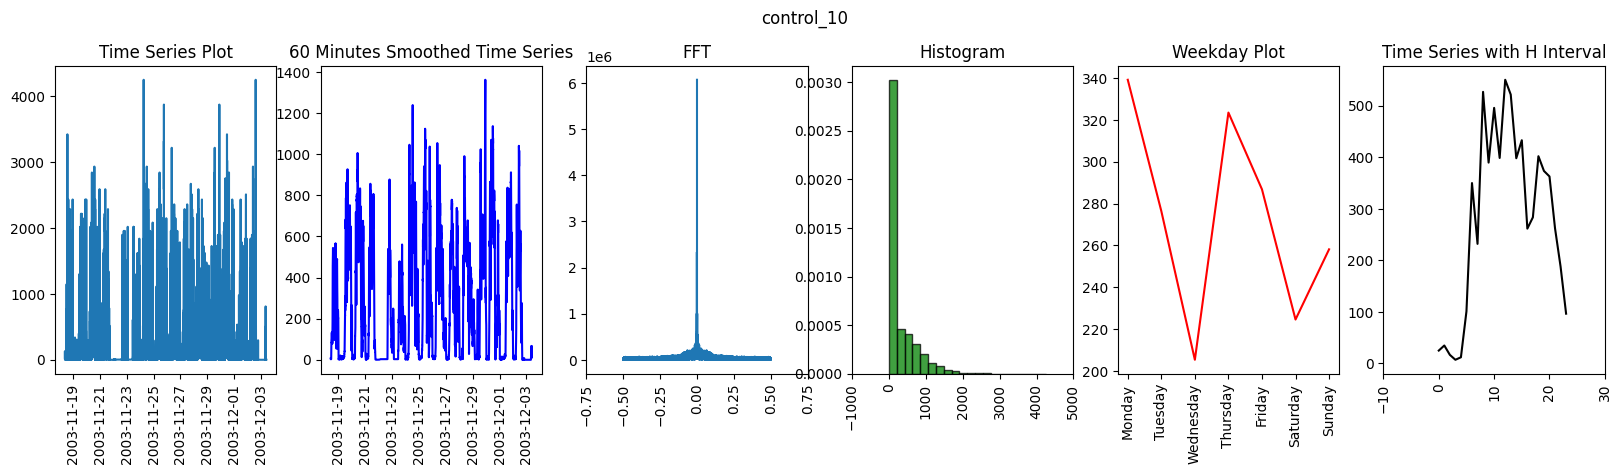

<Figure size 640x480 with 0 Axes>

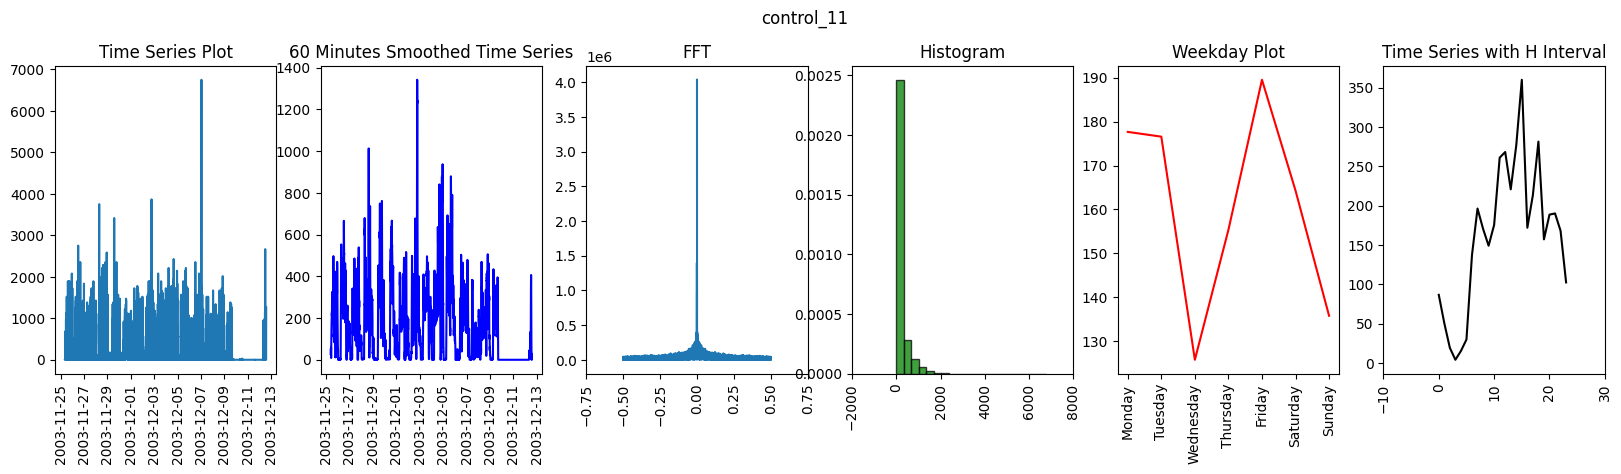

<Figure size 640x480 with 0 Axes>

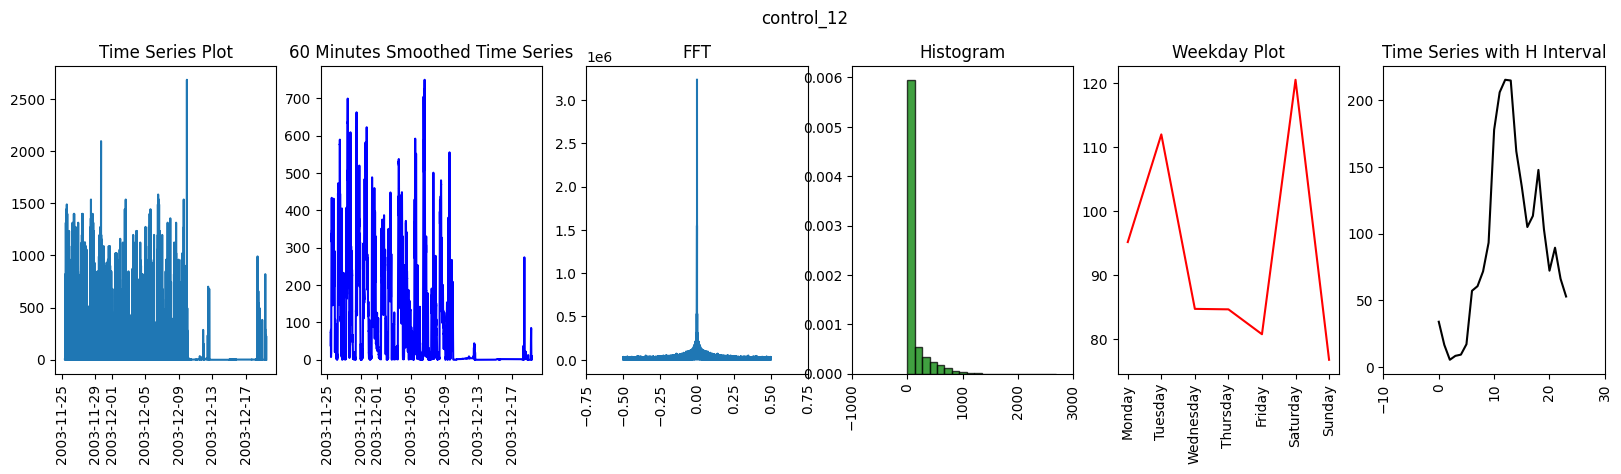

<Figure size 640x480 with 0 Axes>

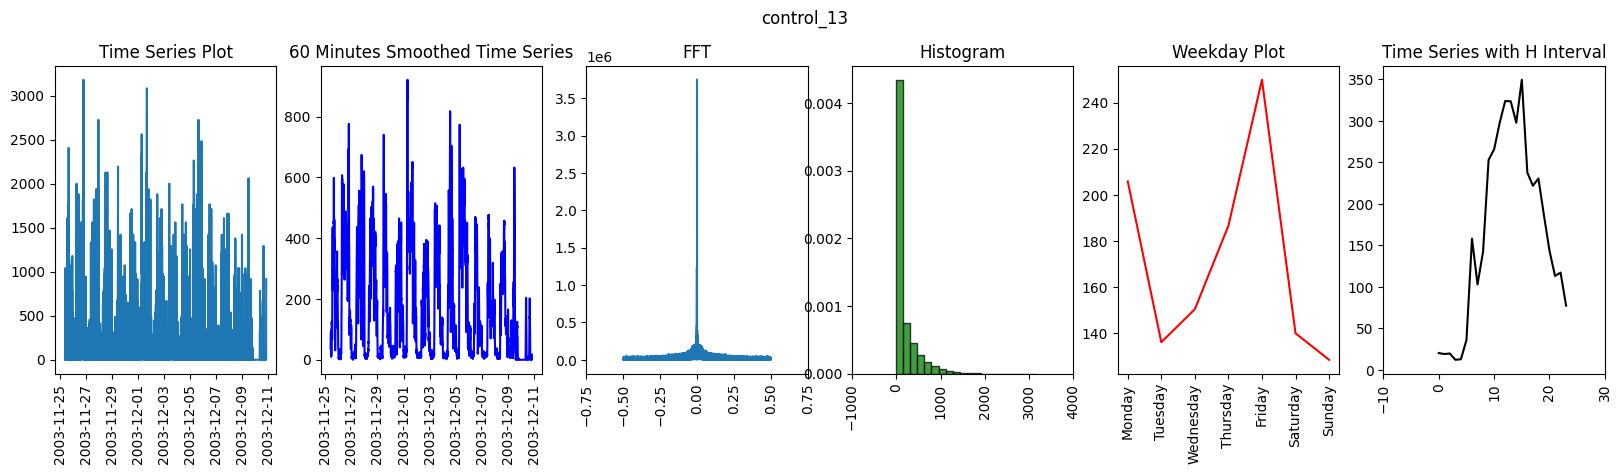

<Figure size 640x480 with 0 Axes>

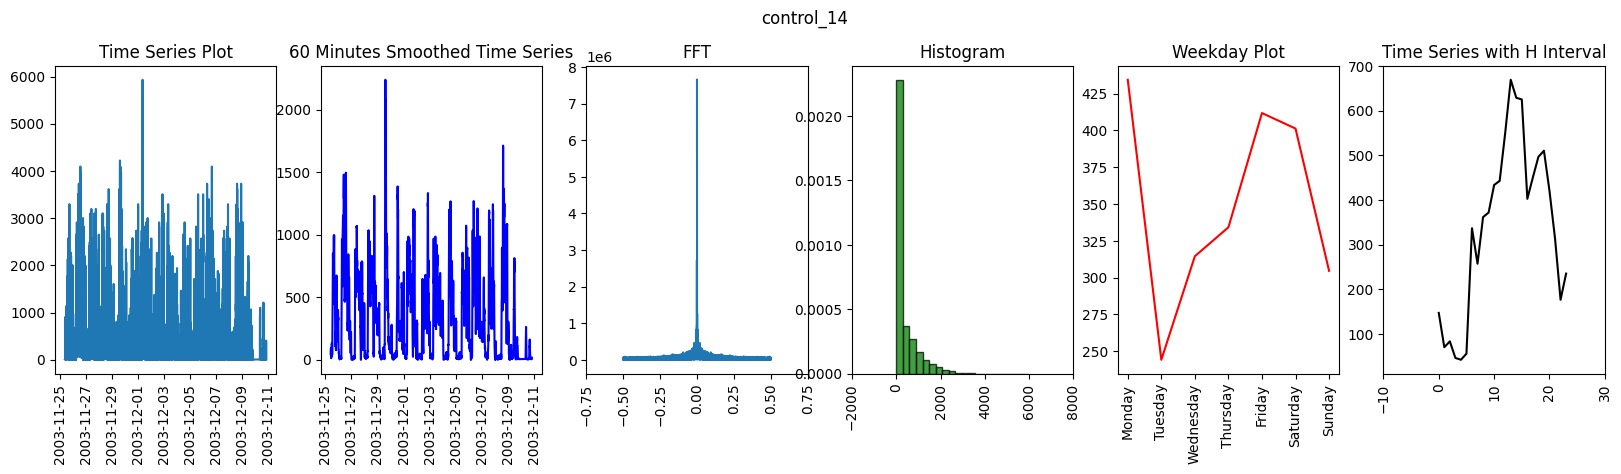

<Figure size 640x480 with 0 Axes>

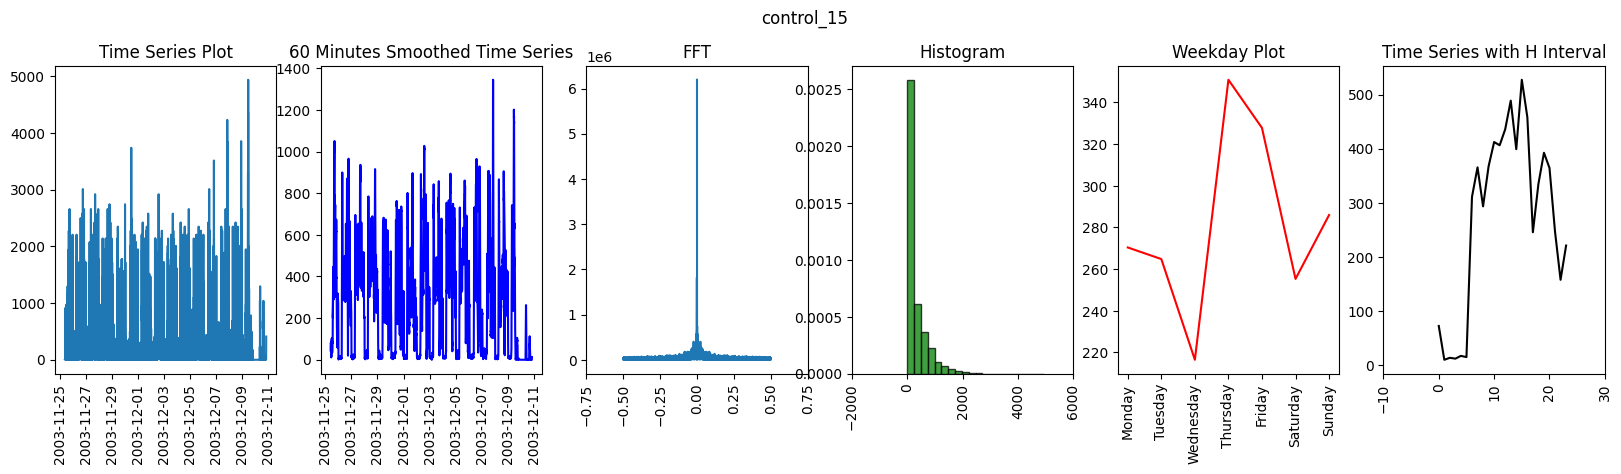

<Figure size 640x480 with 0 Axes>

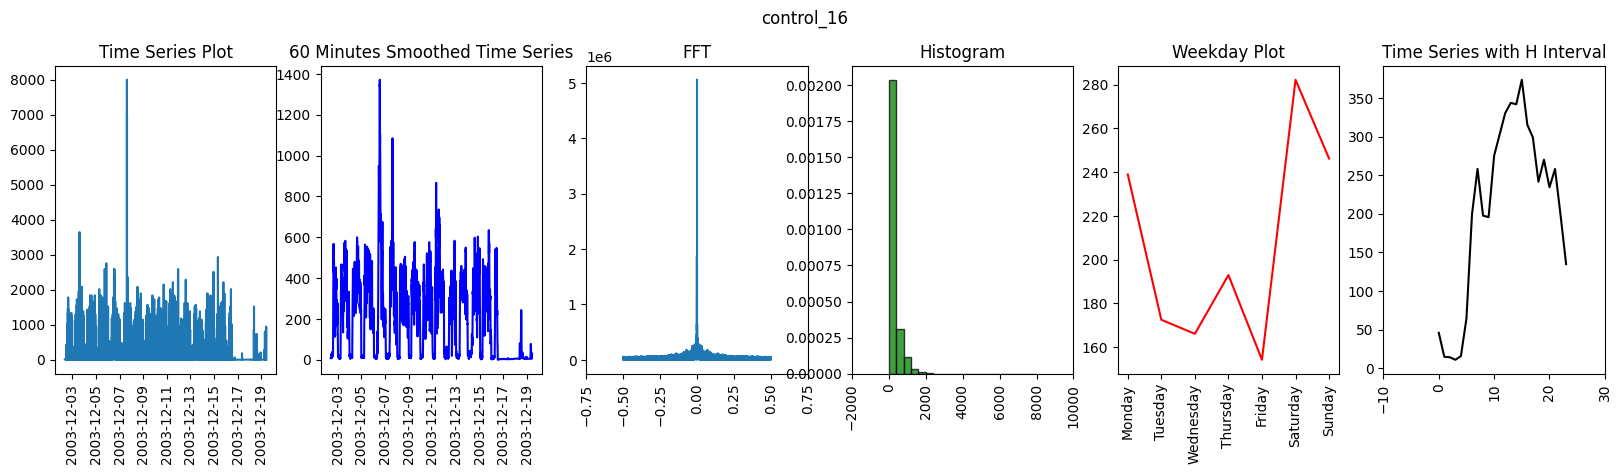

<Figure size 640x480 with 0 Axes>

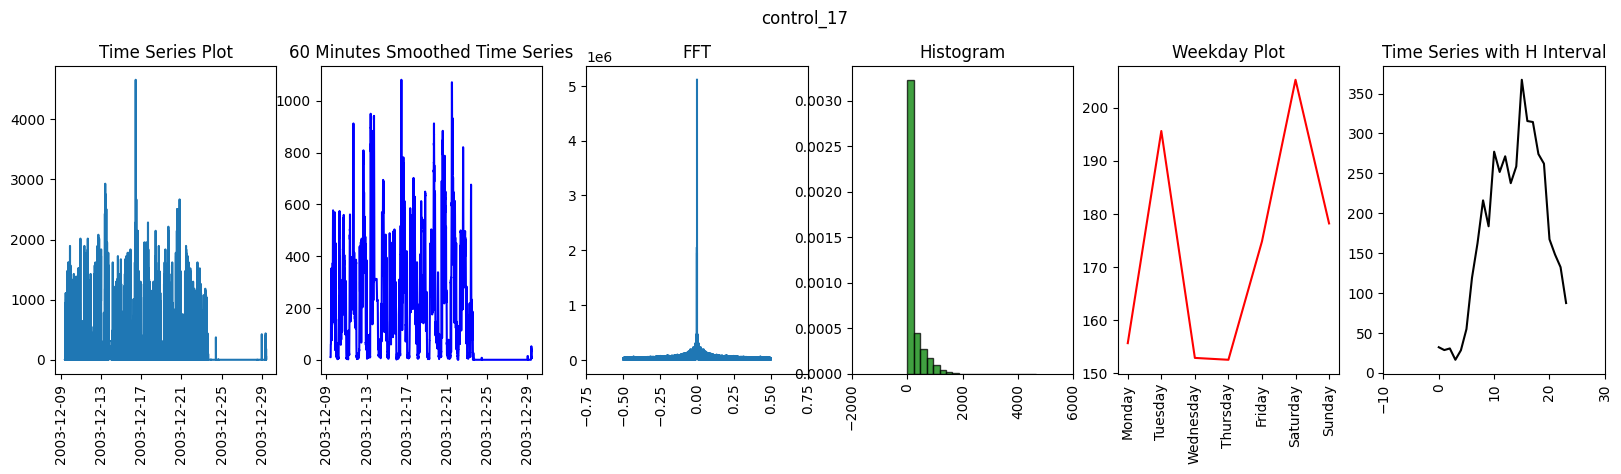

<Figure size 640x480 with 0 Axes>

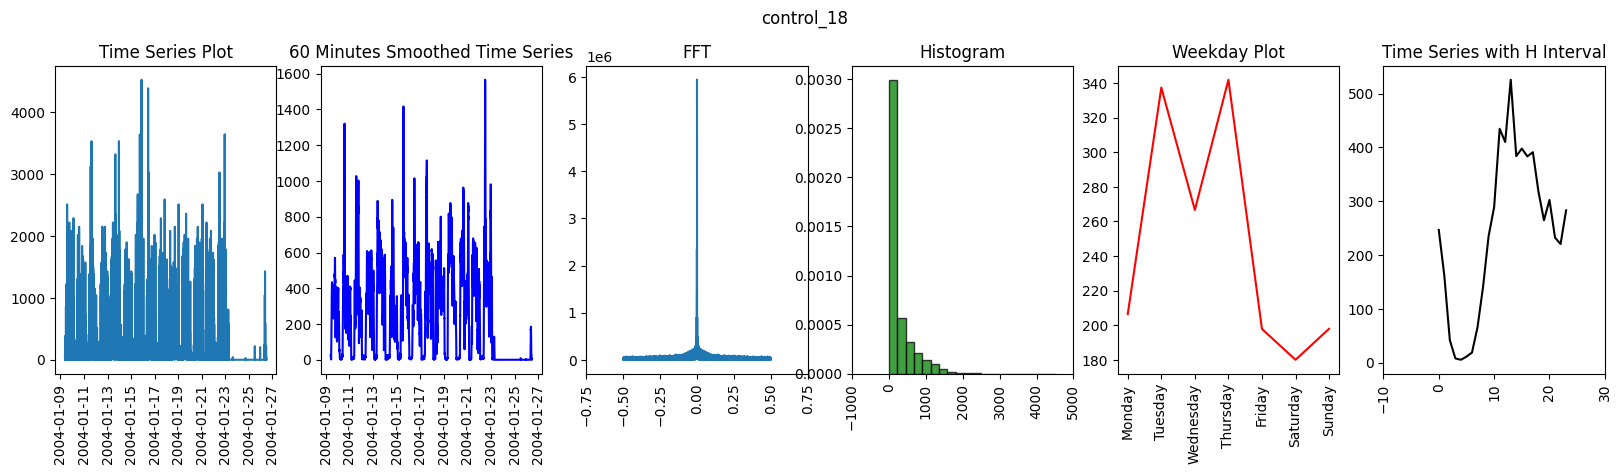

<Figure size 640x480 with 0 Axes>

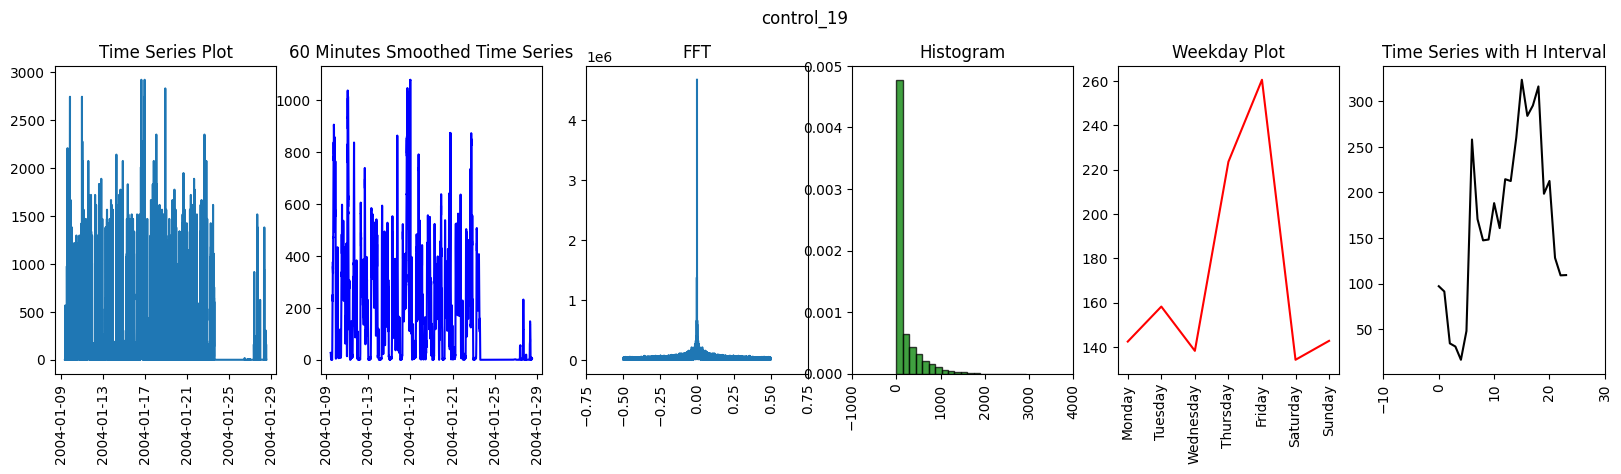

<Figure size 640x480 with 0 Axes>

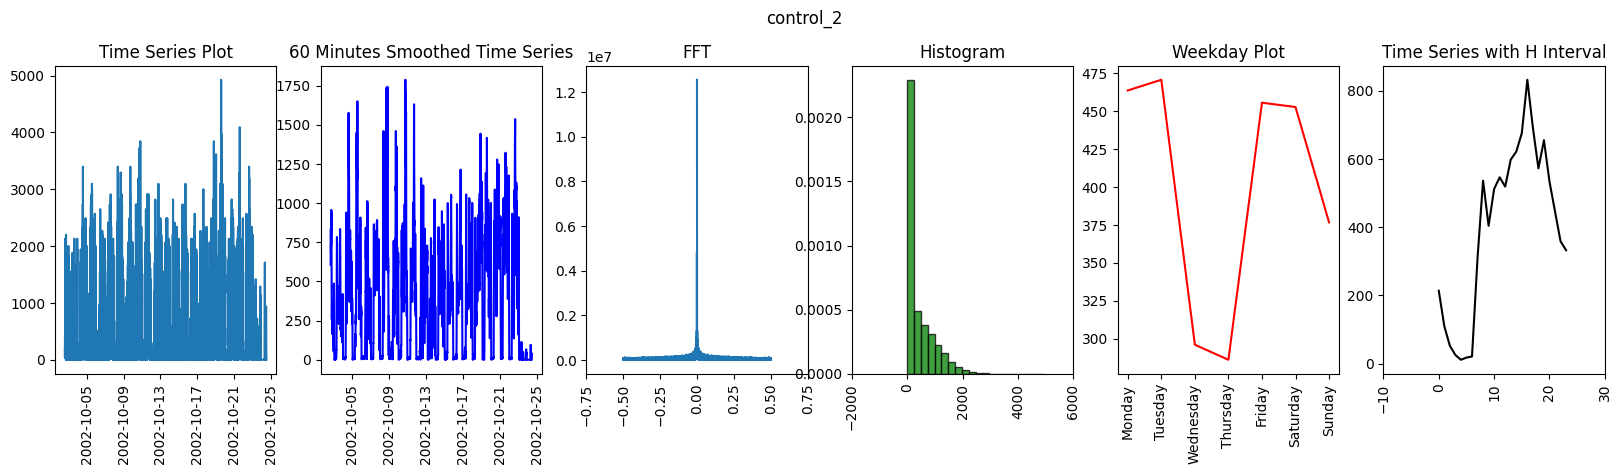

<Figure size 640x480 with 0 Axes>

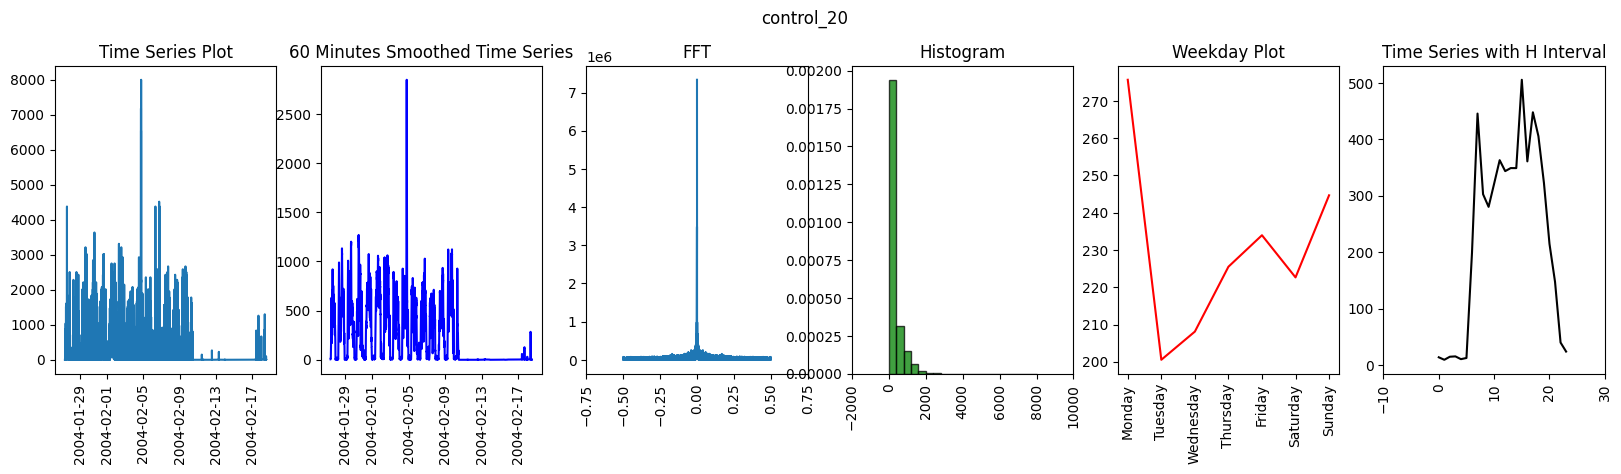

<Figure size 640x480 with 0 Axes>

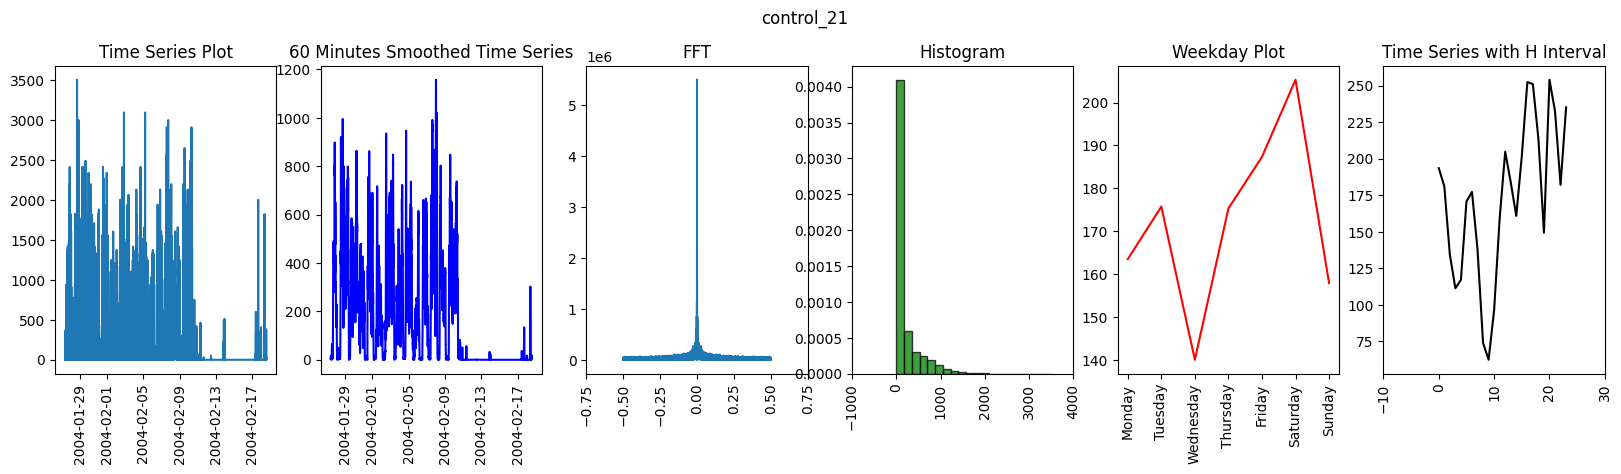

<Figure size 640x480 with 0 Axes>

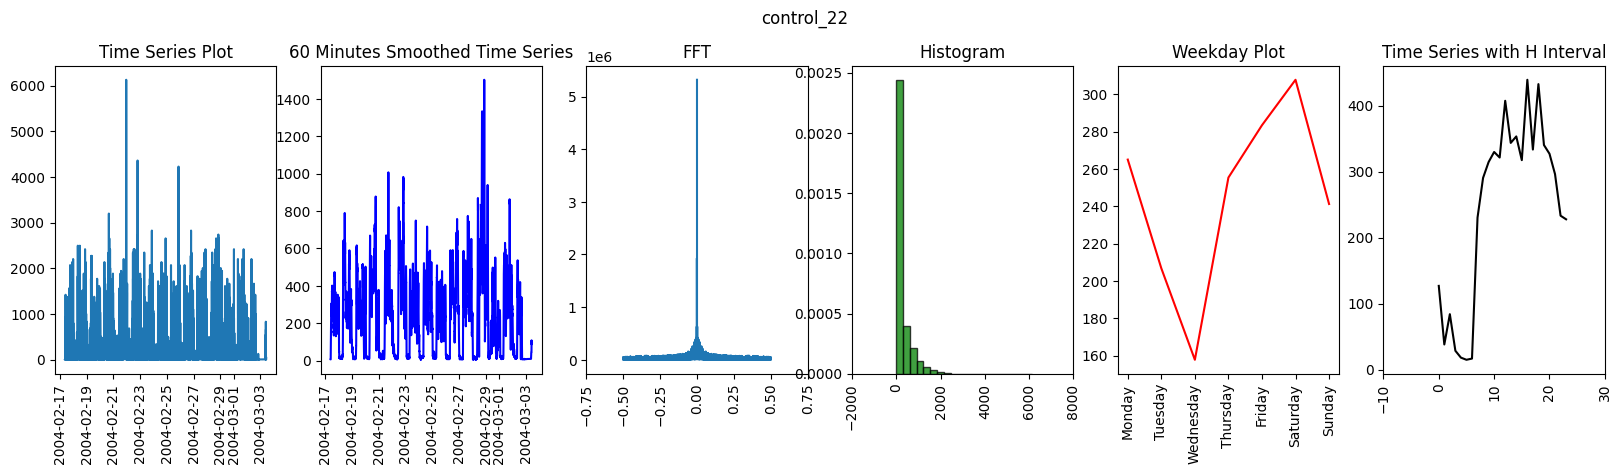

<Figure size 640x480 with 0 Axes>

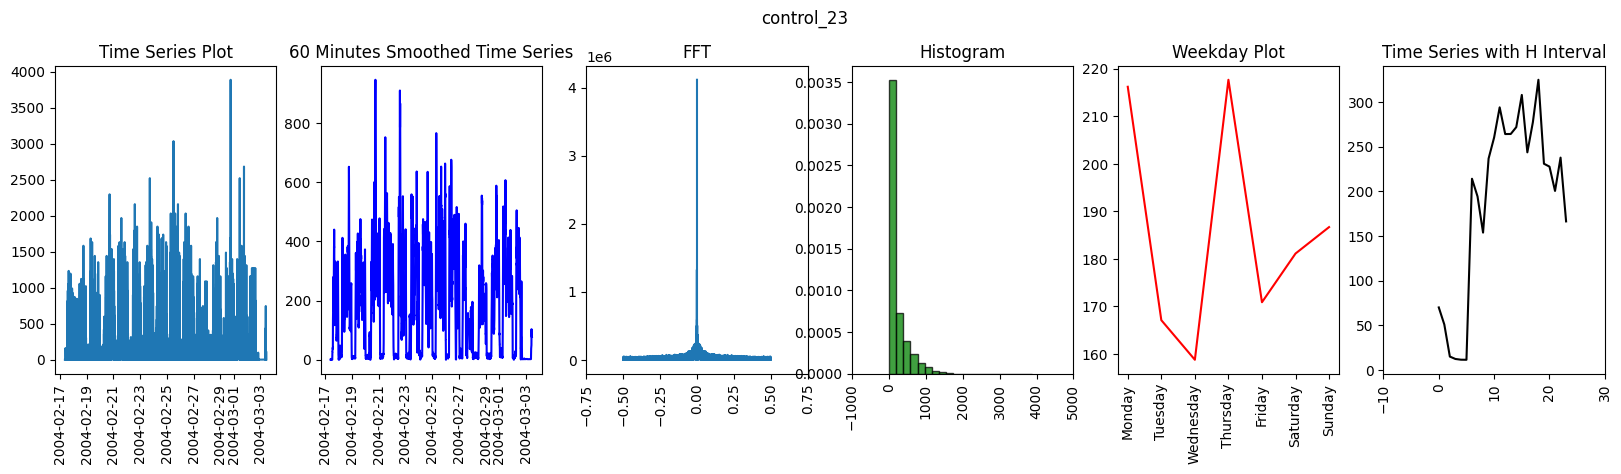

<Figure size 640x480 with 0 Axes>

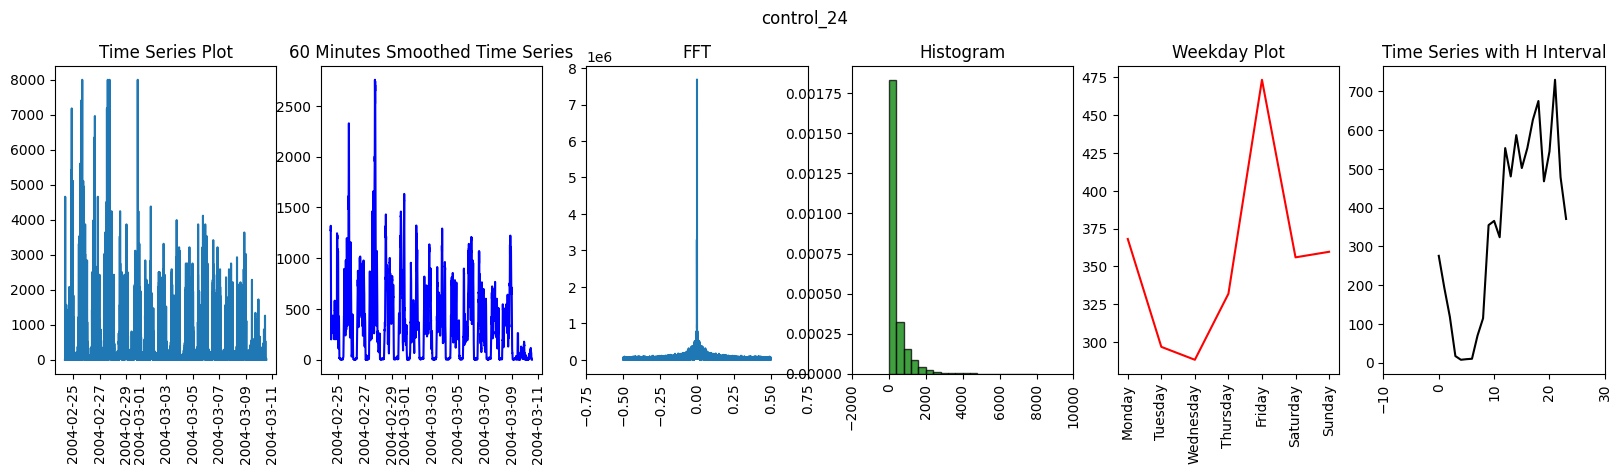

<Figure size 640x480 with 0 Axes>

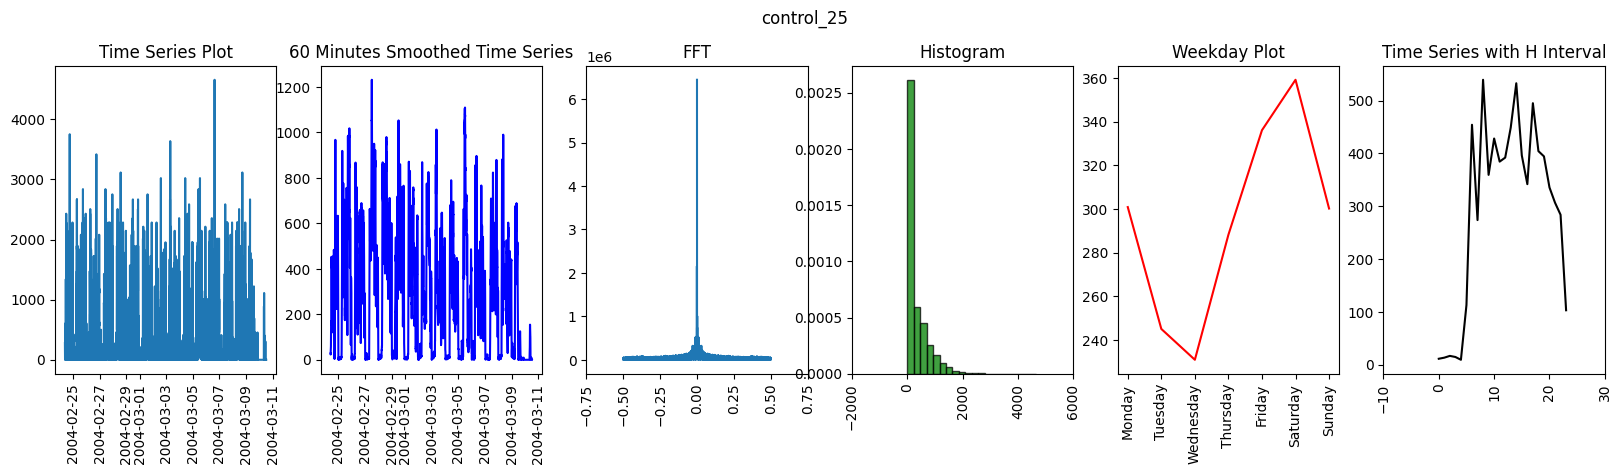

<Figure size 640x480 with 0 Axes>

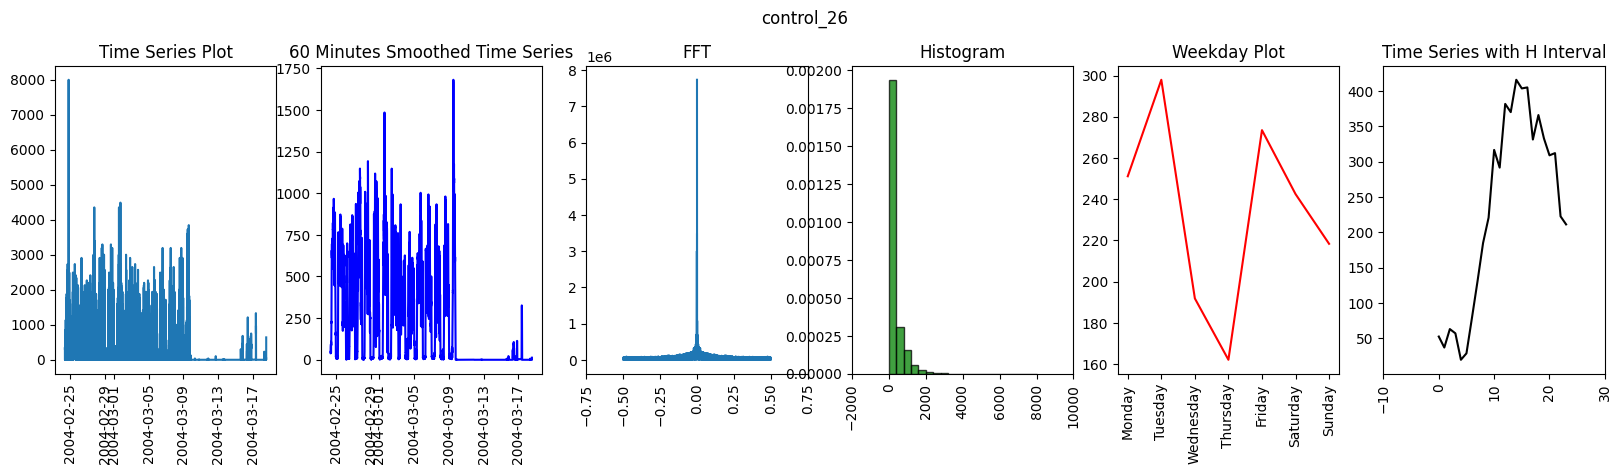

<Figure size 640x480 with 0 Axes>

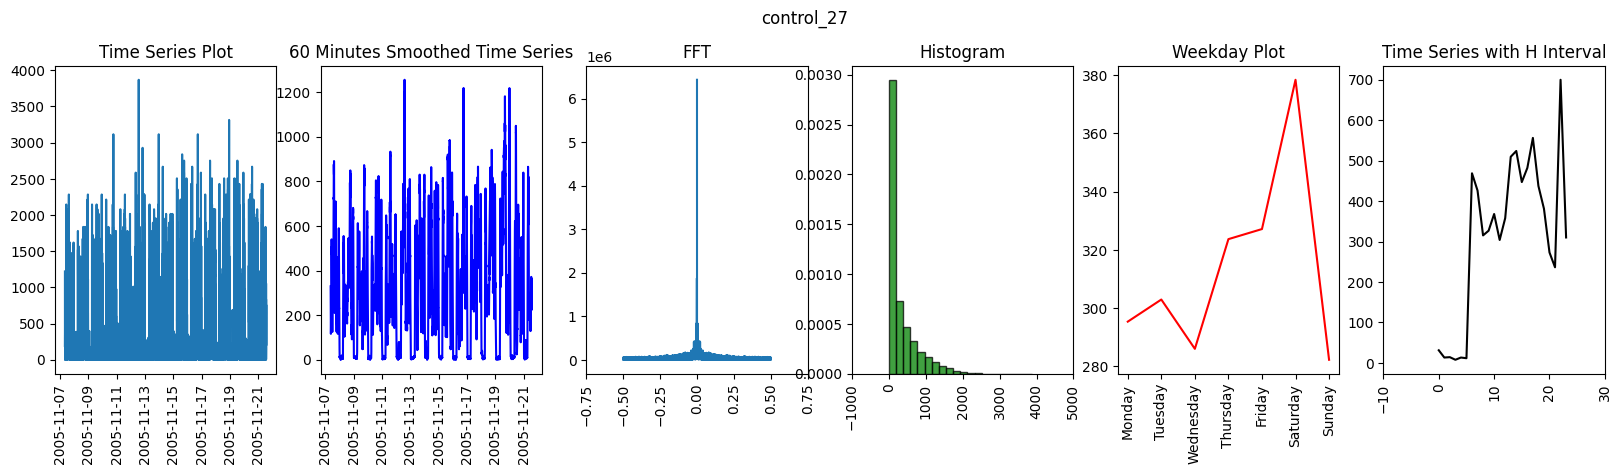

<Figure size 640x480 with 0 Axes>

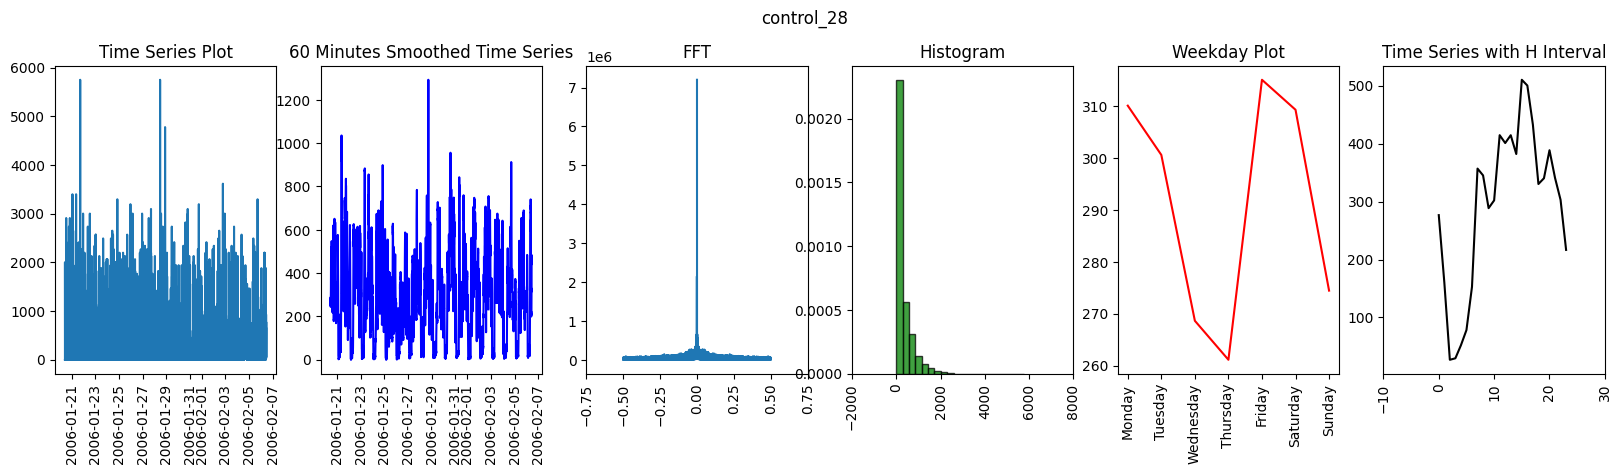

<Figure size 640x480 with 0 Axes>

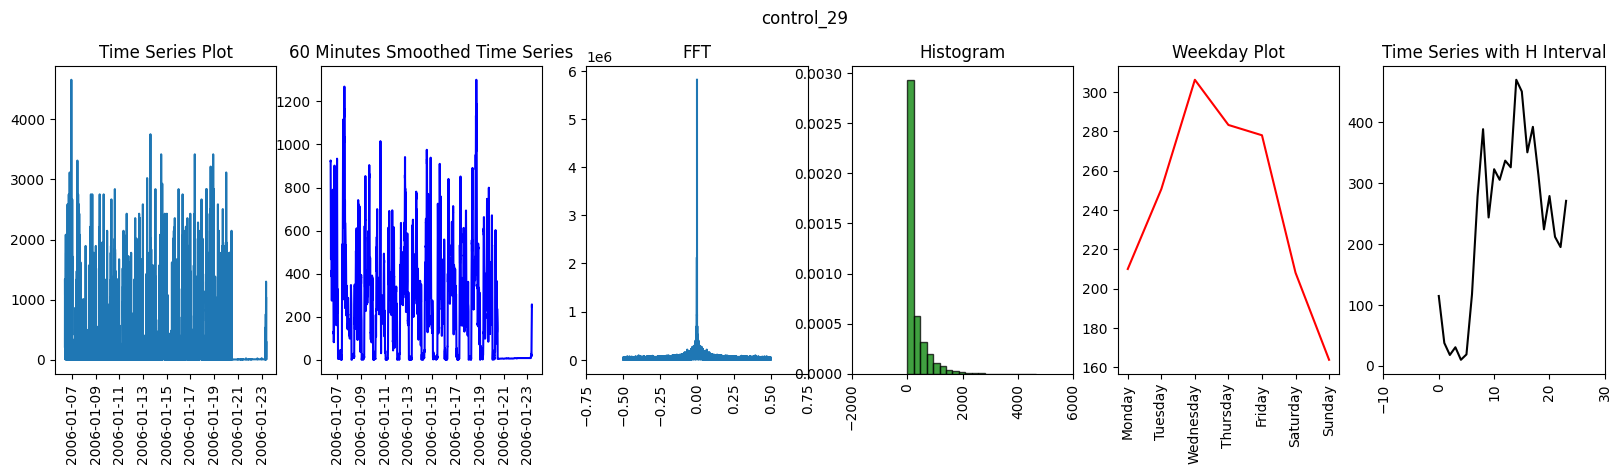

<Figure size 640x480 with 0 Axes>

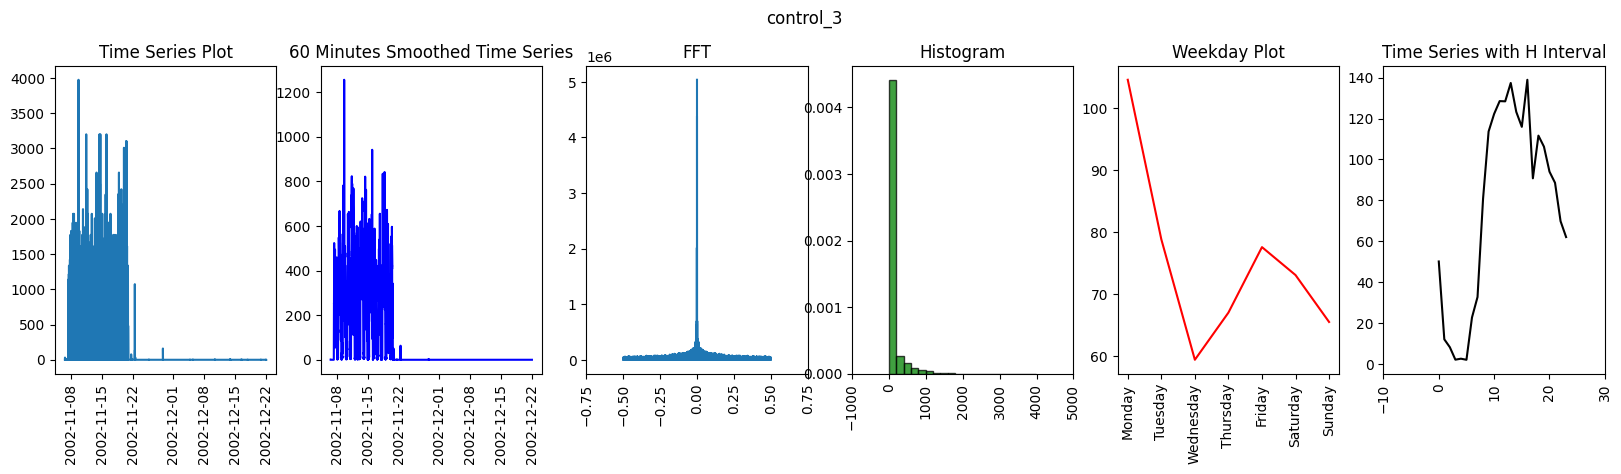

<Figure size 640x480 with 0 Axes>

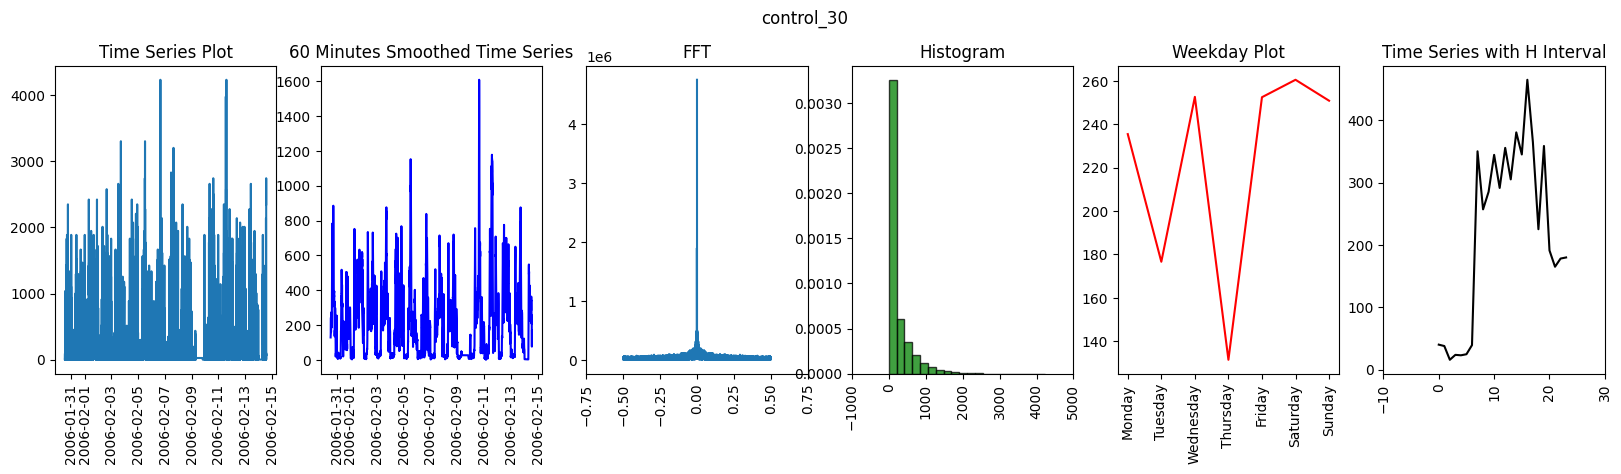

<Figure size 640x480 with 0 Axes>

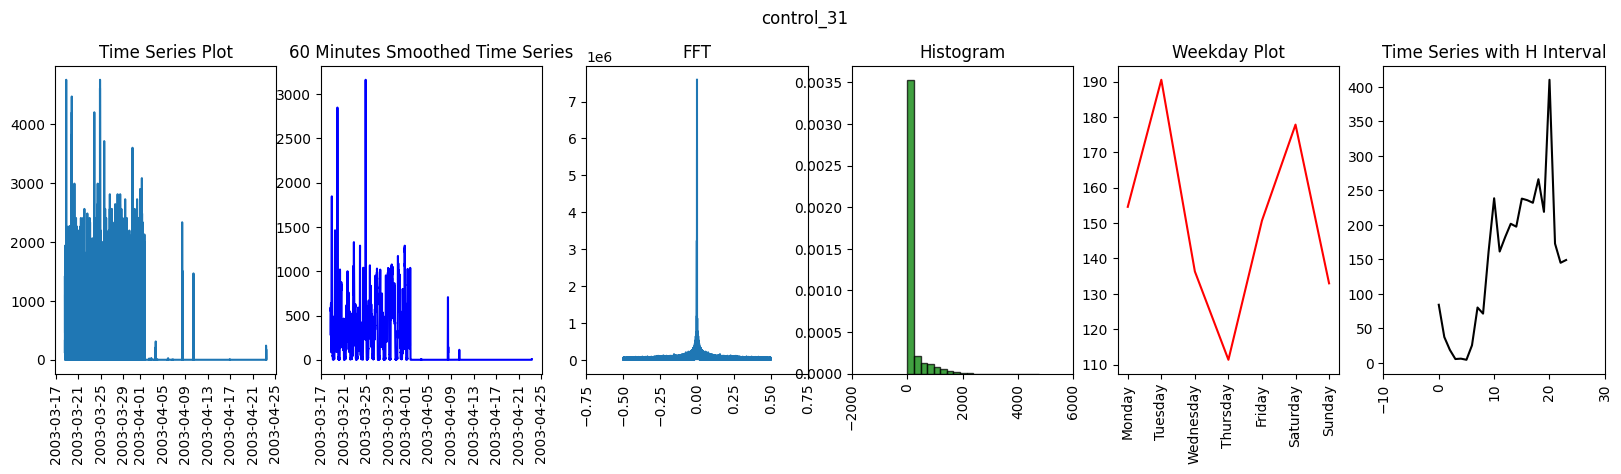

<Figure size 640x480 with 0 Axes>

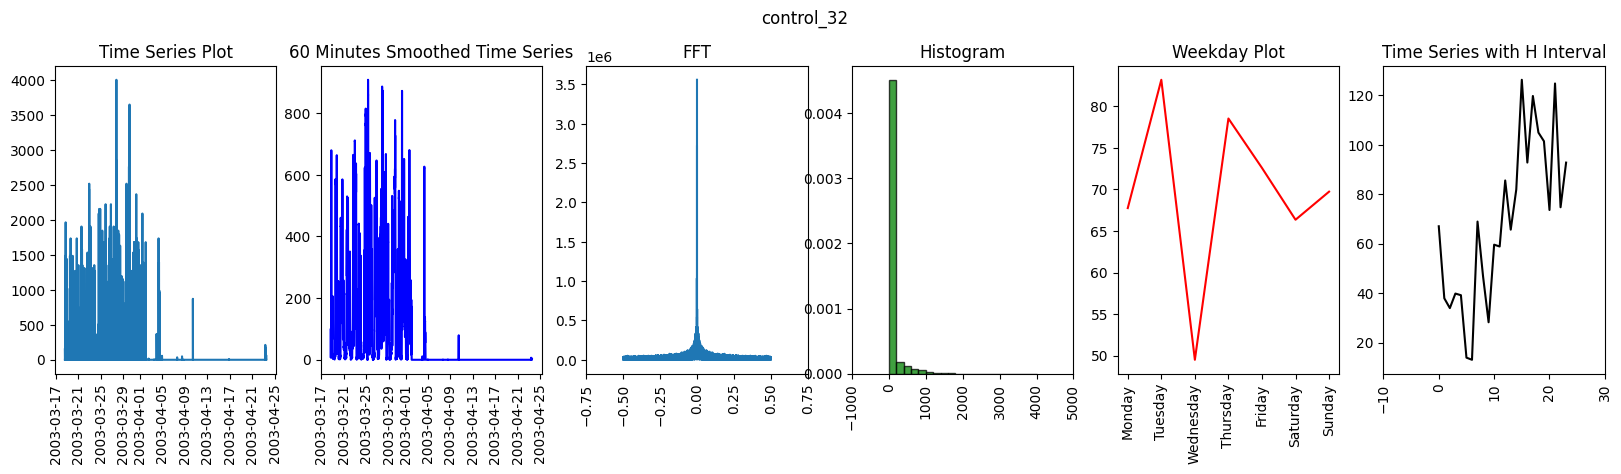

<Figure size 640x480 with 0 Axes>

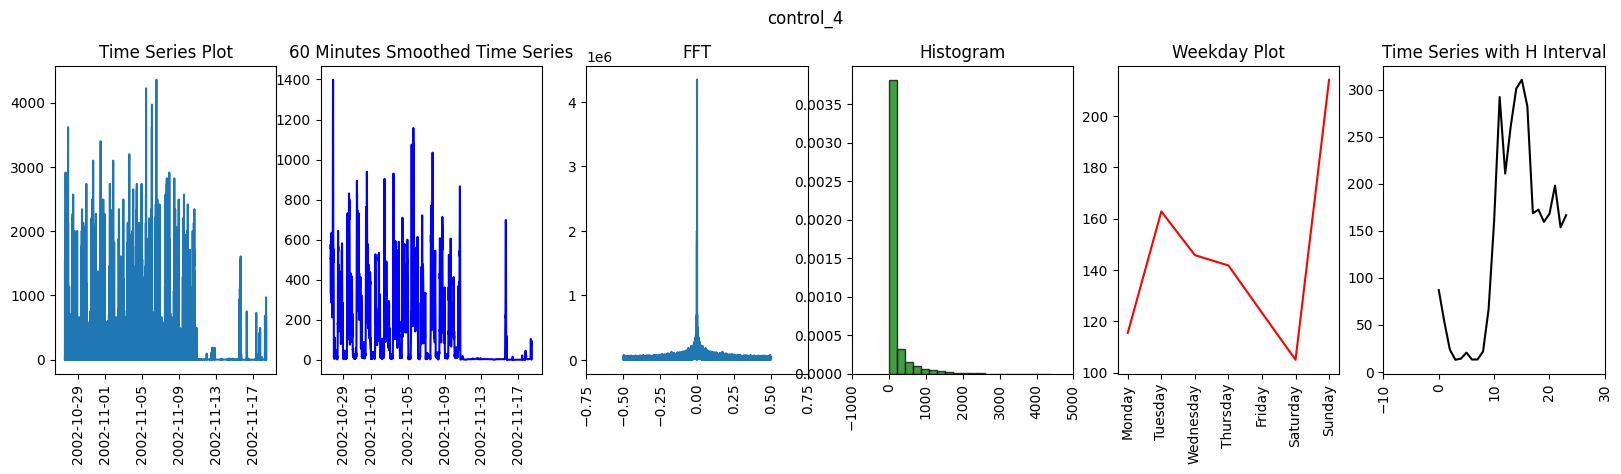

<Figure size 640x480 with 0 Axes>

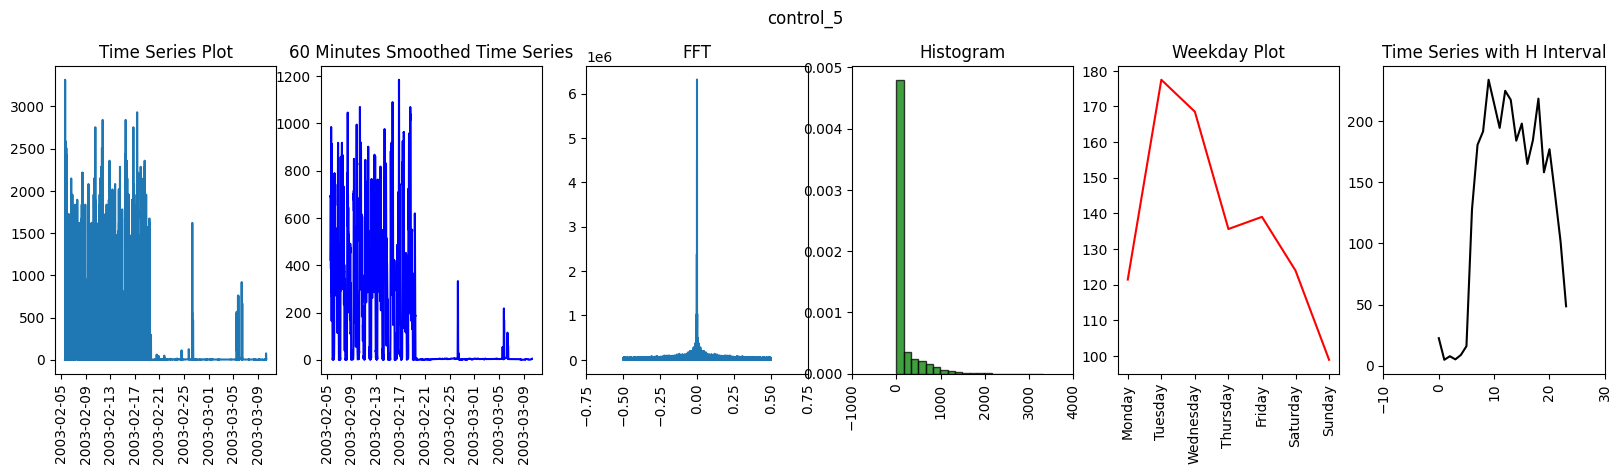

<Figure size 640x480 with 0 Axes>

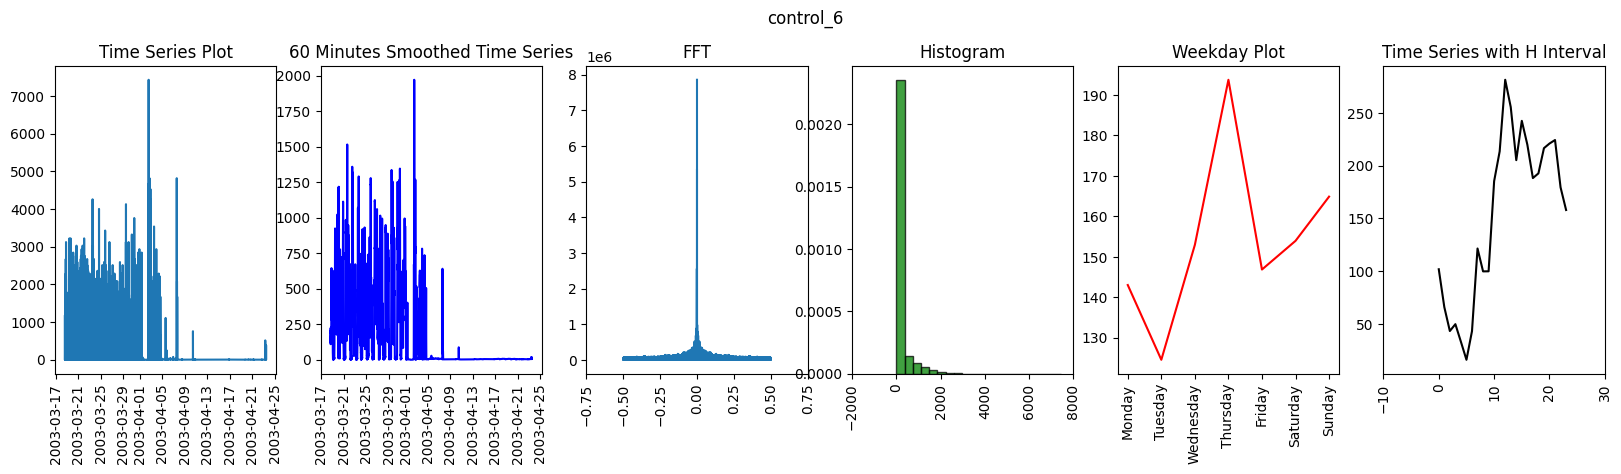

<Figure size 640x480 with 0 Axes>

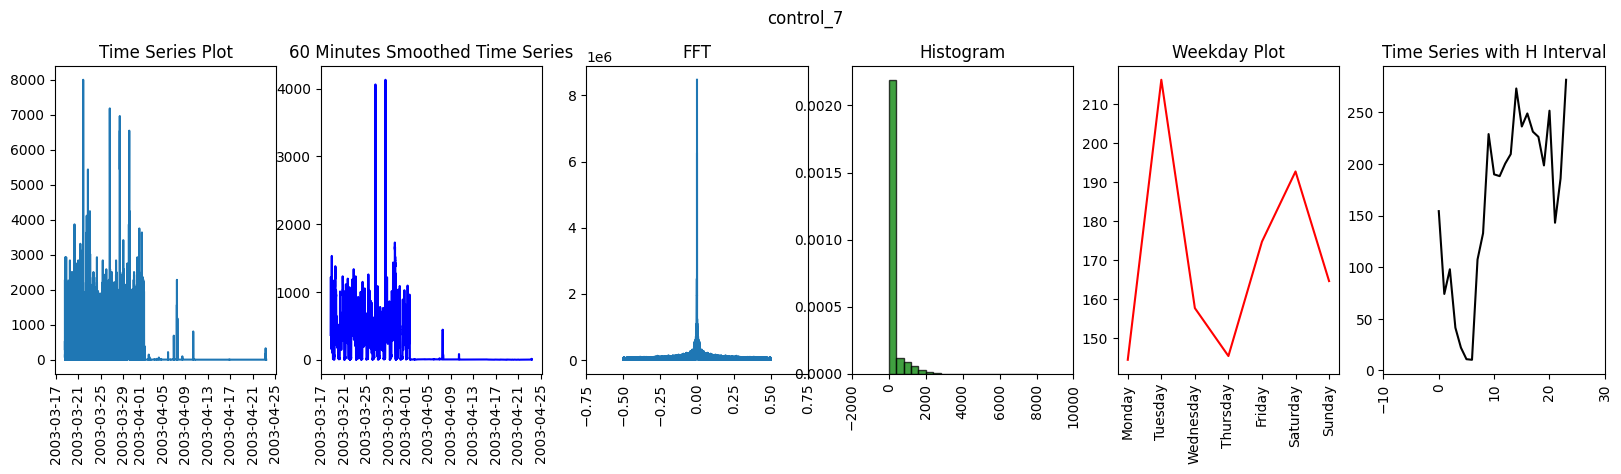

<Figure size 640x480 with 0 Axes>

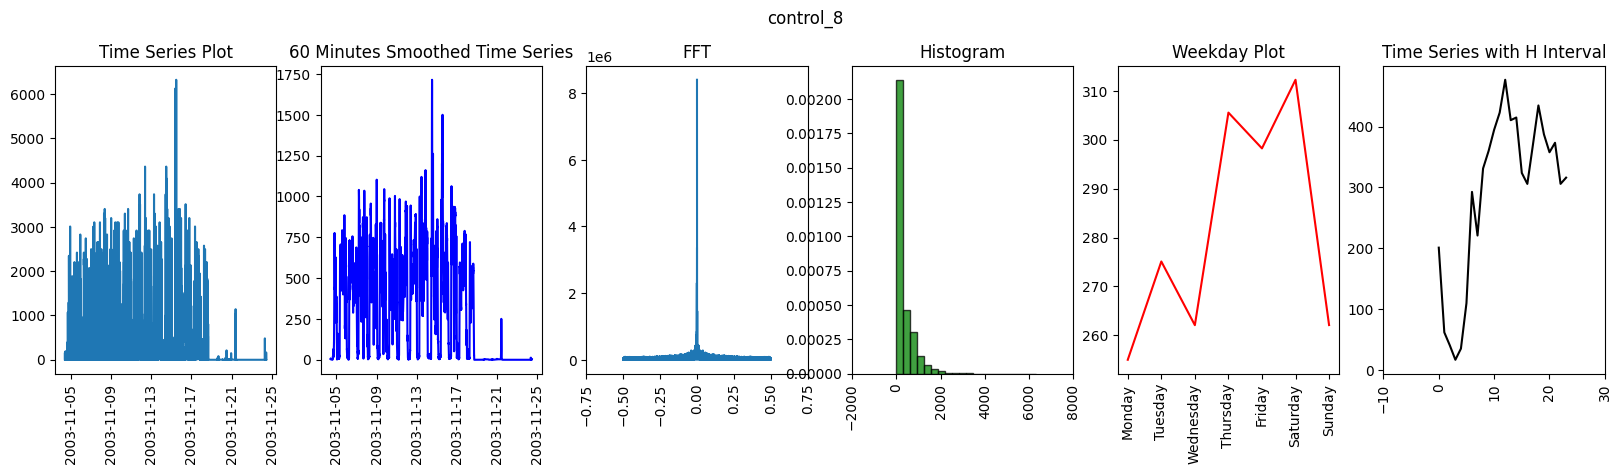

<Figure size 640x480 with 0 Axes>

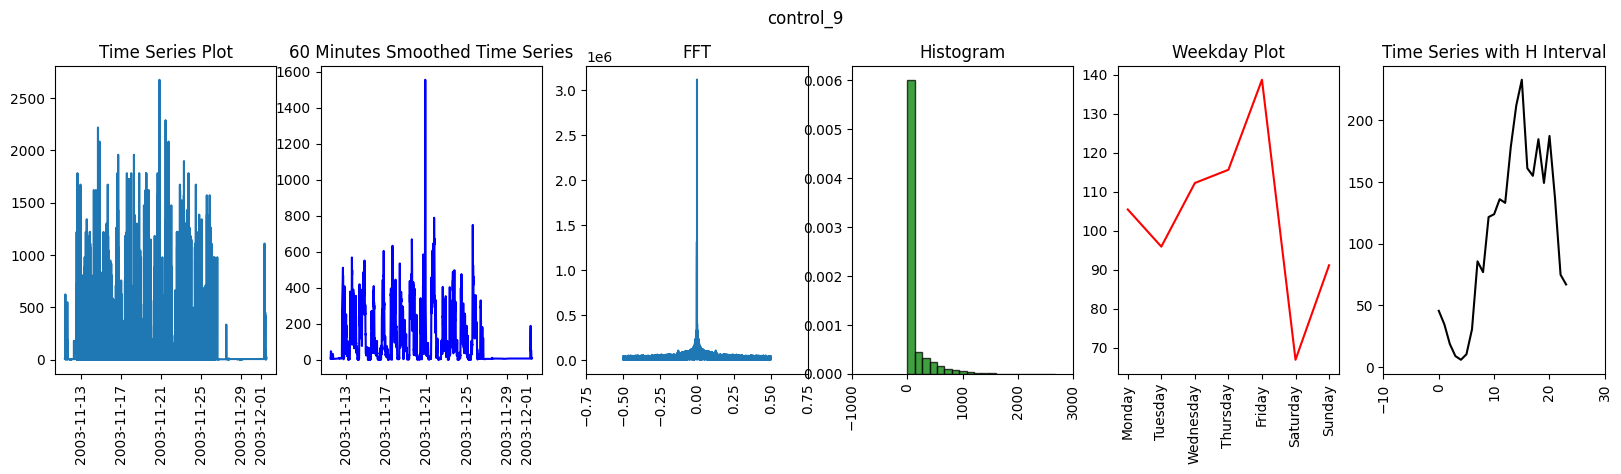

<Figure size 640x480 with 0 Axes>

In [41]:
# We use the function we created before to plot each of our csv files in condition and control dataset.
for i,name in enumerate(list(filled_dfs.keys())):
    df = filled_dfs[list(filled_dfs.keys())[i]]
    compare_plot(df, window=60, interval='H', title=name)
    plt.suptitle(i)  
    plt.show()

<p style="text-align: justify;">

The above plot shows five subplots, each representing a different visualization of the time series data in one of the CSV files in the condition and control datasets. 

* The <b>Time Series</b> plot shows the original time series data for the "condition" group. It looks quite noisy and erratic, with many spikes and drops in activity levels over time.
* The <b>Smoothed Time Series</b> plot shows the same time series data, but smoothed using a moving average with a window size of 60 minutes. The smoothed data is much less noisy and easier to interpret, revealing some clear patterns and trends over time.
* The <b>Histogram</b> shows the raw activity data. It appears to be skewed towards lower activity levels, with a few outliers towards the higher end.
* The <b>Weekday</b> plot shows the average activity levels per weekday for the "condition" group. There is a clear pattern of higher activity levels during the weekdays (Monday to Friday), with a dip on Saturday and a further dip on Sunday. This suggests that the participants in the "condition" group were more active on weekdays, possibly due to work or school obligations.
* The <b>Time series with H intervals</b> plot shows the average activity levels per hour, aggregated over hourly intervals. There appears to be a clear pattern of higher activity levels during the daytime hours (roughly 8am to 8pm), with lower activity levels during the nighttime hours (8pm to 8am). This makes sense, as most people are more active during the day than at night.

</p>

### 5.2. Comparision between Condition and Control group <a class="anchor" id="section_5_2"></a>
<p style="text-align: justify;">
In order to see the differences between 2 groups of condition and control, We compared the activity variable. We created an aggregated dataset by concatenating all of our 55 datasets. Then we added the <b>weekday</b> and <b>depressed</b> variable for each observation. We compared the average of activities in 24 hours and for each weekday.

</p>

In [42]:
# In this chunk of code, We read all the files in condition and control folders
dfnames = {}
all = []
for i,name in enumerate(list(filled_dfs.keys())):
    df = filled_dfs[list(filled_dfs.keys())[i]]
    df = smoothed_series(df,15)
    df = reduced_series(df,interval='H')
    df.insert(0, 'number', name)
    dfnames[name] = df
    all.append(df)


In [43]:
# Creating a csv file by concatenating all the csv files and Adding 2 colunms to our aggregated dataset
agg_csv = pd.concat(all, ignore_index=True)
agg_csv['weekday'] = agg_csv['timestamp'].dt.day_name()
agg_csv['depressed'] = pd.to_numeric(np.where((agg_csv['number'].str.contains('control')) ,'0',
                    np.where((agg_csv['number'].str.contains('condition')),'1',agg_csv['number'])))

In [44]:
agg_csv

number           timestamp    activity  time    weekday  depressed
0      condition_1 2003-05-07 12:00:00  364.257971    12  Wednesday          1
1      condition_1 2003-05-07 13:00:00  297.191111    13  Wednesday          1
2      condition_1 2003-05-07 14:00:00  276.710000    14  Wednesday          1
3      condition_1 2003-05-07 15:00:00  243.820000    15  Wednesday          1
4      condition_1 2003-05-07 16:00:00  223.770000    16  Wednesday          1
...            ...                 ...         ...   ...        ...        ...
26230    control_9 2003-12-01 08:00:00   19.614444     8     Monday          0
26231    control_9 2003-12-01 09:00:00  175.765556     9     Monday          0
26232    control_9 2003-12-01 10:00:00   53.267778    10     Monday          0
26233    control_9 2003-12-01 11:00:00    5.118889    11     Monday          0
26234    control_9 2003-12-01 12:00:00    7.771264    12     Monday          0

[26235 rows x 6 columns]

### Heatmap

<p style="text-align: justify;">
Now we create a heatmap for each label ('Condition' and 'Control') by aggregating the mean activity for each weekday and time of day.

* The x-axis shows the weekdays, and the y-axis shows the time of the day in hours (ranging from 0 to 23). The color of each cell in the heatmap represents the mean activity level for the corresponding weekday and time.
* We first create a subplot with two columns and sets the size of the plot to be 20x5. The days of the week are defined in the weekday_order list in order to sort them chronologically.
* Two heatmaps are created, one for the 'Condition' group and the other for the 'Control' group. The data for each group is filtered by their corresponding label and aggregated by weekday and time of day using the groupby method. Then, a pivot table is created to plot the data as a heatmap using the sns.heatmap function from the Seaborn library.
* The linewidth, linecolor, and cmap parameters are set to adjust the appearance of the heatmap. The ax parameter specifies which subplot to plot the heatmap on. Finally, the title of each subplot and the overall plot are set using the set_title and suptitle methods, respectively.
</p>

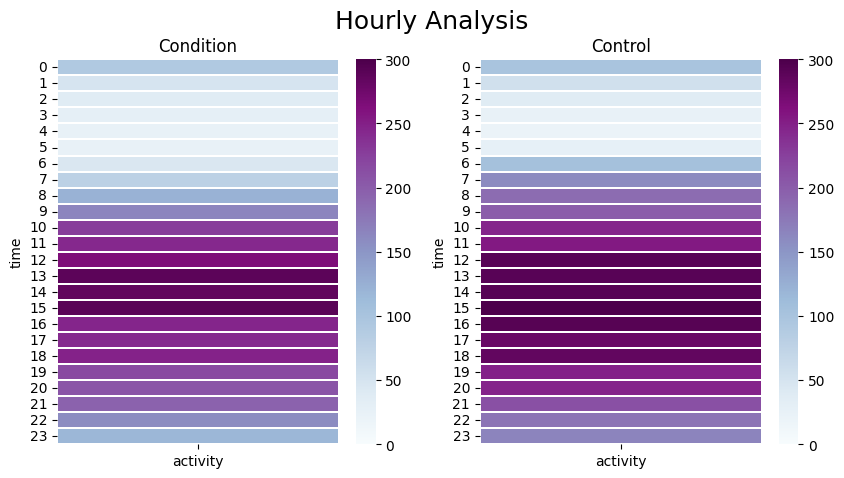

In [45]:
# plotting the heatmap for Hourly Activity
#| code-fold: False
#| label:fig-anyname
#| fig-cap: "plots for each individual"
#| include: True
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

heatmap_condition = (agg_csv.loc[agg_csv['depressed']==1]).groupby(['time'])['activity'].mean()
heatmap_condition = heatmap_condition.to_frame()
sns.heatmap(heatmap_condition, linewidth=0.01, linecolor= 'white', cmap='BuPu', ax=axs[0],vmin=0, vmax=300)
axs[0].set_title('Condition')



heatmap_control = (agg_csv.loc[agg_csv['depressed']==0]).groupby(['time'])['activity'].mean()
heatmap_control = heatmap_control.to_frame()
sns.heatmap(heatmap_control, linewidth=0.01, linecolor= 'white', cmap= 'BuPu', ax=axs[1],vmin=0, vmax=300)
axs[1].set_title('Control')
plt.suptitle('Hourly Analysis',fontsize=18)

plt.show()

Text(0.5, 0.98, 'Hourly Analysis')

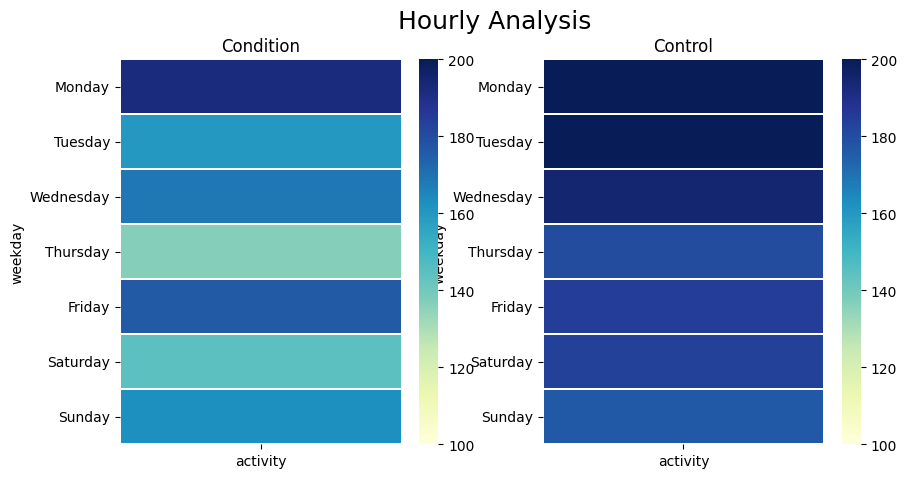

In [46]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

heatmap_condition = (agg_csv.loc[agg_csv['depressed']==1]).groupby(['weekday'])['activity'].mean()
heatmap_condition = heatmap_condition.to_frame()

sns.heatmap(heatmap_condition, linewidth=0.01, linecolor= 'white', cmap='YlGnBu', ax= axs[0], yticklabels= weekday_order,vmin=100, vmax=200)
axs[0].set_title('Condition')

heatmap_control = (agg_csv.loc[agg_csv['depressed']==0]).groupby(['weekday'])['activity'].mean()
heatmap_control = heatmap_control.to_frame()

sns.heatmap(heatmap_control, linewidth=0.01, linecolor= 'white', cmap= 'YlGnBu', ax= axs[1], yticklabels= weekday_order,vmin=100, vmax=200)

axs[1].set_title('Control')

plt.suptitle('Hourly Analysis',fontsize=18)


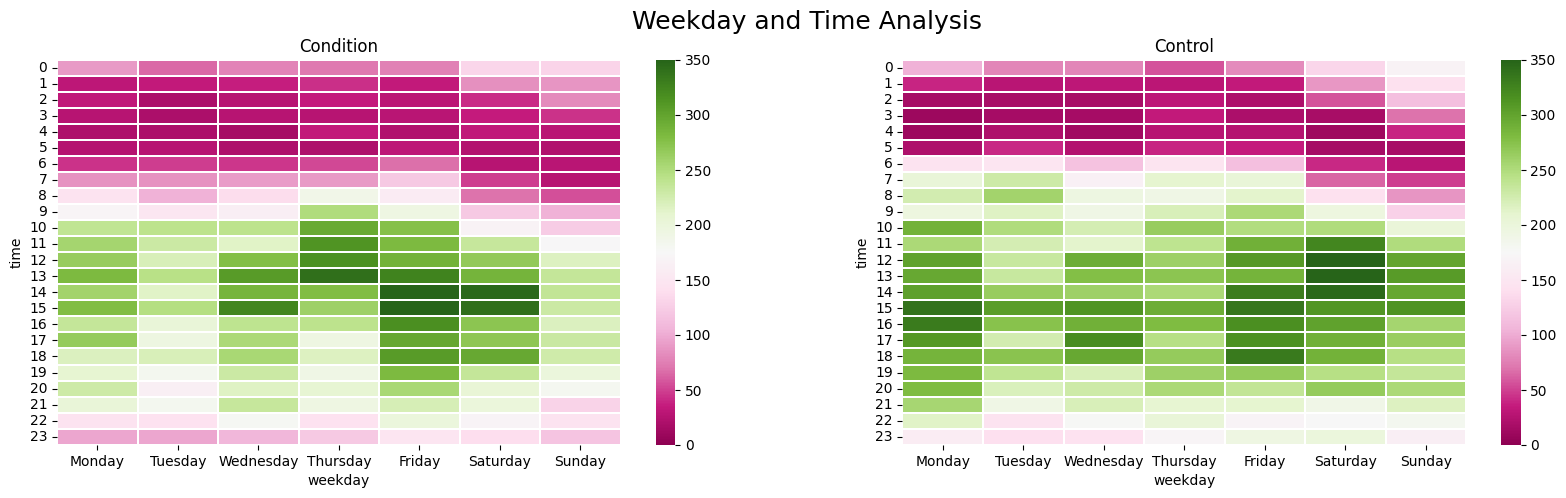

In [47]:
# plotting the heatmap for Hourly Activity per each weekday
#| code-fold: False
#| label:fig-anyname
#| fig-cap: "plots for each individual"
#| include: True
fig, axs = plt.subplots(ncols=2, figsize=(20, 5))
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

heatmap_condition = (agg_csv.loc[agg_csv['depressed']==1]).groupby(['weekday','time'])['activity'].mean()
heatmap_condition = heatmap_condition.reset_index()
heatmap_condition['weekday'] = pd.Categorical(heatmap_condition['weekday'], categories=weekday_order, ordered=True)
sns.heatmap(heatmap_condition.pivot_table(index='time', columns='weekday', values='activity'), linewidth=0.01, linecolor="white", cmap='PiYG', ax=axs[0],vmin=0, vmax=350)
axs[0].set_title('Condition')

heatmap_control = (agg_csv.loc[agg_csv['depressed']==0]).groupby(['weekday','time'])['activity'].mean()
heatmap_control = heatmap_control.reset_index()
heatmap_control['weekday'] = pd.Categorical(heatmap_control['weekday'], categories=weekday_order, ordered=True)
sns.heatmap(heatmap_control.pivot_table(index='time', columns='weekday', values='activity'), linewidth=0.01, linecolor="white", cmap='PiYG', ax=axs[1],vmin=0, vmax=350)
axs[1].set_title('Control')

plt.suptitle('Weekday and Time Analysis',fontsize=18)

plt.show()


<p style="text-align: justify;">
In figure @fig-anyname it can be observed that amount of activity in control group is usually higher that condition group in all weekdays.
The heatmap for the "Condition" group appears to show lower levels of activity during weekdays and higher levels during the weekend (Saturday and Sunday). There is a noticeable dip in activity during weekday afternoons (12 PM to 4 PM).

We can observe that for Condition group, people generally have very less activities on tuesdays and Sundays.
Whereas in Control group, we observe increase in activity during the weekends, specially Saturday between 11:00 to 17:00 hours. Activities also looks higher on mondays between the afternoon hours.
However for Control group Friday looks like hoghest in activity during 13:00 to 18:00 hours.
</p>



#### Lineplots
<p style="text-align: justify;">
In the following, we compare the weekday activity and hourly activity in seperated plots. 

In <b>Weekday Activity</b> plot, it can be seen that in all weekdays, the amount of activity for control group is more than condition group.
The weekday activity level for condition group has its minimum in Sunday, but the control group has its minimum on Wednesday. The both groups has their most activity level on Friday.

</p>

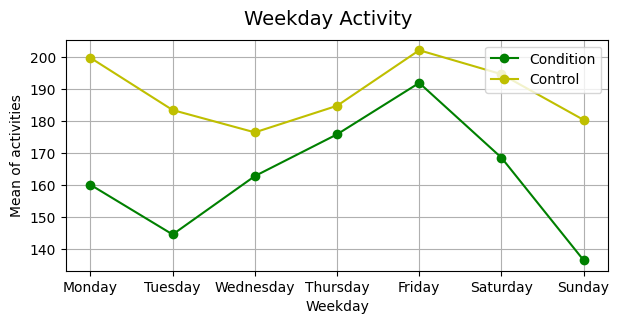

In [48]:
plt.figure(figsize=(7, 3))

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

lineplot_condition = (agg_csv.loc[agg_csv['depressed']==1]).groupby(['weekday'])['activity'].mean()
lineplot_condition = lineplot_condition.reset_index()
lineplot_condition['weekday'] = pd.Categorical(lineplot_condition['weekday'], categories=weekday_order, ordered=True)

lineplot_control = (agg_csv.loc[agg_csv['depressed']==0]).groupby(['weekday'])['activity'].mean()
lineplot_control = lineplot_control.reset_index()
lineplot_control['weekday'] = pd.Categorical(lineplot_control['weekday'], categories=weekday_order, ordered=True)

# Sort the data by weekday order
lineplot_condition = lineplot_condition.sort_values('weekday')
lineplot_control = lineplot_control.sort_values('weekday')

plt.plot(lineplot_condition['weekday'], lineplot_condition['activity'], 'g-o', label='Condition')
plt.plot(lineplot_control['weekday'], lineplot_control['activity'], 'y-o', label='Control')

plt.xlabel('Weekday')
plt.ylabel('Mean of activities')
plt.legend(bbox_to_anchor=(1, 1), loc='upper right')
plt.suptitle('Weekday Activity', fontsize=14)
plt.grid(True)

plt.show()


<p style="text-align: justify;">
The <b>Hourly Activity</b> plot depicts that both control and condition group follow the same trend but overall, the number of activity per hour for control group is more than condition group. 

we can see that the mean activity level is generally higher during the daytime (between 7:00 and 20:00 hours) and lower during the nighttime (between 21:00 and 6:00 hours) for both groups. However, the activity levels of the 'Condition' group are generally lower than those of the 'Control' group throughout the day.
Overall, the line plot clearly shows the differences in mean activity levels between the two groups throughout the day, with the 'Control' group showing higher activity levels than the 'Condition' group. The plot can be useful in understanding the daily patterns of physical activity levels and in identifying differences between groups.
</p>

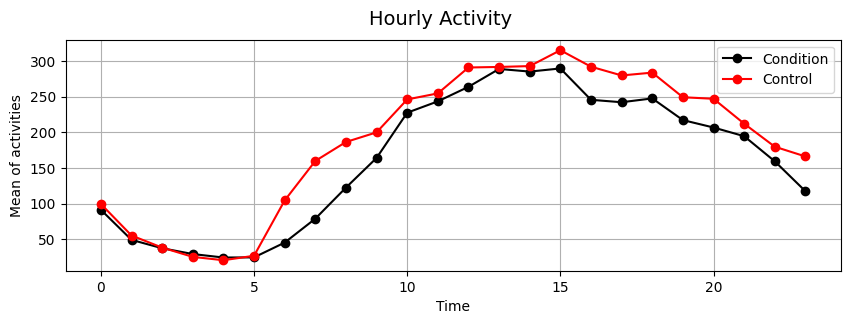

In [49]:
# Comparing the mean of activities of 24 hours for 2 groups

plt.figure(figsize=(10, 3))

lineplot_condition = (agg_csv.loc[agg_csv['depressed']==1]).groupby(['time'])['activity'].mean()
lineplot_condition = lineplot_condition.reset_index()
plt.plot(lineplot_condition['time'],lineplot_condition['activity'], 'k-o',label = 'Condition')

lineplot_control = (agg_csv.loc[agg_csv['depressed']==0]).groupby(['time'])['activity'].mean()
lineplot_control = lineplot_control.reset_index()
plt.plot(lineplot_control['time'],lineplot_control['activity'], 'r-o',label = 'Control')

plt.xlabel('Time')
plt.ylabel('Mean of activities')
plt.legend(bbox_to_anchor=(1, 1), loc='upper right')
plt.suptitle('Hourly Activity',fontsize=14)
plt.grid(True)
plt.show()

We have taken the following steps for the lineplots:

* We use the matplotlib library to create a figure using the plt.figure() function. 
* The activities of the 'Condition' group are calculated by filtering the 'agg_csv' dataframe based on the value of the 'depressed' column equal to 1, and then grouping the data by 'time' for hourly activity and 'weekday' for weekday activity and calculating the mean activity. 
* Similarly, the activities of the 'Control' group are calculated by filtering the 'agg_csv' dataframe based on the value of the 'depressed' column equal to 0.
* The line plot is created using plt.plot() function. The activities of the 'Condition' group and 'Control' group are plotted against the time. The 'k-o' and 'r-o' options are used to set the line color and marker style for the 'Condition' and 'Control' groups, respectively.

* The x-axis in weekday plot shows the weekdays and in hourly plot shows the time of the day in hours (ranging from 0 to 23), and the y-axis shows the mean activity level.


#### Boxplots
<p style="text-align: justify;">
In the following, we use boxplots for weekday, hourly and interval activity of each groups. Here we can understand the distribution of each feature and detect the outliers. 
Based on the generated boxplots, we can make several observations:

* Both groups have some outliers in the upper range of scores. This suggests that there may be a subset of individuals in both groups who experience occasional very high scores.

* Overall, the boxplot suggests that while there may be some differences in the distribution of data between the 'Condition' and 'Control' groups, the two groups appear to have similar patterns.
A more comprehensive analysis would require looking at the data as a whole and considering other factors that may influence the distribution of scores.
</p>

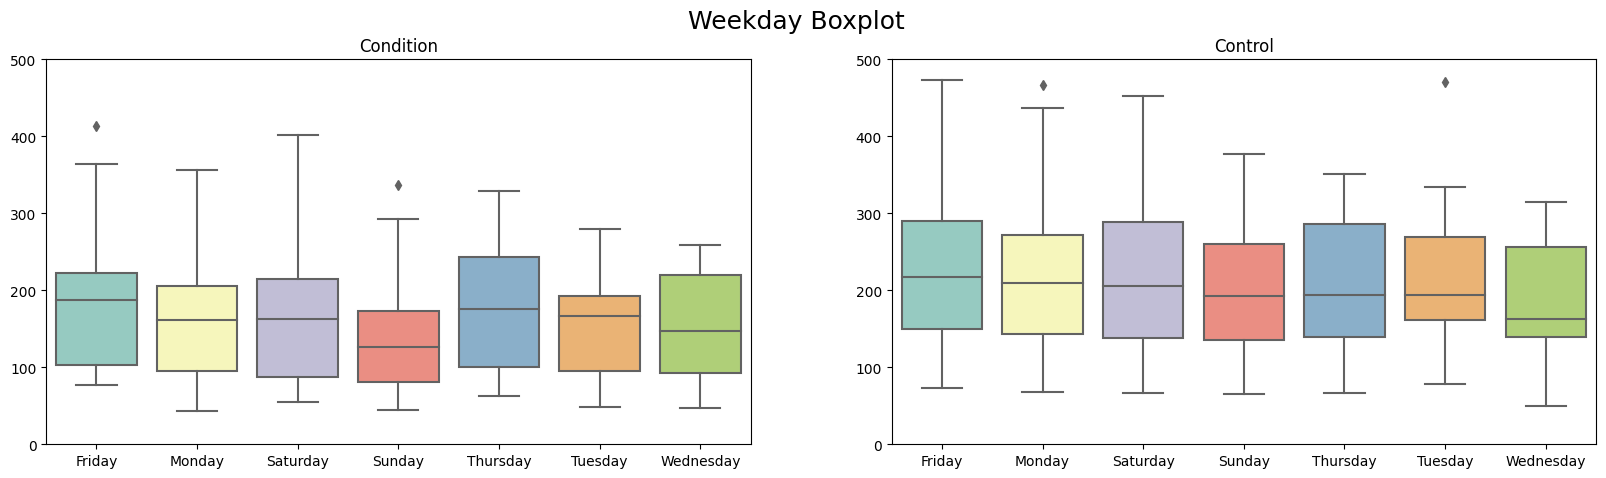

In [50]:
# Weekday Boxplots for each group
fig, axs = plt.subplots(ncols=2, figsize=(20, 5))
sns.boxplot(data = merged_score.loc[merged_score['depressed']==1].iloc[:,4:11],  palette='Set3',  ax=axs[0])
axs[0].set_title('Condition')
axs[0].set_ylim(0,500)

sns.boxplot(data = merged_score.loc[merged_score['depressed']==0].iloc[:,4:11],  palette='Set3',  ax=axs[1])
axs[1].set_title('Control')
axs[1].set_ylim(0,500)

plt.suptitle('Weekday Boxplot',fontsize=18)

plt.show()

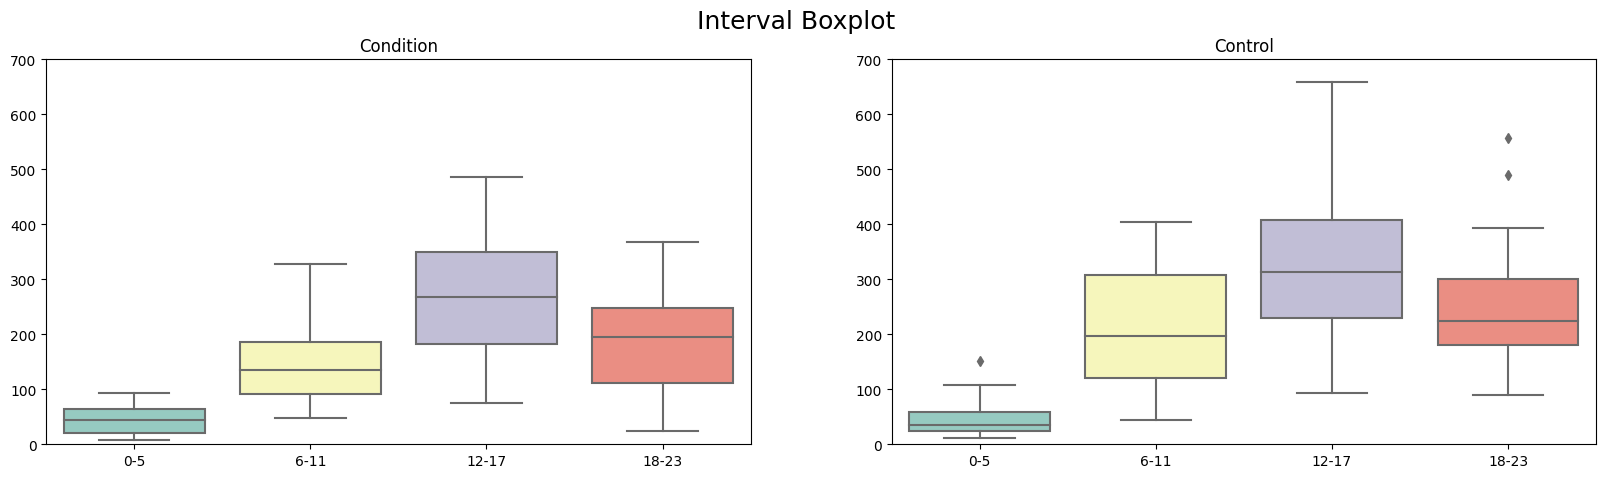

In [51]:
# Interval Boxplots for each group
fig, axs = plt.subplots(ncols=2, figsize=(20, 5))
sns.boxplot(data = merged_score.loc[merged_score['depressed']==1].iloc[:,-4:],  palette='Set3',  ax=axs[0])
axs[0].set_title('Condition')
axs[0].set_ylim(0, 700)

sns.boxplot(data = merged_score.loc[merged_score['depressed']==0].iloc[:,-4:],  palette='Set3',  ax=axs[1])
axs[1].set_title('Control')
axs[1].set_ylim(0, 700)
plt.suptitle('Interval Boxplot',fontsize=18)

plt.show()

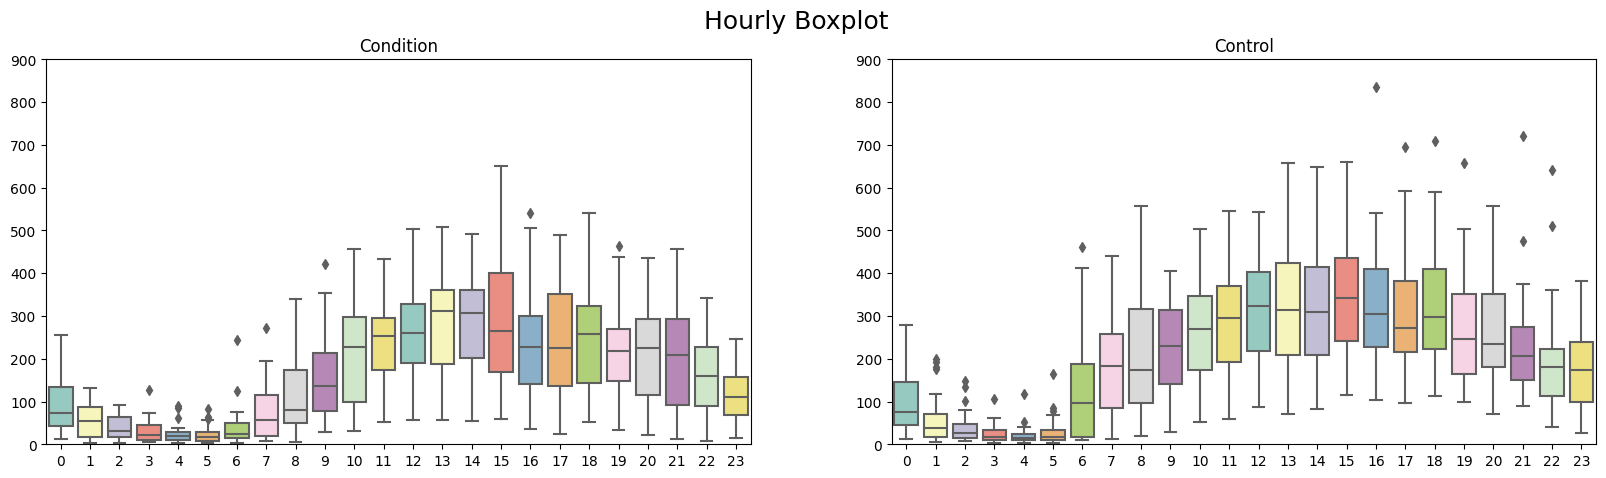

In [52]:
# Hourly Boxplots for each group
fig, axs = plt.subplots(ncols=2, figsize=(20, 5))
sns.boxplot(data = merged_score.loc[merged_score['depressed']==1].iloc[:,11:35],  palette='Set3',  ax=axs[0])
axs[0].set_title('Condition')
axs[0].set_ylim(0,900)
sns.boxplot(data = merged_score.loc[merged_score['depressed']==0].iloc[:,11:35],  palette='Set3',  ax=axs[1])
axs[1].set_title('Control')
axs[1].set_ylim(0,900)
plt.suptitle('Hourly Boxplot',fontsize=18)

plt.show()

We have taken the following steps for the boxplots:

* The seaborn library to create the boxplots and matplotlib to create the subplots.

* The data used to create the boxplots is a subset of a larger dataset called 'merged_score', which is filtered based on the value of a column 'depressed'. We selected the features using 'iloc' function.

* Also, the 'axs[0].set_title' and 'axs[1].set_title' methods set the titles for each of the subplots, and 'axs[0].set_ylim' and 'axs[1].set_ylim' set the y-axis limits for each subplot. Finally, the 'plt.suptitle' method sets a title for the entire figure.

* Once the figure is created, we use the 'plt.show()' function to display it.

We can observe above that the individuals in 'Control' and 'Condition' groups are mostly active during the third interval and then in the fourth interval. 

In the 'Control' group, the activity levels are relatively consistent across all time intervals for most participants, with a few exceptions where there are some peaks and dips in activity levels. In the 'Condition' group, however, there is more variability in activity levels across time intervals, with some participants showing higher levels of activity during certain time intervals and lower levels during others.

Overall, this graph suggests that the 'Condition' group may have more individual variability in activity levels than the 'Control' group.

## 5.3. Linear Correlation <a class="anchor" id="section_5_3"></a>
<p style="text-align: justify;">
Below we calculate the Pearson correlation coefficient between each pair of variables in the merged_score DataFrame, and then returns a sorted list of the correlation coefficients for the depressed variable. The Pearson correlation coefficient is a measure of the linear correlation between two variables, with values ranging from -1 to +1, where -1 indicates a perfect negative correlation, +1 indicates a perfect positive correlation, and 0 indicates no correlation.

The corr() function computes the pairwise correlation of columns, excluding NaN values by default. The resulting correlation matrix is a DataFrame object with the same columns and indices as the original DataFrame, where each element represents the Pearson correlation coefficient between the corresponding row and column.

It then selects the column corresponding to the depressed variable from the correlation matrix, and sorts its values in descending order, using the sort_values() function. This returns a Series object with the correlation coefficients in decreasing order, with the variable names as the index.
</p>

In [53]:
# Checking the linear correlation of variables
corr_matrix = merged_score.corr()
corr_matrix['depressed'].sort_values(ascending = False)

depressed      1.000000
age_numeric    0.190219
gender         0.188434
3              0.129365
4              0.109847
2              0.017065
0-5           -0.027328
0             -0.065146
1             -0.073874
5             -0.096480
21            -0.117282
13            -0.127010
14            -0.150726
22            -0.153728
Thursday      -0.166801
Friday        -0.196438
15            -0.196967
11            -0.198562
19            -0.199475
Wednesday     -0.209038
20            -0.209209
12-17         -0.209378
10            -0.209742
17            -0.217250
18-23         -0.225427
18            -0.227575
12            -0.231279
Saturday      -0.234330
16            -0.255380
Monday        -0.291376
9             -0.301814
23            -0.331615
Sunday        -0.352284
8             -0.353730
6-11          -0.359083
Tuesday       -0.374667
6             -0.392709
7             -0.470268
Name: depressed, dtype: float64

#### Correlation Heatmap
<p style="text-align: justify;">
We will now use sns.heatmap() function from the Seaborn library to create the heatmap. The function takes in the correlation matrix as its input and several optional arguments that can be used to customize the plot.

The annot=True argument adds the numerical values to each cell of the heatmap, and annot_kws={"size": 5} sets the font size of the annotations to 5. The linewidth=1 and linecolor="black" arguments control the width and color of the lines separating each cell in the heatmap.

Hence it will produce a heatmap for us that visualizes the correlation between all pairs of variables in merged_score.
</p>

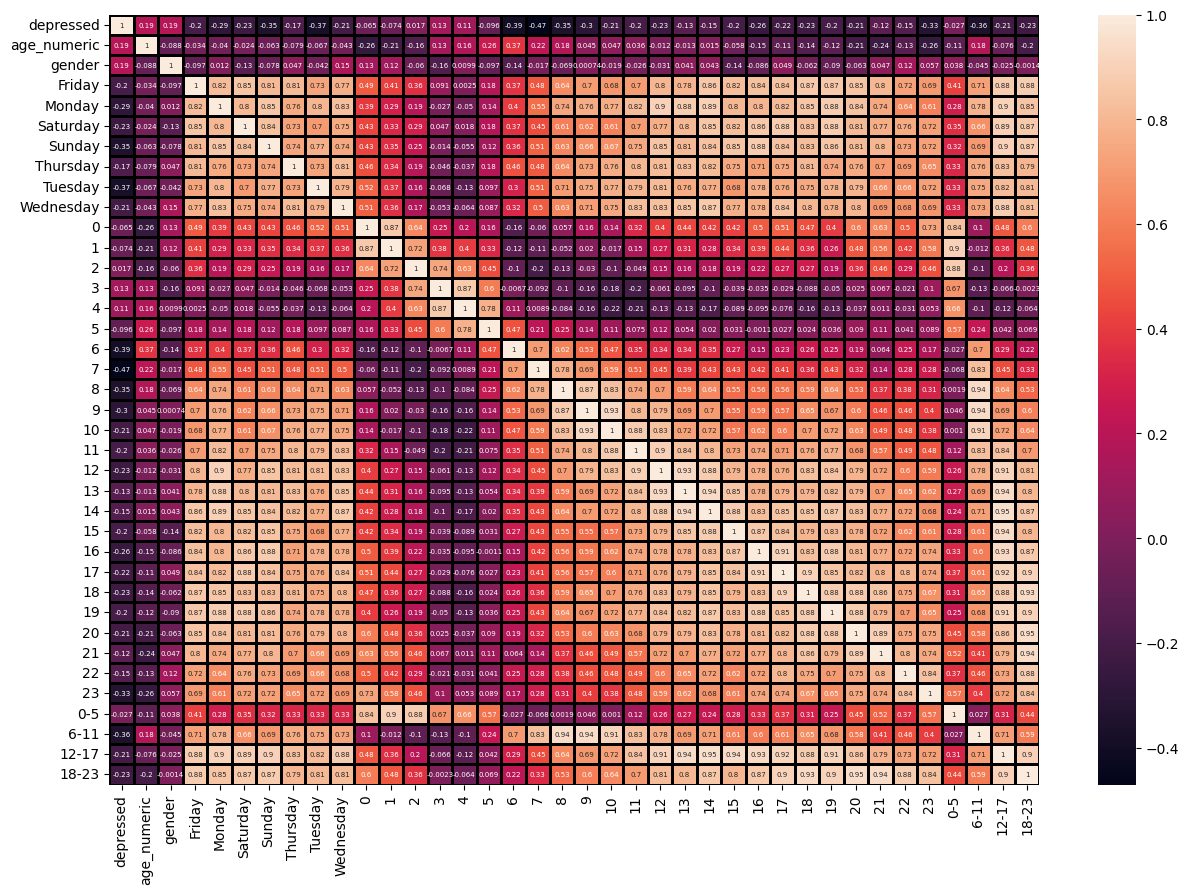

In [54]:
# heatmap of contol
plt.figure(figsize=(15,10))
sns.heatmap(merged_score.corr(), annot=True, annot_kws={"size": 5}, linewidth=1, linecolor="black")
plt.show()

We can observe that many variables shows high coorellation. It is interesting to observe that early weekdays coorelates highly with the mid hours of the day. Same can be observed with third and fourth tim intervals. 

Also we can see that age shows some correlation with the earlier hours of the day.

## 6. Feature Selection using tsfresh library <a class="anchor" id = "section_6"> </a>
<p style="text-align: justify;">
In this part of study, we use tsfresh package to create a new dataset. This library can be used to extract a range of features from time series data, including statistical features (such as mean, variance, and autocorrelation), Fourier transform-based features (such as frequency domain power spectra and peak frequencies), and features based on time-series models (such as ARIMA and state space models). 
In the following, we will extract some statistical features from our sensor data for each person using tsfresh. Then we clean the new dataset by removing the features with standard deviation of less than 0.05. In addition, we scale the data between 0 and 1. 
</p>

In [55]:
# Creating a function for extracting statistical features using tsfresh
from tsfresh.feature_extraction import extract_features, EfficientFCParameters
def feature_extraction(df):
    features = ['mean','std','standard_deviation','variance','skewness','kurtosis',
                'maximum','minimum','median','absolute_sum_of_changes','longest_strike_above_mean',
                'longest_strike_below_mean','count_above_mean','count_below_mean','autocorrelation']
    fc_parameters = EfficientFCParameters()
    fc_parameters_filtered = {feat: fc_parameters[feat] for feat in features if feat in fc_parameters}
    extracted_features = extract_features(df, column_id="number", column_sort="timestamp",default_fc_parameters=fc_parameters_filtered)
    extracted_features.reset_index(inplace=True)
    extracted_features.rename(columns={'index':'Datafile'},inplace=True)
    return extracted_features

In [56]:
# tsfresh features
# First of all, we select some importent feature of tsfresh, otherwise, we will have more than 750 features which would be hard to deal with.

tsfresh_df = {}
tsfresh_list = []
for i,name in enumerate(list(filled_dfs.keys())):
    df = filled_dfs[list(filled_dfs.keys())[i]]
    df = df.reset_index()
    df = df.reset_index()
    df.columns.name = None
    df = feature_extraction(df)
    tsfresh_df[name] = df
    tsfresh_list.append(df)


Feature Extraction: 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]


In [57]:
tsfresh_list[0]

Datafile  index__mean  index__standard_deviation  index__variance  \
0  condition_1      11621.5                6709.964822     4.502363e+07   

   index__skewness  index__kurtosis  index__maximum  index__minimum  \
0              0.0             -1.2         23243.0             0.0   

   index__median  index__absolute_sum_of_changes  ...  \
0        11621.5                         23243.0  ...   

   fft__autocorrelation__lag_0  fft__autocorrelation__lag_1  \
0                          1.0                     0.428845   

   fft__autocorrelation__lag_2  fft__autocorrelation__lag_3  \
0                     0.383771                      0.38454   

   fft__autocorrelation__lag_4  fft__autocorrelation__lag_5  \
0                     0.437382                     0.381491   

   fft__autocorrelation__lag_6  fft__autocorrelation__lag_7  \
0                     0.392197                      0.44691   

   fft__autocorrelation__lag_8  fft__autocorrelation__lag_9  
0                     0.384587                     0.436016  

[1 rows x 93 columns]

In [58]:
tsfeatures = pd.concat(tsfresh_list, ignore_index=True)
tsfeatures = tsfeatures.rename(columns = {'Datafile':'number'})
tsfeatures.head()

number  index__mean  index__standard_deviation  index__variance  \
0   condition_1      11621.5                6709.964822     4.502363e+07   
1  condition_10      10777.0                6222.392519     3.871817e+07   
2  condition_11      11494.5                6636.641338     4.404501e+07   
3  condition_12      11073.0                6393.288199     4.087413e+07   
4  condition_13      12954.5                7479.572732     5.594401e+07   

   index__skewness  index__kurtosis  index__maximum  index__minimum  \
0              0.0             -1.2         23243.0             0.0   
1              0.0             -1.2         21554.0             0.0   
2              0.0             -1.2         22989.0             0.0   
3              0.0             -1.2         22146.0             0.0   
4              0.0             -1.2         25909.0             0.0   

   index__median  index__absolute_sum_of_changes  ...  \
0        11621.5                         23243.0  ...   
1        10777.0                         21554.0  ...   
2        11494.5                         22989.0  ...   
3        11073.0                         22146.0  ...   
4        12954.5                         25909.0  ...   

   fft__autocorrelation__lag_0  fft__autocorrelation__lag_1  \
0                          1.0                     0.428845   
1                          1.0                     0.281962   
2                          1.0                     0.439887   
3                          1.0                     0.453247   
4                          1.0                     0.368955   

   fft__autocorrelation__lag_2  fft__autocorrelation__lag_3  \
0                     0.383771                     0.384540   
1                     0.257106                     0.273901   
2                     0.503167                     0.404999   
3                     0.378372                     0.354516   
4                     0.341136                     0.359329   

   fft__autocorrelation__lag_4  fft__autocorrelation__lag_5  \
0                     0.437382                     0.381491   
1                     0.288885                     0.258235   
2                     0.414722                     0.427922   
3                     0.351296                     0.378307   
4                     0.302751                     0.320784   

   fft__autocorrelation__lag_6  fft__autocorrelation__lag_7  \
0                     0.392197                     0.446910   
1                     0.249354                     0.242493   
2                     0.376940                     0.402870   
3                     0.330239                     0.358804   
4                     0.269274                     0.271962   

   fft__autocorrelation__lag_8  fft__autocorrelation__lag_9  
0                     0.384587                     0.436016  
1                     0.255870                     0.269205  
2                     0.352075                     0.411580  
3                     0.360494                     0.334582  
4                     0.291101                     0.324286  

[5 rows x 93 columns]

In [59]:
tsfeatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 93 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   number                               55 non-null     object 
 1   index__mean                          55 non-null     float64
 2   index__standard_deviation            55 non-null     float64
 3   index__variance                      55 non-null     float64
 4   index__skewness                      55 non-null     float64
 5   index__kurtosis                      55 non-null     float64
 6   index__maximum                       55 non-null     float64
 7   index__minimum                       55 non-null     float64
 8   index__median                        55 non-null     float64
 9   index__absolute_sum_of_changes       55 non-null     float64
 10  index__longest_strike_above_mean     55 non-null     float64
 11  index__longest_strike_below_mean  

In [60]:
#checking for missing values
sum(tsfeatures.isna().sum())

0

In [61]:
tsfresh_score = pd.merge(score, tsfeatures, on = 'number').drop('number',axis=1)
tsfresh_score.head()

depressed  age_numeric  gender  index__mean  index__standard_deviation  \
0          1           37       2      11621.5                6709.964822   
1          1           42       2      19462.5               11236.968286   
2          1           47       1      10823.5                6249.239307   
3          1           27       2      10777.5                6222.681195   
4          1           52       2      10746.0                6204.494661   

   index__variance  index__skewness  index__kurtosis  index__maximum  \
0     4.502363e+07              0.0             -1.2         23243.0   
1     1.262695e+08              0.0             -1.2         38925.0   
2     3.905299e+07              0.0             -1.2         21647.0   
3     3.872176e+07              0.0             -1.2         21555.0   
4     3.849575e+07              0.0             -1.2         21492.0   

   index__minimum  ...  fft__autocorrelation__lag_0  \
0             0.0  ...                          1.0   
1             0.0  ...                          1.0   
2             0.0  ...                          1.0   
3             0.0  ...                          1.0   
4             0.0  ...                          1.0   

   fft__autocorrelation__lag_1  fft__autocorrelation__lag_2  \
0                     0.428845                     0.383771   
1                     0.581278                     0.468652   
2                     0.323589                     0.355088   
3                     0.512339                     0.385585   
4                     0.368063                     0.352426   

   fft__autocorrelation__lag_3  fft__autocorrelation__lag_4  \
0                     0.384540                     0.437382   
1                     0.434727                     0.446788   
2                     0.309398                     0.274155   
3                     0.377913                     0.389713   
4                     0.335389                     0.337658   

   fft__autocorrelation__lag_5  fft__autocorrelation__lag_6  \
0                     0.381491                     0.392197   
1                     0.362825                     0.355307   
2                     0.293437                     0.326220   
3                     0.404378                     0.358831   
4                     0.306190                     0.347292   

   fft__autocorrelation__lag_7  fft__autocorrelation__lag_8  \
0                     0.446910                     0.384587   
1                     0.323393                     0.327928   
2                     0.275815                     0.286995   
3                     0.308601                     0.317345   
4                     0.341690                     0.325995   

   fft__autocorrelation__lag_9  
0                     0.436016  
1                     0.310079  
2                     0.328600  
3                     0.370275  
4                     0.346490  

[5 rows x 95 columns]

In [62]:
tsfresh_score.describe().transpose()

count          mean          std          min  \
depressed                     55.0      0.418182     0.497807     0.000000   
age_numeric                   55.0     40.363636    12.249510    22.000000   
gender                        55.0      1.454545     0.502519     1.000000   
index__mean                   55.0  14290.463636  5361.588027  9649.000000   
index__standard_deviation     55.0   8250.891697  3095.514292  5571.141415   
...                            ...           ...          ...          ...   
fft__autocorrelation__lag_5   55.0      0.344996     0.062329     0.215410   
fft__autocorrelation__lag_6   55.0      0.343215     0.066070     0.211451   
fft__autocorrelation__lag_7   55.0      0.334416     0.064944     0.198440   
fft__autocorrelation__lag_8   55.0      0.333370     0.059892     0.201384   
fft__autocorrelation__lag_9   55.0      0.339410     0.061532     0.216529   

                                      25%           50%           75%  \
depressed                        0.000000      0.000000      1.000000   
age_numeric                     32.000000     42.000000     49.500000   
gender                           1.000000      1.000000      2.000000   
index__mean                  10830.500000  11621.500000  15739.000000   
index__standard_deviation     6253.280759   6709.964822   9087.204557   
...                                   ...           ...           ...   
fft__autocorrelation__lag_5      0.295982      0.338102      0.391206   
fft__autocorrelation__lag_6      0.294438      0.343233      0.385177   
fft__autocorrelation__lag_7      0.285631      0.325032      0.376563   
fft__autocorrelation__lag_8      0.289048      0.328328      0.377602   
fft__autocorrelation__lag_9      0.290087      0.334582      0.391307   

                                      max  
depressed                        1.000000  
age_numeric                     67.000000  
gender                           2.000000  
index__mean                  32703.000000  
index__standard_deviation    18881.374526  
...                                   ...  
fft__autocorrelation__lag_5      0.468018  
fft__autocorrelation__lag_6      0.511444  
fft__autocorrelation__lag_7      0.481658  
fft__autocorrelation__lag_8      0.449898  
fft__autocorrelation__lag_9      0.457192  

[95 rows x 8 columns]

In [63]:
# removing zerovariance columns
cols_to_drop = []
for col in tsfresh_score.columns:
    if tsfresh_score[col].std() < 0.05:
        cols_to_drop.append(col)
tsfresh_score = tsfresh_score.drop(cols_to_drop, axis=1)
tsfresh_score.head()

depressed  age_numeric  gender  index__mean  index__standard_deviation  \
0          1           37       2      11621.5                6709.964822   
1          1           42       2      19462.5               11236.968286   
2          1           47       1      10823.5                6249.239307   
3          1           27       2      10777.5                6222.681195   
4          1           52       2      10746.0                6204.494661   

   index__variance  index__maximum  index__median  \
0     4.502363e+07         23243.0        11621.5   
1     1.262695e+08         38925.0        19462.5   
2     3.905299e+07         21647.0        10823.5   
3     3.872176e+07         21555.0        10777.5   
4     3.849575e+07         21492.0        10746.0   

   index__absolute_sum_of_changes  index__longest_strike_above_mean  ...  \
0                         23243.0                           11622.0  ...   
1                         38925.0                           19463.0  ...   
2                         21647.0                           10824.0  ...   
3                         21555.0                           10778.0  ...   
4                         21492.0                           10746.0  ...   

   fft__count_below_mean  fft__autocorrelation__lag_1  \
0                15903.0                     0.428845   
1                26739.0                     0.581278   
2                15281.0                     0.323589   
3                14375.0                     0.512339   
4                14694.0                     0.368063   

   fft__autocorrelation__lag_2  fft__autocorrelation__lag_3  \
0                     0.383771                     0.384540   
1                     0.468652                     0.434727   
2                     0.355088                     0.309398   
3                     0.385585                     0.377913   
4                     0.352426                     0.335389   

   fft__autocorrelation__lag_4  fft__autocorrelation__lag_5  \
0                     0.437382                     0.381491   
1                     0.446788                     0.362825   
2                     0.274155                     0.293437   
3                     0.389713                     0.404378   
4                     0.337658                     0.306190   

   fft__autocorrelation__lag_6  fft__autocorrelation__lag_7  \
0                     0.392197                     0.446910   
1                     0.355307                     0.323393   
2                     0.326220                     0.275815   
3                     0.358831                     0.308601   
4                     0.347292                     0.341690   

   fft__autocorrelation__lag_8  fft__autocorrelation__lag_9  
0                     0.384587                     0.436016  
1                     0.327928                     0.310079  
2                     0.286995                     0.328600  
3                     0.317345                     0.370275  
4                     0.325995                     0.346490  

[5 rows x 60 columns]

In [64]:
# # Normalizing the data defining a function
# def mean_normalise(series):
#   norm_series = (series - series.min()) / (series.max() - series.min())
#   return norm_series

# norm_df = tsfresh_score.iloc[:, 3:].apply(mean_normalise, axis=0) # normalize each column

In [65]:
# norm_df[['depressed','age_numeric','gender']] = tsfresh_score[['depressed','age_numeric','gender']]
# norm_df.head()

In [66]:
# puts the column names in a list
features = tsfresh_score.iloc[:, 3:].columns.values

In [67]:
# Scaling the data between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaledts = pd.DataFrame(scaler.fit_transform(tsfresh_score.iloc[:, 3:]))
scaledts.columns = features
scaledts[['depressed','age_numeric','gender']] = tsfresh_score[['depressed','age_numeric','gender']]
scaledts.head()

index__mean  index__standard_deviation  index__variance  index__maximum  \
0     0.085560                   0.085560         0.042972        0.085560   
1     0.425675                   0.425675         0.292599        0.425675   
2     0.050946                   0.050946         0.024627        0.050946   
3     0.048950                   0.048950         0.023609        0.048950   
4     0.047584                   0.047584         0.022915        0.047584   

   index__median  index__absolute_sum_of_changes  \
0       0.085560                        0.085560   
1       0.425675                        0.425675   
2       0.050946                        0.050946   
3       0.048950                        0.048950   
4       0.047584                        0.047584   

   index__longest_strike_above_mean  index__longest_strike_below_mean  \
0                          0.085582                          0.085582   
1                          0.425696                          0.425696   
2                          0.050967                          0.050967   
3                          0.048972                          0.048972   
4                          0.047584                          0.047584   

   index__count_above_mean  index__count_below_mean  ...  \
0                 0.085582                 0.085582  ...   
1                 0.425696                 0.425696  ...   
2                 0.050967                 0.050967  ...   
3                 0.048972                 0.048972  ...   
4                 0.047584                 0.047584  ...   

   fft__autocorrelation__lag_3  fft__autocorrelation__lag_4  \
0                     0.574641                     0.808352   
1                     0.737423                     0.840253   
2                     0.330918                     0.254808   
3                     0.553147                     0.646694   
4                     0.415220                     0.470164   

   fft__autocorrelation__lag_5  fft__autocorrelation__lag_6  \
0                     0.657466                     0.602499   
1                     0.583571                     0.479532   
2                     0.308886                     0.382570   
3                     0.748068                     0.491276   
4                     0.359370                     0.452814   

   fft__autocorrelation__lag_7  fft__autocorrelation__lag_8  \
0                     0.877313                     0.737193   
1                     0.441192                     0.509201   
2                     0.273201                     0.344492   
3                     0.388964                     0.466616   
4                     0.505796                     0.501423   

   fft__autocorrelation__lag_9  depressed  age_numeric  gender  
0                     0.912010          1           37       2  
1                     0.388716          1           42       2  
2                     0.465674          1           47       1  
3                     0.638841          1           27       2  
4                     0.540011          1           52       2  

[5 rows x 60 columns]

In [68]:
# removing all the columns which contain index in their name
tsfeatures= tsfresh_score.filter(regex='^(?!.*index)')

We devide our tsfresh extraxted features data into 3 parts, First are those related to the activity, second is fastfourier transformed coefficients and the third one are features related to the frequency of the data. then we use tham as the input of oir machine learning algorithm.

In [69]:
tsactivities = tsfresh_score.filter(like='activity')
tsactivities[['depressed','age_numeric','gender']] = tsfresh_score[['depressed','age_numeric','gender']]

C:\Users\niloo\AppData\Local\Temp\ipykernel_1116\536306101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsactivities[['depressed','age_numeric','gender']] = tsfresh_score[['depressed','age_numeric','gender']]
C:\Users\niloo\AppData\Local\Temp\ipykernel_1116\536306101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsactivities[['depressed','age_numeric','gender']] = tsfresh_score[['depressed','age_numeric','gender']]
C:\Users\niloo\AppData\Local\Temp\ipykernel_1116\536306101.py:2: SettingWithCopy

In [70]:
tsfft = tsfresh_score.filter(like='fft')
tsfft[['depressed','age_numeric','gender']] = tsfresh_score[['depressed','age_numeric','gender']]

C:\Users\niloo\AppData\Local\Temp\ipykernel_1116\611339256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsfft[['depressed','age_numeric','gender']] = tsfresh_score[['depressed','age_numeric','gender']]
C:\Users\niloo\AppData\Local\Temp\ipykernel_1116\611339256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsfft[['depressed','age_numeric','gender']] = tsfresh_score[['depressed','age_numeric','gender']]
C:\Users\niloo\AppData\Local\Temp\ipykernel_1116\611339256.py:2: SettingWithCopyWarning: 
A va

In [71]:
tsfreq = tsfresh_score.filter(like='freq')
tsfreq[['depressed','age_numeric','gender']] = tsfresh_score[['depressed','age_numeric','gender']]

C:\Users\niloo\AppData\Local\Temp\ipykernel_1116\3827569660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsfreq[['depressed','age_numeric','gender']] = tsfresh_score[['depressed','age_numeric','gender']]
C:\Users\niloo\AppData\Local\Temp\ipykernel_1116\3827569660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsfreq[['depressed','age_numeric','gender']] = tsfresh_score[['depressed','age_numeric','gender']]
C:\Users\niloo\AppData\Local\Temp\ipykernel_1116\3827569660.py:2: SettingWithCopyWarning: 

## 7. Modeling  <a class="anchor" id="section_7"></a>
<p style="text-align: justify;">
In this part of the project, we want to train a classification machine learning model. We will use the features that we had created before as input of our model and compare the classification metrics to see which features and which models provide better results.
</p>

### 7.1. Feature Selection <a class="anchor" id="section_7_1"></a>
<p style="text-align: justify;">
We have created three groups of features of <b>hourly activity, weekday activity</b> and <b>6-hours interval activity</b>. We create 3 datasets based on these features. We extract the <b>depressed</b> feature as our target variable. 
</p>

In [72]:
merged_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 54
Data columns (total 39 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   depressed    55 non-null     int64  
 1   number       55 non-null     object 
 2   age_numeric  55 non-null     int64  
 3   gender       55 non-null     int64  
 4   Friday       55 non-null     float64
 5   Monday       55 non-null     float64
 6   Saturday     55 non-null     float64
 7   Sunday       55 non-null     float64
 8   Thursday     55 non-null     float64
 9   Tuesday      55 non-null     float64
 10  Wednesday    55 non-null     float64
 11  0            55 non-null     float64
 12  1            55 non-null     float64
 13  2            55 non-null     float64
 14  3            55 non-null     float64
 15  4            55 non-null     float64
 16  5            55 non-null     float64
 17  6            55 non-null     float64
 18  7            55 non-null     float64
 19  8         

In [73]:
Hourly_model = merged_score.iloc[:, list(range(2, 4)) + list(range(11, 35))]
Hourly_model.head()

age_numeric  gender           0           1          2          3  \
0           37       2   42.086042   20.226597   9.259028   4.861389   
1           42       2   22.031317   25.147613  21.849095  22.585185   
2           47       1  221.818963  131.104741  91.317704  51.941185   
3           27       2  177.992370  104.374815  88.671333  72.790815   
4           52       2  112.257111   63.636370  52.562370  23.144741   

           4          5           6           7  ...          14          15  \
0   9.888681   6.521806    8.576319   25.630764  ...  306.673333  216.300131   
1  32.760123  63.863498  243.340700  272.444362  ...  280.893909  221.887110   
2  24.730222  24.244296   27.849852   27.741407  ...  459.890889  650.825998   
3  62.562963  56.131407   76.453926  145.166889  ...  491.270963  505.056741   
4  24.400889  12.841778   14.168667   19.018889  ...  442.922741  378.891926   

           16          17          18          19          20          21  \
0  230.481250  315.454792  310.892708  218.033472  133.973889   90.446597   
1  136.397490   95.405226   85.823210   49.972305   37.916584   35.281111   
2  540.470593  489.053259  423.790444  345.197333  341.871630  370.340889   
3  345.716593  396.878074  386.071407  364.061852  434.668741  456.369481   
4  229.858000  200.159333  142.097037  213.357556  231.114815  208.187481   

           22          23  
0   69.544861   67.261319  
1   27.866091   17.148313  
2  251.144370  245.465185  
3  322.053481  240.010519  
4  157.570074  122.747778  

[5 rows x 26 columns]

In [74]:
weekday_model = merged_score.iloc[ : , 2:11]
weekday_model.head()

age_numeric  gender      Friday      Monday    Saturday      Sunday  \
0           37       2  105.494029  242.641250  156.362685   98.647130   
1           42       2  202.063437  127.565104  121.399491   79.149780   
2           47       1  332.303032  217.750541  290.184491  336.884884   
3           27       2  363.742338  356.325810  197.312894  237.813449   
4           52       2  118.540284  193.691644  222.639398  150.166505   

     Thursday     Tuesday   Wednesday  
0  132.780756  109.855370  177.003700  
1  236.484537  141.071023  147.353673  
2  208.149074  190.160179  232.125741  
3  287.071736  201.662511  244.064919  
4  124.373599  174.109815  177.934329

In [75]:
interval_model = merged_score.iloc[:,list(range(2,4))+list(range(35,39))]
interval_model.head()

age_numeric  gender        0-5        6-11       12-17       18-23
0           37       2  15.473924  123.541921  288.133050  148.358808
1           42       2  31.372805  326.989067  210.366153   42.334602
2           47       1  90.859519  126.614210  486.080241  329.634975
3           27       2  93.753951  198.832596  437.736806  367.205914
4           52       2  48.140543   86.690588  348.279358  179.179123

In [76]:
y = merged_score['depressed']

### 7.2. Model Selection <a class="anchor" id="section_7_2"></a>
<p style="text-align: justify;">
In order to select our classification model, we use cross validation on 6 classification algorithms of <b>Logidtics Regression, Linear Discriminant Analysis (LDA), Decision Tree, K-Nearest Neighbor, Random Forest Classifier</b> and <b>GaussianNB </b>. We use the default parameters of each algorithm.
</p>

In [77]:
# using cross validation to find the best hyperparamethers for each model:

from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ParameterGrid


X = Hourly_model

# Define models and their hyperparameters
models = {
    "LR": LogisticRegression(random_state=42),
    "MLP": MLPClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "NB": MultinomialNB(),
    "RFC": RandomForestClassifier(random_state=42)
}

params = {
    "LR": {"C": [0.1, 1.0, 10.0]},
    "MLP": {"hidden_layer_sizes": [(50,), (100,), (50,50), (100,100)], "max_iter": [50, 100, 200]},
    "SVM": {"C": [0.1, 1.0, 10.0], "kernel": ["linear", "rbf"]},
    "NB": {"alpha": [0.01, 0.1, 1.0]},
    "RFC": {"n_estimators": [100, 200, 300], "max_depth": [5, 10, None]}
}

# Perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"Training {name}")
    param_grid = params[name]
    best_score = 0
    best_params = {}
    
    for param in ParameterGrid(param_grid):
        model.set_params(**param)
        scores = []
        
        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            model.fit(X_train, y_train)
            score = model.score(X_test, y_test)
            scores.append(score)
            
        avg_score = np.mean(scores)
        if avg_score > best_score:
            best_score = avg_score
            best_params = param
            
    print(f"Best score: {best_score:.4f}")
    print(f"Best parameters: {best_params}\n")


Training LR
Best score: 0.6909
Best parameters: {'C': 10.0}

Training MLP


c:\Users\niloo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\niloo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\niloo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got fe

Best score: 0.7636
Best parameters: {'hidden_layer_sizes': (50, 50), 'max_iter': 50}

Training SVM
Best score: 0.6545
Best parameters: {'C': 0.1, 'kernel': 'linear'}

Training NB
Best score: 0.6727
Best parameters: {'alpha': 0.01}

Training RFC


c:\Users\niloo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\niloo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\niloo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\niloo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got 

Best score: 0.6545
Best parameters: {'max_depth': 5, 'n_estimators': 100}



c:\Users\niloo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [78]:
# importing packages
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [79]:
# 5 fold cross validation of classification models for Hourly Activity
x = Hourly_model

models = []
models.append(('LR', LogisticRegression(n_jobs=-1)))
models.append(('SVM', SVC(C = 0.1, kernel= 'linear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFM', RandomForestClassifier(n_jobs=-1, max_depth= 5, n_estimators= 100)))
models.append(('NB', GaussianNB()))
models.append(('MLP', MLPClassifier(max_iter=50, hidden_layer_sizes= (50, 50))))

print('Feature: Hourly Activity')
print()

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

names = []

for name, model in models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    ac_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring= 'accuracy')
    pr_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring= 'precision')
    re_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring= 'recall')
    f1_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring= 'f1')

    names.append(name)
    
    acc = "%s: %f (%f)" % (name, ac_results.mean(), ac_results.std())
    pre = "%s: %f (%f)" % (name, pr_results.mean(), pr_results.std())
    rec = "%s: %f (%f)" % (name, re_results.mean(), re_results.std())
    f1 = "%s: %f (%f)" % (name, f1_results.mean(), f1_results.std())

    print('Accuracy:', acc) 
    print('Precision:',pre) 
    print('Recall:',rec)
    print('F1-Score:',f1) 
    print()

Feature: Hourly Activity

Accuracy: LR: 0.688889 (0.257241)
Precision: LR: 0.600000 (0.374166)
Recall: LR: 0.720000 (0.391918)
F1-Score: LR: 0.616667 (0.331662)

Accuracy: SVM: 0.711111 (0.268512)
Precision: SVM: 0.633333 (0.371184)
Recall: SVM: 0.720000 (0.391918)
F1-Score: SVM: 0.643333 (0.339869)

Accuracy: LDA: 0.725000 (0.096385)
Precision: LDA: 0.716667 (0.163299)
Recall: LDA: 0.686667 (0.168127)
F1-Score: LDA: 0.674286 (0.072880)

Accuracy: KNN: 0.616667 (0.127172)
Precision: KNN: 0.583333 (0.268742)
Recall: KNN: 0.486667 (0.135974)
F1-Score: KNN: 0.505556 (0.172491)

Accuracy: DTC: 0.566667 (0.088889)
Precision: DTC: 0.465714 (0.277209)
Recall: DTC: 0.660000 (0.377359)
F1-Score: DTC: 0.506667 (0.255082)

Accuracy: RFM: 0.663889 (0.116667)
Precision: RFM: 0.570000 (0.331059)
Recall: RFM: 0.586667 (0.387356)
F1-Score: RFM: 0.558095 (0.291970)

Accuracy: NB: 0.641667 (0.159184)
Precision: NB: 0.553333 (0.227889)
Recall: NB: 0.753333 (0.256125)
F1-Score: NB: 0.615238 (0.213626)

Ac

In [80]:
# using cross validation to find the best hyperparamethers for each model:

x = weekday_model

# Define models and their hyperparameters
models = {
    "LR": LogisticRegression(random_state=42),
    "MLP": MLPClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "NB": MultinomialNB(),
    "RFC": RandomForestClassifier(random_state=42)
}

params = {
    "LR": {"C": [0.1, 1.0, 10.0]},
    "MLP": {"hidden_layer_sizes": [(50,), (100,), (50,50), (100,100)], "max_iter": [50, 100, 200]},
    "SVM": {"C": [0.1, 1.0, 10.0], "kernel": ["linear", "rbf"]},
    "NB": {"alpha": [0.01, 0.1, 1.0]},
    "RFC": {"n_estimators": [100, 200, 300], "max_depth": [5, 10, None]}
}

# Perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"Training {name}")
    param_grid = params[name]
    best_score = 0
    best_params = {}
    
    for param in ParameterGrid(param_grid):
        model.set_params(**param)
        scores = []
        
        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            model.fit(X_train, y_train)
            score = model.score(X_test, y_test)
            scores.append(score)
            
        avg_score = np.mean(scores)
        if avg_score > best_score:
            best_score = avg_score
            best_params = param
            
    print(f"Best score: {best_score:.4f}")
    print(f"Best parameters: {best_params}\n")


Training LR
Best score: 0.6909
Best parameters: {'C': 10.0}

Training MLP
Best score: 0.7636
Best parameters: {'hidden_layer_sizes': (50, 50), 'max_iter': 50}

Training SVM
Best score: 0.6545
Best parameters: {'C': 0.1, 'kernel': 'linear'}

Training NB
Best score: 0.6727
Best parameters: {'alpha': 0.01}

Training RFC
Best score: 0.6545
Best parameters: {'max_depth': 5, 'n_estimators': 100}



In [81]:
# 5 fold cross validation of classification models for Weekday Activity
x = weekday_model

models = []
models.append(('LR', LogisticRegression(n_jobs=-1, C = 10)))
models.append(('SVM', SVC(C = 0.1, kernel= 'linear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFM', RandomForestClassifier(n_jobs=-1, max_depth= 5, n_estimators= 100)))
models.append(('NB', GaussianNB()))
models.append(('MLP', MLPClassifier(max_iter=50, hidden_layer_sizes= (50,50))))

print('Feature: Weekday Activity')
print()

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

names = []

for name, model in models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    ac_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring= 'accuracy')
    pr_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring= 'precision')
    re_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring= 'recall')
    f1_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring= 'f1')

    names.append(name)
    
    acc = "%s: %f (%f)" % (name, ac_results.mean(), ac_results.std())
    pre = "%s: %f (%f)" % (name, pr_results.mean(), pr_results.std())
    rec = "%s: %f (%f)" % (name, re_results.mean(), re_results.std())
    f1 = "%s: %f (%f)" % (name, f1_results.mean(), f1_results.std())

    print('Accuracy:', acc) 
    print('Precision:',pre) 
    print('Recall:',rec)
    print('F1-Score:',f1) 
    print()

Feature: Weekday Activity

Accuracy: LR: 0.611111 (0.140546)
Precision: LR: 0.532381 (0.155545)
Recall: LR: 0.640000 (0.276003)
F1-Score: LR: 0.543810 (0.177445)

Accuracy: SVM: 0.633333 (0.119670)
Precision: SVM: 0.552381 (0.177792)
Recall: SVM: 0.613333 (0.258715)
F1-Score: SVM: 0.553333 (0.164114)

Accuracy: LDA: 0.538889 (0.182236)
Precision: LDA: 0.397143 (0.261924)
Recall: LDA: 0.500000 (0.258199)
F1-Score: LDA: 0.425455 (0.238272)

Accuracy: KNN: 0.480556 (0.100769)
Precision: KNN: 0.057143 (0.114286)
Recall: KNN: 0.200000 (0.400000)
F1-Score: KNN: 0.088889 (0.177778)

Accuracy: DTC: 0.519444 (0.172938)
Precision: DTC: 0.470476 (0.164252)
Recall: DTC: 0.500000 (0.421637)
F1-Score: DTC: 0.498788 (0.207086)

Accuracy: RFM: 0.572222 (0.171774)
Precision: RFM: 0.566667 (0.249444)
Recall: RFM: 0.406667 (0.370225)
F1-Score: RFM: 0.417460 (0.280176)

Accuracy: NB: 0.591667 (0.046148)
Precision: NB: 0.496190 (0.149266)
Recall: NB: 0.686667 (0.224697)
F1-Score: NB: 0.554799 (0.141669)

A

In [82]:
# using cross validation to find the best hyperparamethers for each model:

x = interval_model

# Define models and their hyperparameters
models = {
    "LR": LogisticRegression(random_state=42),
    "MLP": MLPClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "NB": MultinomialNB(),
    "RFC": RandomForestClassifier(random_state=42)
}

params = {
    "LR": {"C": [0.1, 1.0, 10.0]},
    "MLP": {"hidden_layer_sizes": [(25, ), (50,), (100,), (25,25), (50,50), (100,100)], "max_iter": [50, 100, 200]},
    "SVM": {"C": [0.1, 1.0, 10.0], "kernel": ["linear", "rbf"]},
    "NB": {"alpha": [0.01, 0.1, 1.0]},
    "RFC": {"n_estimators": [100, 200, 300], "max_depth": [5, 10, None]}
}

# Perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"Training {name}")
    param_grid = params[name]
    best_score = 0
    best_params = {}
    
    for param in ParameterGrid(param_grid):
        model.set_params(**param)
        scores = []
        
        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            model.fit(X_train, y_train)
            score = model.score(X_test, y_test)
            scores.append(score)
            
        avg_score = np.mean(scores)
        if avg_score > best_score:
            best_score = avg_score
            best_params = param
            
    print(f"Best score: {best_score:.4f}")
    print(f"Best parameters: {best_params}\n")


Training LR
Best score: 0.6909
Best parameters: {'C': 10.0}

Training MLP
Best score: 0.7636
Best parameters: {'hidden_layer_sizes': (50, 50), 'max_iter': 50}

Training SVM
Best score: 0.6545
Best parameters: {'C': 0.1, 'kernel': 'linear'}

Training NB
Best score: 0.6727
Best parameters: {'alpha': 0.01}

Training RFC
Best score: 0.6545
Best parameters: {'max_depth': 5, 'n_estimators': 100}



In [83]:
# 5 fold cross validation of classification models for 6-Hour interval Activity
x = interval_model

models = []
models.append(('LR', LogisticRegression(n_jobs=-1)))
models.append(('SVM', SVC(C = 0.1, kernel= 'linear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFM', RandomForestClassifier(n_jobs=-1, max_depth= 5, n_estimators= 300)))
models.append(('NB', GaussianNB()))
models.append(('MLP', MLPClassifier(max_iter=50, hidden_layer_sizes= (50,50))))

print('Feature: 6-Hour interval Activity')
print()

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

names = []

for name, model in models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    ac_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring= 'accuracy')
    pr_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring= 'precision')
    re_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring= 'recall')
    f1_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring= 'f1')

    names.append(name)
    
    acc = "%s: %f (%f)" % (name, ac_results.mean(), ac_results.std())
    pre = "%s: %f (%f)" % (name, pr_results.mean(), pr_results.std())
    rec = "%s: %f (%f)" % (name, re_results.mean(), re_results.std())
    f1 = "%s: %f (%f)" % (name, f1_results.mean(), f1_results.std())

    print('Accuracy:', acc) 
    print('Precision:',pre) 
    print('Recall:',rec)
    print('F1-Score:',f1) 
    print()
    

Feature: 6-Hour interval Activity

Accuracy: LR: 0.708333 (0.163394)
Precision: LR: 0.683333 (0.243812)
Recall: LR: 0.686667 (0.269650)
F1-Score: LR: 0.655238 (0.199264)

Accuracy: SVM: 0.733333 (0.180534)
Precision: SVM: 0.750000 (0.247207)
Recall: SVM: 0.653333 (0.299333)
F1-Score: SVM: 0.660000 (0.231325)

Accuracy: LDA: 0.680556 (0.132054)
Precision: LDA: 0.660000 (0.231325)
Recall: LDA: 0.693333 (0.302875)
F1-Score: LDA: 0.620000 (0.180862)

Accuracy: KNN: 0.527778 (0.155158)
Precision: KNN: 0.450000 (0.400000)
Recall: KNN: 0.220000 (0.226667)
F1-Score: KNN: 0.283333 (0.266667)

Accuracy: DTC: 0.638889 (0.102439)
Precision: DTC: 0.660000 (0.215407)
Recall: DTC: 0.593333 (0.338887)
F1-Score: DTC: 0.665455 (0.040275)

Accuracy: RFM: 0.663889 (0.153257)
Precision: RFM: 0.600000 (0.374166)
Recall: RFM: 0.520000 (0.335725)
F1-Score: RFM: 0.496508 (0.274192)

Accuracy: NB: 0.616667 (0.105993)
Precision: NB: 0.480000 (0.271293)
Recall: NB: 0.653333 (0.366121)
F1-Score: NB: 0.529740 (0.27

In [84]:
# using cross validation to find the best hyperparamethers for each model:

x = tsfresh_score.drop('depressed', axis=1)
y = tsfresh_score['depressed']

# Define models and their hyperparameters
models = {
    "LR": LogisticRegression(random_state=42),
    "MLP": MLPClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "NB": MultinomialNB(),
    "RFC": RandomForestClassifier(random_state=42)
}

params = {
    "LR": {"C": [0.1, 1.0, 10.0]},
    "MLP": {"hidden_layer_sizes": [(50,), (100,), (50,50), (100,100)], "max_iter": [50, 100, 200]},
    "SVM": {"C": [0.1, 1.0, 10.0], "kernel": ["linear", "rbf"]},
    "NB": {"alpha": [0.01, 0.1, 1.0]},
    "RFC": {"n_estimators": [100, 200, 300, 400], "max_depth": [5, 10, None]}
}

# Perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"Training {name}")
    param_grid = params[name]
    best_score = 0
    best_params = {}
    
    for param in ParameterGrid(param_grid):
        model.set_params(**param)
        scores = []
        
        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            model.fit(X_train, y_train)
            score = model.score(X_test, y_test)
            scores.append(score)
            
        avg_score = np.mean(scores)
        if avg_score > best_score:
            best_score = avg_score
            best_params = param
            
    print(f"Best score: {best_score:.4f}")
    print(f"Best parameters: {best_params}\n")


Training LR
Best score: 0.6909
Best parameters: {'C': 10.0}

Training MLP
Best score: 0.7636
Best parameters: {'hidden_layer_sizes': (50, 50), 'max_iter': 50}

Training SVM
Best score: 0.6545
Best parameters: {'C': 0.1, 'kernel': 'linear'}

Training NB
Best score: 0.6727
Best parameters: {'alpha': 0.01}

Training RFC
Best score: 0.6545
Best parameters: {'max_depth': 5, 'n_estimators': 100}



In [85]:
# 5 fold cross validation of classification models for 6-Hour interval Activity
x = tsfresh_score.drop('depressed', axis=1)
y = tsfresh_score['depressed']

models = []
models.append(('LR', LogisticRegression(n_jobs=-1, C=10)))
# models.append(('SVM', SVC(C = 0.1, kernel= 'linear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFM', RandomForestClassifier(n_jobs=-1, max_depth= 5, n_estimators= 300)))
models.append(('NB', GaussianNB()))
models.append(('MLP', MLPClassifier(max_iter=200, hidden_layer_sizes= (100,))))

print('Feature: TSfresh extracted features')
print()

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

names = []

for name, model in models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    ac_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring= 'accuracy')
    pr_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring= 'precision')
    re_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring= 'recall')
    f1_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring= 'f1')

    names.append(name)
    
    acc = "%s: %f (%f)" % (name, ac_results.mean(), ac_results.std())
    pre = "%s: %f (%f)" % (name, pr_results.mean(), pr_results.std())
    rec = "%s: %f (%f)" % (name, re_results.mean(), re_results.std())
    f1 = "%s: %f (%f)" % (name, f1_results.mean(), f1_results.std())

    print('Accuracy:', acc) 
    print('Precision:',pre) 
    print('Recall:',rec)
    print('F1-Score:',f1) 
    print()
    

Feature: TSfresh extracted features

Accuracy: LR: 0.572222 (0.121208)
Precision: LR: 0.550000 (0.252982)
Recall: LR: 0.613333 (0.316649)
F1-Score: LR: 0.510317 (0.152364)

Accuracy: LDA: 0.522222 (0.108866)
Precision: LDA: 0.546667 (0.235325)
Recall: LDA: 0.506667 (0.290899)
F1-Score: LDA: 0.426667 (0.064636)

Accuracy: KNN: 0.591667 (0.046148)
Precision: KNN: 0.530000 (0.157198)
Recall: KNN: 0.580000 (0.238141)
F1-Score: KNN: 0.515238 (0.096769)

Accuracy: DTC: 0.822222 (0.150718)
Precision: DTC: 0.800000 (0.252982)
Recall: DTC: 0.820000 (0.222711)
F1-Score: DTC: 0.780952 (0.182201)

Accuracy: RFM: 0.752778 (0.078764)
Precision: RFM: 0.833333 (0.210819)
Recall: RFM: 0.753333 (0.208273)
F1-Score: RFM: 0.730952 (0.145920)

Accuracy: NB: 0.661111 (0.153559)
Precision: NB: 0.636667 (0.318399)
Recall: NB: 0.726667 (0.268659)
F1-Score: NB: 0.618254 (0.208572)

Accuracy: MLP: 0.572222 (0.210526)
Precision: MLP: 0.358333 (0.317980)
Recall: MLP: 0.120000 (0.240000)
F1-Score: MLP: 0.080000 (0.

In [86]:
X = tsfft

models = []
models.append(('LR', LogisticRegression(n_jobs=-1, C=10)))
# models.append(('SVM', SVC(C = 0.1, kernel= 'linear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFM', RandomForestClassifier(n_jobs=-1, max_depth= 5, n_estimators= 300)))
models.append(('NB', GaussianNB()))
models.append(('MLP', MLPClassifier(max_iter=200, hidden_layer_sizes= (100,))))

print('TSfresh extracted features: Activity features')
print()

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

names = []

for name, model in models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    ac_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring= 'accuracy')
    pr_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring= 'precision')
    re_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring= 'recall')
    f1_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring= 'f1')

    names.append(name)
    
    acc = "%s: %f (%f)" % (name, ac_results.mean(), ac_results.std())
    pre = "%s: %f (%f)" % (name, pr_results.mean(), pr_results.std())
    rec = "%s: %f (%f)" % (name, re_results.mean(), re_results.std())
    f1 = "%s: %f (%f)" % (name, f1_results.mean(), f1_results.std())

    print('Accuracy:', acc) 
    print('Precision:',pre) 
    print('Recall:',rec)
    print('F1-Score:',f1) 
    print()

TSfresh extracted features: Activity features

Accuracy: LR: 0.502778 (0.102590)
Precision: LR: 0.433333 (0.326599)
Recall: LR: 0.433333 (0.359011)
F1-Score: LR: 0.338095 (0.198863)

Accuracy: LDA: 0.683333 (0.077778)
Precision: LDA: 0.680000 (0.190438)
Recall: LDA: 0.646667 (0.203961)
F1-Score: LDA: 0.614286 (0.068014)

Accuracy: KNN: 0.544444 (0.073703)
Precision: KNN: 0.463333 (0.155778)
Recall: KNN: 0.473333 (0.280000)
F1-Score: KNN: 0.424762 (0.132870)

Accuracy: DTC: 1.000000 (0.000000)
Precision: DTC: 1.000000 (0.000000)
Recall: DTC: 1.000000 (0.000000)
F1-Score: DTC: 1.000000 (0.000000)

Accuracy: RFM: 0.911111 (0.129577)
Precision: RFM: 0.950000 (0.100000)
Recall: RFM: 0.900000 (0.200000)
F1-Score: RFM: 0.904762 (0.131277)

Accuracy: NB: 0.661111 (0.093624)
Precision: NB: 0.653333 (0.299333)
Recall: NB: 0.686667 (0.269650)
F1-Score: NB: 0.600000 (0.161589)

Accuracy: MLP: 0.658333 (0.122852)
Precision: MLP: 0.311111 (0.367843)
Recall: MLP: 0.253333 (0.228619)
F1-Score: MLP: 0.

In [87]:
X = tsactivities

models = []
models.append(('LR', LogisticRegression(n_jobs=-1, C=10)))
# models.append(('SVM', SVC(C = 0.1, kernel= 'linear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFM', RandomForestClassifier(n_jobs=-1, max_depth= 5, n_estimators= 300)))
models.append(('NB', GaussianNB()))
models.append(('MLP', MLPClassifier(max_iter=200, hidden_layer_sizes= (100,))))

print('TSfresh extracted features: Activity features')
print()

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

names = []

for name, model in models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    ac_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring= 'accuracy')
    pr_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring= 'precision')
    re_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring= 'recall')
    f1_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring= 'f1')

    names.append(name)
    
    acc = "%s: %f (%f)" % (name, ac_results.mean(), ac_results.std())
    pre = "%s: %f (%f)" % (name, pr_results.mean(), pr_results.std())
    rec = "%s: %f (%f)" % (name, re_results.mean(), re_results.std())
    f1 = "%s: %f (%f)" % (name, f1_results.mean(), f1_results.std())

    print('Accuracy:', acc) 
    print('Precision:',pre) 
    print('Recall:',rec)
    print('F1-Score:',f1) 
    print()

TSfresh extracted features: Activity features

Accuracy: LR: 0.705556 (0.085346)
Precision: LR: 0.686667 (0.269650)
Recall: LR: 0.720000 (0.254384)
F1-Score: LR: 0.640000 (0.159374)

Accuracy: LDA: 0.563889 (0.145827)
Precision: LDA: 0.570000 (0.244131)
Recall: LDA: 0.440000 (0.159722)
F1-Score: LDA: 0.447186 (0.115687)

Accuracy: KNN: 0.688889 (0.163299)
Precision: KNN: 0.696667 (0.285268)
Recall: KNN: 0.646667 (0.293333)
F1-Score: KNN: 0.615238 (0.215213)

Accuracy: DTC: 1.000000 (0.000000)
Precision: DTC: 1.000000 (0.000000)
Recall: DTC: 1.000000 (0.000000)
F1-Score: DTC: 1.000000 (0.000000)

Accuracy: RFM: 0.911111 (0.129577)
Precision: RFM: 1.000000 (0.000000)
Recall: RFM: 0.860000 (0.195959)
F1-Score: RFM: 0.911111 (0.129577)

Accuracy: NB: 0.683333 (0.126198)
Precision: NB: 0.653333 (0.299333)
Recall: NB: 0.726667 (0.268659)
F1-Score: NB: 0.627778 (0.193729)

Accuracy: MLP: 0.363889 (0.082589)
Precision: MLP: 0.425000 (0.194365)
Recall: MLP: 0.400000 (0.489898)
F1-Score: MLP: 0.

In [88]:
X = tsfreq

models = []
models.append(('LR', LogisticRegression(n_jobs=-1, C=10)))
# models.append(('SVM', SVC(C = 0.1, kernel= 'linear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFM', RandomForestClassifier(n_jobs=-1, max_depth= 5, n_estimators= 300)))
models.append(('NB', GaussianNB()))
models.append(('MLP', MLPClassifier(max_iter=200, hidden_layer_sizes= (100,))))

print('TSfresh extracted features: Frequency features')
print()

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

names = []

for name, model in models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    ac_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring= 'accuracy')
    pr_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring= 'precision')
    re_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring= 'recall')
    f1_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring= 'f1')

    names.append(name)
    
    acc = "%s: %f (%f)" % (name, ac_results.mean(), ac_results.std())
    pre = "%s: %f (%f)" % (name, pr_results.mean(), pr_results.std())
    rec = "%s: %f (%f)" % (name, re_results.mean(), re_results.std())
    f1 = "%s: %f (%f)" % (name, f1_results.mean(), f1_results.std())

    print('Accuracy:', acc) 
    print('Precision:',pre) 
    print('Recall:',rec)
    print('F1-Score:',f1) 
    print()

TSfresh extracted features: Frequency features

Accuracy: LR: 0.955556 (0.088889)
Precision: LR: 1.000000 (0.000000)
Recall: LR: 0.933333 (0.133333)
F1-Score: LR: 0.960000 (0.080000)

Accuracy: LDA: 0.586111 (0.180961)
Precision: LDA: 0.546667 (0.283510)
Recall: LDA: 0.660000 (0.231325)
F1-Score: LDA: 0.558095 (0.199232)

Accuracy: KNN: 0.752778 (0.126808)
Precision: KNN: 0.816667 (0.260342)
Recall: KNN: 0.593333 (0.265330)
F1-Score: KNN: 0.629206 (0.202640)

Accuracy: DTC: 1.000000 (0.000000)
Precision: DTC: 1.000000 (0.000000)
Recall: DTC: 1.000000 (0.000000)
F1-Score: DTC: 1.000000 (0.000000)

Accuracy: RFM: 0.888889 (0.140546)
Precision: RFM: 0.900000 (0.200000)
Recall: RFM: 0.900000 (0.200000)
F1-Score: RFM: 0.893333 (0.137275)

Accuracy: NB: 0.933333 (0.133333)
Precision: NB: 1.000000 (0.000000)
Recall: NB: 0.900000 (0.200000)
F1-Score: NB: 0.933333 (0.133333)

Accuracy: MLP: 0.636111 (0.108440)
Precision: MLP: 0.075000 (0.150000)
Recall: MLP: 0.400000 (0.489898)
F1-Score: MLP: 0

In [89]:
# # 5 fold cross validation of classification models for Normalized Statisticals features
# x = norm_df.drop(['depressed'],axis=1)
# y = norm_df['depressed']

# print('Feature: TSfresh Generated Features (Normalized)')
# print()

# xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# names = []

# for name, model in models:
#     kfold = KFold(n_splits=5, shuffle=True, random_state=42)

#     ac_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring= 'accuracy')
#     pr_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring= 'precision')
#     re_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring= 'recall')
#     f1_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring= 'f1')

#     names.append(name)
    
#     acc = "%s: %f (%f)" % (name, ac_results.mean(), ac_results.std())
#     pre = "%s: %f (%f)" % (name, pr_results.mean(), pr_results.std())
#     rec = "%s: %f (%f)" % (name, re_results.mean(), re_results.std())
#     f1 = "%s: %f (%f)" % (name, f1_results.mean(), f1_results.std())

#     print('Accuracy:', acc) 
#     print('Precision:',pre) 
#     print('Recall:',rec)
#     print('F1-Score:',f1) 
#     print()

|Model|Metrics|Hourly Activity|Weekday Activity|6-Hour Interval Activity|Hourly Activity|TSfresh Generated features|
|-----|-------|---------------|----------------|------------------------|---------------|--------------------------|
|Logistic Regression|Accuracy|2|5|21|5|4|
|Logistic Regression|Precision|2|5|21|5|4|
|Logistic Regression|Recall|2|5|21|5|4|
|Logistic Regression|F1-Score|2|5|21|5|4|
|k-Nearest Neighbor|Accuracy|2|5|21|5|4|
|k-Nearest Neighbor|Precision|2|5|21|5|4|
|k-Nearest Neighbor|Recall|2|5|21|5|4|
|k-Nearest Neighbor|F1-Score|2|5|21|5|4|
|Decision Tree|Accuracy|2|5|21|5|4|
|Decision Tree|Precision|2|5|21|5|4|
|Decision Tree|Recall|2|5|21|5|4|
|Decision Tree|F1-Score|2|5|21|5|4|
|Random Forest Classifier|Accuracy|2|5|21|5|4|
|Random Forest Classifier|Precision|2|5|21|5|4|
|Random Forest Classifier|Recall|2|5|21|5|4|
|Random Forest Classifier|F1-Score|2|5|21|5|4|
|Naive Bays|Accuracy|2|5|21|5|4|
|Naive Bays|Precision|2|5|21|5|4|
|Naive Bays|Recall|2|5|21|5|4|
|Naive Bays|F1-Score|2|5|21|5|4|